# Obtain

In [1]:
## Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [2]:
## Import functions made specifically for this project
from capstone_functions import *

In [3]:
## Set options for displaying Pandas DataFrames
pd.options.display.max_columns = 100
pd.options.display.max_rows = 120

In [4]:
## Define which NC voter registration columns to load in
vreg_cols_to_use = ['voter_status_desc', 'voter_status_reason_desc', 
                    'last_name', 'first_name', 'middle_name', 
                    'res_street_address', 'res_city_desc', 'state_cd',
                    'zip_code', 'race_code', 'ethnic_code', 'party_cd',
                    'gender_code', 'birth_age', 'birth_state', 
                    'drivers_lic', 'registr_dt', 'precinct_abbrv', 
                    'cong_dist_abbrv', 'super_court_abbrv', 
                    'judic_dist_abbrv', 'nc_senate_abbrv', 'nc_house_abbrv',
                    'school_dist_abbrv', 'dist_1_abbrv', 'confidential_ind', 
                    'birth_year', 'ncid', 'vtd_abbrv']

In [5]:
## Load in voter registration data for NC
nc_vreg = pd.read_table('Data/ncvoter_Statewide.zip', encoding='ISO-8859-1',
                        usecols=vreg_cols_to_use, 
                       dtype={'precinct_abbrv': str, 
                              'super_court_abbrv': str, 
                              'judic_dist_abbrv': str,
                              'school_dist_abbrv': str,
                              'vtd_abbrv': str
                             })
nc_vreg.head()

,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,ncid,vtd_abbrv
0,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,AA56273,08N
1,ACTIVE,VERIFIED,AARDEN,JONI,AUTUMN,117 W CLAY ST,MEBANE,NC,27302.0,W,UN,UNA,F,42,DC,Y,02/23/2018,10N,13.0,15A,15A,24.0,63.0,NaN,17.0,N,1978,AA201627,10N
2,ACTIVE,VERIFICATION PENDING,AARMSTRONG,TIMOTHY,DUANE,3670 COVINGTON TRL,MEBANE,NC,27302.0,W,UN,REP,M,54,AL,N,10/31/2020,103,13.0,15A,15A,24.0,63.0,NaN,17.0,N,1966,AA216996,103
3,ACTIVE,VERIFIED,AARON,CHRISTINA,CASTAGNA,421 WHITT AVE,BURLINGTON,NC,27215.0,W,UN,UNA,F,44,NC,Y,03/26/1996,03S,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1976,AA98377,03S
4,ACTIVE,VERIFIED,AARON,CLAUDIA,HAYDEN,1013 EDITH ST,BURLINGTON,NC,27215.0,W,NL,UNA,F,75,VA,Y,08/15/1989,124,13.0,15A,15A,24.0,63.0,NaN,17.0,N,1945,AA69747,124


In [6]:
## Define which NC voter history columns to load in
vhis_cols_to_use = ['county_id', 'voter_reg_num', 'election_lbl', 
                    'election_desc', 'voting_method', 'voted_party_cd', 
                    'pct_label', 'ncid', 'voted_county_id', 'vtd_label']

In [7]:
## Load in voter history data for NC
nc_vhis = pd.read_table('Data/ncvhis_Statewide.zip',
                        usecols=vhis_cols_to_use)
nc_vhis.head()

,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
0,1,9050398,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,07,AA100000,1,07
1,1,9050398,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,07,AA100000,1,07
2,1,9050398,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,07,AA100000,1,07
3,1,9050405,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,09S,AA100006,1,09S
4,1,9050405,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,09S,AA100006,1,09S


# Scrub and Explore

In [8]:
## Check metadata for voter registration dataframe
nc_vreg.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8309352 entries, 0 to 8309351
Data columns (total 29 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   voter_status_desc         8309352 non-null  object 
 1   voter_status_reason_desc  8309351 non-null  object 
 2   last_name                 8309163 non-null  object 
 3   first_name                8309199 non-null  object 
 4   middle_name               7712276 non-null  object 
 5   res_street_address        8309352 non-null  object 
 6   res_city_desc             7553949 non-null  object 
 7   state_cd                  7554189 non-null  object 
 8   zip_code                  7553848 non-null  float64
 9   race_code                 8309352 non-null  object 
 10  ethnic_code               8309352 non-null  object 
 11  party_cd                  8309352 non-null  object 
 12  gender_code               8309352 non-null  object 
 13  birth_age                 8

In [9]:
## Check metadata for voter history dataframe
nc_vhis.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34818053 entries, 0 to 34818052
Data columns (total 10 columns):
 #   Column           Non-Null Count     Dtype 
---  ------           --------------     ----- 
 0   county_id        34818053 non-null  int64 
 1   voter_reg_num    34818053 non-null  int64 
 2   election_lbl     34818053 non-null  object
 3   election_desc    34818053 non-null  object
 4   voting_method    34818051 non-null  object
 5   voted_party_cd   34806146 non-null  object
 6   pct_label        34818053 non-null  object
 7   ncid             34818053 non-null  object
 8   voted_county_id  34818053 non-null  int64 
 9   vtd_label        34097359 non-null  object
dtypes: int64(3), object(7)
memory usage: 2.6+ GB


## Explore Duplicate Records

In [10]:
## Check for duplicate entries in voter registration data
nc_vreg.duplicated().sum()

0

In [11]:
## Check for duplicate entries in voter history data
nc_vhis.duplicated().sum()

410

In [12]:
## Inspect duplicate entries in voter history data
exact_dup_vhis = nc_vhis.loc[nc_vhis.duplicated()]
exact_dup_vhis

,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
765568,5,39380,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,REP,09,AE20677,5,09
765569,5,39380,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,09,AE20677,5,09
765571,5,39380,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,REP,09,AE20677,5,09
765572,5,39380,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,09,AE20677,5,09
765573,5,39380,11/08/2011,11/08/2011 MUNICIPAL,IN-PERSON,UNA,09,AE20677,5,09
...,...,...,...,...,...,...,...,...,...,...
33525457,93,4534,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,010,EJ6430,93,010
33565326,94,30006971,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,DEM,P1,EK20895,94,P1
34142042,54,452305,03/03/2020,03/03/2020 PRIMARY,PROVISIONAL,DEM,MH,EM94079,54,MH
34535877,98,57484692,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,PRWM,EP67692,98,PRWM


In [14]:
exact_dup_vhis['election_desc'].value_counts()

11/06/2012 GENERAL                                    144
05/08/2012 PRIMARY                                     69
11/04/2014 GENERAL                                     37
11/08/2016 GENERAL                                     35
11/06/2018 GENERAL                                     29
03/15/2016 PRIMARY                                     18
05/06/2014 PRIMARY                                     16
07/17/2012 SECOND PRIMARY                              10
03/03/2020 PRIMARY                                      7
11/08/2011 MUNICIPAL GENERAL/CITY OF MONROE RUNOFF      7
11/03/2020 GENERAL                                      4
09/10/2019 GENERAL                                      3
11/05/2013 MUNICIPAL GENERAL/CITY OF MONROE             3
06/07/2016 CONGRESSIONAL PRIMARY                        3
07/15/2014 SECOND PRIMARY                               3
05/08/2018 PRIMARY                                      3
10/11/2011 RALEIGH CARY SCHOOL                          3
10/11/2011 MON

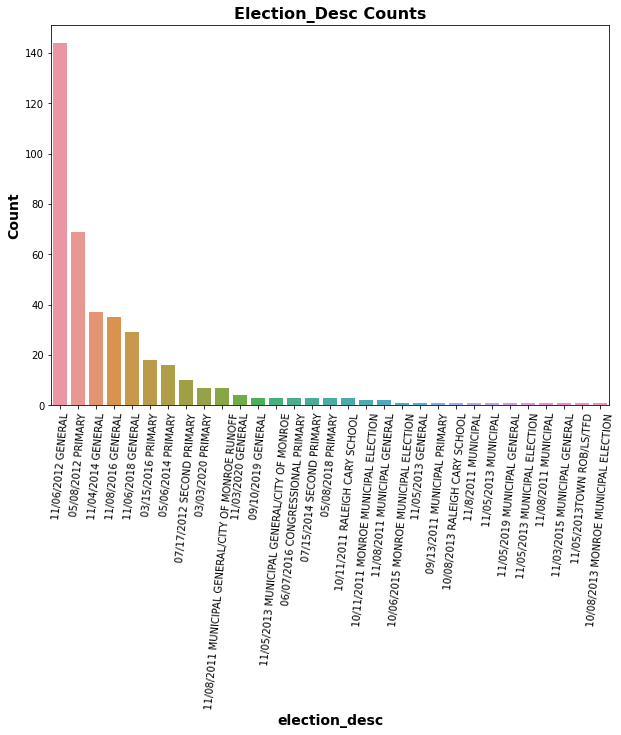

In [13]:
plot_count('election_desc', exact_dup_vhis, rotation=85);

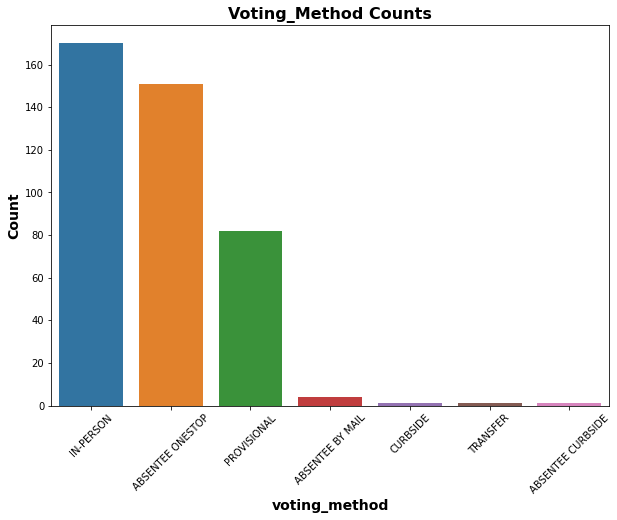

In [15]:
plot_count('voting_method', exact_dup_vhis, rotation=45);

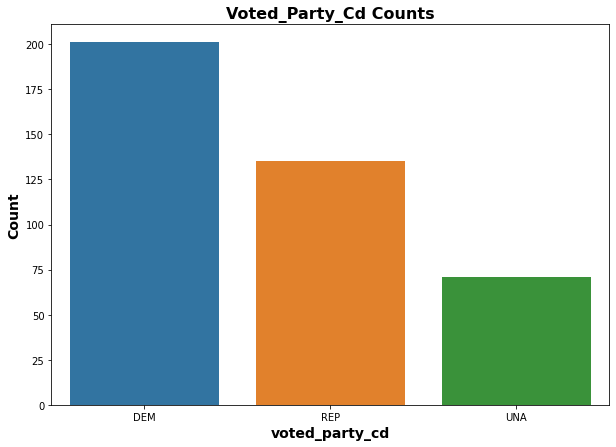

In [16]:
plot_count('voted_party_cd', exact_dup_vhis);

In [8]:
## Remove duplicate entries from records of voter history
nc_vhis.drop_duplicates(inplace=True)

In [8]:
# nc_vhis.to_csv('Data/ncvhis_Statewide_drop_dup.zip', index=False)

In [19]:
## There are 490 instances where an ncid shows up as casting a vote
  ## more than once in the same election where the records aren't exact copies
nc_vhis.duplicated(subset=['ncid','election_desc']).sum()

490

In [20]:
## A total of 350 individuals show up more than once for a single election
dup_ncid_elecs = nc_vhis.loc[nc_vhis.duplicated(subset=['ncid', 'election_desc'], keep=False)]
display(dup_ncid_elecs.head())
dup_ncid_elecs['ncid'].nunique()

,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
200123,1,2332350,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,02,AA16823,1,02
200124,1,2332350,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,02,AA16823,1,02
200126,1,2332350,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,LI,AA16823,68,LI
200127,1,2332350,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,LI,AA16823,68,LI
217410,41,10191737,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,064,AA174391,1,064


350

In [21]:
## Examine the complete recent voting history of the 350 ncid's that show up 
  ## multiple times for a single election to investigate how the records differ
for ncid in dup_ncid_elecs['ncid'].unique():
    display(nc_vhis.loc[nc_vhis['ncid']==ncid].sort_values(['election_desc']))

,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
200121,1,2332350,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,02,AA16823,1,02
200124,1,2332350,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,02,AA16823,1,02
200127,1,2332350,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,LI,AA16823,68,LI
200120,1,2332350,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,02,AA16823,1,02
200118,1,2332350,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,02,AA16823,1,02
200128,1,2332350,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,LI,AA16823,68,LI
200116,1,2332350,07/15/2014,07/15/2014 SECOND PRIMARY,IN-PERSON,REP,02,AA16823,1,02
200122,1,2332350,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,02,AA16823,1,02
200119,1,2332350,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,02,AA16823,1,02
200117,1,2332350,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,02,AA16823,1,02


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
217413,41,10191737,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,H25,AA174391,41,H25
217416,41,10191737,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,146,AA174391,60,146
217419,41,10191737,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,146,AA174391,60,146
217412,41,10191737,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,H25,AA174391,41,H25
217417,41,10191737,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,146,AA174391,60,146
217414,41,10191737,11/05/2019,11/05/2019 MUNICIPAL,IN-PERSON,DEM,H25,AA174391,41,H25
217410,41,10191737,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,064,AA174391,1,064
217418,41,10191737,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,146,AA174391,60,146
217411,41,10191737,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,H25,AA174391,41,H25
217415,41,10191737,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,146,AA174391,60,146


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
284313,26,166237613,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,06S,AA210194,1,06S
284314,26,166237613,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,CC13,AA210194,26,CC13


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
496996,4,32922,03/19/2013,03/19/2013 COUNTY WIDE ABC ELECTION,PROVISIONAL,REP,B2,AB14598,2,B2
497000,4,32922,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,LILE,AB14598,4,LILE
496995,4,32922,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,B2,AB14598,2,B2
496998,4,32922,07/15/2014,07/15/2014 SECOND PRIMARY,IN-PERSON,DEM,LILE,AB14598,4,LILE
496997,4,32922,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,LILE,AB14598,4,LILE
496994,4,32922,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,B2,AB14598,2,B2
496999,4,32922,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,LILE,AB14598,4,LILE
497001,4,32922,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,LILE,AB14598,4,LILE


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
514900,2,25981,03/19/2013,03/19/2013 COUNTY WIDE ABC ELECTION,ABSENTEE ONESTOP,REP,B1,AB22129,2,B1
514902,2,25981,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,B1,AB22129,2,B1
514901,2,25981,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,B1,AB22129,2,B1
514897,2,25981,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,26,AB22129,18,26
514898,2,25981,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,B1,AB22129,2,B1
514899,2,25981,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,B1,AB22129,2,B1
514903,2,25981,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,B1,AB22129,2,B1


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
618770,3,13451,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,06,AC13298,3,06
618769,3,13451,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,06,AC13298,3,06
618767,3,13451,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,01-23,AC13298,92,01-23
618772,3,13451,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,06,AC13298,3,06
618771,3,13451,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,06A,AC13298,3,06
618768,3,13451,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,06A,AC13298,3,06


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
687646,4,36708,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,0007,AD24600,84,0007
687644,4,36708,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,BURN,AD24600,4,BURN
687643,4,36708,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,BURN,AD24600,4,BURN
687645,4,36708,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,BURN,AD24600,4,BURN


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
699875,4,31054,03/03/2020,03/03/2020 PRIMARY,PROVISIONAL,DEM,WADES,AD28554,4,W1
699878,4,31054,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,W1,AD28554,4,W1
699874,4,31054,09/10/2019,09/10/2019 GENERAL,IN-PERSON,DEM,W1,AD28554,4,W1
699880,4,31054,09/10/2019,09/10/2019 GENERAL,IN-PERSON,REP,W1,AD28554,4,W1
699876,4,31054,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,WADES,AD28554,4,W1
699879,4,31054,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,W1,AD28554,4,W1
699877,4,31054,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,W1,AD28554,4,W1
699881,4,31054,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,W1,AD28554,4,W1
699882,4,31054,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,W1,AD28554,4,W1
699883,4,31054,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,W1,AD28554,4,W1


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
765562,5,39380,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,09,AE20677,5,09
765561,5,39380,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,09,AE20677,5,09
765558,5,39380,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,09,AE20677,5,09
765563,5,39380,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,REP,09,AE20677,5,09
765560,5,39380,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,REP,09,AE20677,5,09
765570,5,39380,11/03/2015,11/03/2015 MUNICIPAL,IN-PERSON,UNA,09,AE20677,5,09
765577,5,39380,11/03/2020,11/03/2020 GENERAL,IN-PERSON,UNA,09,AE20677,5,20
765565,5,39380,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,09,AE20677,5,09
765574,5,39380,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,09,AE20677,5,09
765566,5,39380,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,09,AE20677,5,09


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
839968,6,23708,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,07,AF14599,6,07
839959,6,23708,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,17,AF14599,6,17
839963,6,23708,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,17,AF14599,6,17
839965,6,23708,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,17,AF14599,6,17
839958,6,23708,05/08/2018,05/08/2018 PRIMARY,PROVISIONAL,REP,07,AF14599,6,07
839970,6,23708,06/23/2020,06/23/2020 SECOND PRIMARY,IN-PERSON,REP,07,AF14599,6,07
839962,6,23708,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,REP,17,AF14599,6,17
839969,6,23708,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,07,AF14599,6,07
839964,6,23708,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,17,AF14599,6,17
839961,6,23708,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,17,AF14599,6,17


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
872193,57,30019169,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,07,AF26449,6,07
872191,57,30019169,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,MARS H,AF26449,57,MARS-H
872194,57,30019169,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,REP,07,AF26449,6,07
872192,57,30019169,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,MARS H,AF26449,57,MARS-H
872195,57,30019169,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,07,AF26449,6,07


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
1095554,7,9244,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,CHOCO,AG9878,7,CHOCO
1095552,7,9244,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,WASH4,AG9878,7,WASH4
1095553,7,9244,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,CHOCO,AG9878,7,CHOCO
1095556,7,9244,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,WASH4,AG9878,7,WASH4
1095550,7,9244,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,CHOCO,AG9878,7,CHOCO
1095557,7,9244,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,WASH4,AG9878,7,WASH4
1095551,7,9244,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,CHOCO,AG9878,7,CHOCO
1095555,7,9244,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,CHOCO,AG9878,7,CHOCO


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
1116660,8,15156,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,MH,AH17190,8,MH
1116661,8,15156,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,MH,AH17190,8,MH
1116663,8,15156,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,MH,AH17190,8,MH
1116658,8,15156,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,MH,AH17190,8,MH
1116664,8,15156,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,W1,AH17190,8,W1
1116662,8,15156,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,MH,AH17190,8,MH
1116657,8,15156,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,01-46,AH17190,92,01-46
1116659,8,15156,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,MH,AH17190,8,MH


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
1137891,8,23342,03/03/2020,03/03/2020 PRIMARY,CURBSIDE,DEM,RX,AH24528,8,RX
1137896,8,23342,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,RX,AH24528,8,RX
1137894,8,23342,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,RX,AH24528,8,RX
1137892,8,23342,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,RX,AH24528,8,RX
1137895,8,23342,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,RX,AH24528,8,RX
1137890,8,23342,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,RX,AH24528,8,RX
1137889,8,23342,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,RX,AH24528,8,RX
1137893,8,23342,11/08/2016,11/08/2016 GENERAL,CURBSIDE,DEM,RX,AH24528,8,RX


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
1270393,9,62998,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,P19A,AJ43003,64,0037
1270395,9,62998,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,0037,AJ43003,64,0037
1270396,9,62998,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,0037,AJ43003,64,0037
1270394,9,62998,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,0037,AJ43003,64,0037
1270397,9,62998,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,P19A,AJ43003,64,0037
1270398,9,62998,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,P202,AJ43003,9,P202


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
1342354,10,600027098,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,07,AK112621,10,07
1342358,10,600027098,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,07,AK112621,10,07
1342359,10,600027098,11/03/2015,11/03/2015 MUNICIPAL,IN-PERSON,UNA,07,AK112621,10,07
1342360,10,600027098,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,03,AK112621,10,03
1342357,10,600027098,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,07,AK112621,10,07
1342353,10,600027098,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,W31,AK112621,65,W31
1342355,10,600027098,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,07,AK112621,10,07
1342356,10,600027098,11/08/2011,11/08/2011 MUNICIPAL,IN-PERSON,UNA,07,AK112621,10,07
1342361,10,600027098,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,07,AK112621,10,07


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
1714089,10,1470954,05/06/2014,05/06/2014 PRIMARY,ABSENTEE ONESTOP,REP,04C1,AK89408,10,04
1714092,10,1470954,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,04C,AK89408,10,04
1714093,10,1470954,11/03/2015,11/03/2015 MUNICIPAL,IN-PERSON,REP,04C1,AK89408,10,04
1714094,10,1470954,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,12,AK89408,10,12
1714091,10,1470954,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,04C1,AK89408,10,04
1714090,10,1470954,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,04C,AK89408,10,04
1714096,10,1470954,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,REP,05,AK89408,30,05
1714095,10,1470954,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,12,AK89408,10,12


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
1749699,10,600092384,03/15/2016,03/15/2016 PRIMARY,CURBSIDE,REP,A1,AK98540,53,A
1749701,10,600092384,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,A1,AK98540,53,A
1749696,10,600092384,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,10A,AK98540,10,10
1749697,10,600092384,11/03/2020,11/03/2020 GENERAL,ABSENTEE CURBSIDE,REP,10A,AK98540,10,10
1749703,10,600092384,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,A1,AK98540,53,A
1749698,10,600092384,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,A1,AK98540,53,A
1749700,10,600092384,11/06/2018,11/06/2018 GENERAL,ABSENTEE BY MAIL,REP,A1,AK98540,53,A
1749702,10,600092384,11/08/2016,11/08/2016 GENERAL,ABSENTEE CURBSIDE,REP,A1,AK98540,53,A


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
2261430,36,7688117,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,33,AL244926,36,33
2261428,36,7688117,05/08/2012,05/08/2012 PRIMARY,ABSENTEE BY MAIL,DEM,28.1,AL244926,11,28.1
2261436,36,7688117,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,36,AL244926,36,36
2261432,36,7688117,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,36,AL244926,36,36
2261433,36,7688117,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,33,AL244926,36,33
2261429,36,7688117,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,20,AL244926,18,20
2261435,36,7688117,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,33,AL244926,36,33
2261431,36,7688117,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,36,AL244926,36,36
2261434,36,7688117,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,36,AL244926,36,36


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
2350236,11,372852,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,01.1,AL266672,11,01.1
2350233,11,372852,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,01.1,AL266672,11,01.1
2350235,11,372852,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,01.1,AL266672,11,01.1
2350238,11,372852,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,01.1,AL266672,11,01.1
2350234,11,372852,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,01.1,AL266672,11,01.1
2350240,11,372852,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,01.1,AL266672,11,01.1
2350242,11,372852,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,01.1,AL266672,11,01.1
2350237,11,372852,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,01.1,AL266672,11,01.1
2350239,11,372852,11/07/2017,11/07/2017 MUNICIPAL GENERAL,IN-PERSON,DEM,01.1,AL266672,11,01.1
2350241,11,372852,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,01.1,AL266672,11,01.1


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
2697210,11,130793,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,01.1,AL57870,11,01.1
2697203,11,130793,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,42.1,AL57870,11,105.1
2697208,11,130793,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,42.1,AL57870,11,105.1
2697202,11,130793,06/23/2020,06/23/2020 SECOND PRIMARY,ABSENTEE ONESTOP,REP,01.1,AL57870,11,01.1
2697204,11,130793,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,01.1,AL57870,11,01.1
2697206,11,130793,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,42.1,AL57870,11,105.1
2697212,11,130793,11/04/2014,11/04/2014 GENERAL,ABSENTEE BY MAIL,REP,13-01,AL57870,92,13-01
2697207,11,130793,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,42.1,AL57870,11,105.1
2697214,11,130793,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,13-01,AL57870,92,13-01
2697211,11,130793,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,45.1,AL57870,11,45.1


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
2853674,12,9570,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,0022,AM11597,12,0022
2853676,12,9570,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,0001,AM11597,12,0001
2853675,12,9570,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,0022,AM11597,12,0022
2853673,12,9570,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,35,AM11597,18,35
2853679,12,9570,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,0001,AM11597,12,0001
2853677,12,9570,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,0022,AM11597,12,0022
2853678,12,9570,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,0022,AM11597,12,0022


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
3206685,13,30033550,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,04-09,AN125465,13,04-09
3206683,13,30033550,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,04-09,AN125465,13,04-09
3206686,13,30033550,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,043,AN125465,60,043
3206682,13,30033550,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,04-09,AN125465,13,04-09
3206681,13,30033550,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,04-09,AN125465,13,04-09
3206684,13,30033550,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,04-09,AN125465,13,04-09


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
3430649,65,446126,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,H04,AN197368,65,H04
3430650,65,446126,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,REP,01-04,AN197368,13,01-04


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
3451432,50,320365773,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,01-04,AN207398,13,01-04
3451433,50,320365773,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,CUL,AN207398,50,CUL
3451434,50,320365773,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,CUL,AN207398,50,CUL


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
3467931,60,1000648693,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,01-04,AN217205,13,01-04
3467932,60,1000648693,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,105,AN217205,60,105


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
3617935,24,67357,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,P26B,AN63014,24,P26
3617937,24,67357,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,P26A,AN63014,24,P26
3617938,24,67357,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,P26B,AN63014,24,P26
3617940,24,67357,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,P26B,AN63014,24,P26
3617934,24,67357,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,905,AN63014,34,905
3617939,24,67357,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,P26A,AN63014,24,P26
3617936,24,67357,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,P26B,AN63014,24,P26
3617941,24,67357,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,P26B,AN63014,24,P26


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
3838225,14,14501015,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,PR29,AP48595,14,PR29
3838229,14,14501015,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,PR29,AP48595,14,PR29
3838223,14,14501015,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,PR06,AP48595,14,PR06
3838224,14,14501015,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,PR29,AP48595,14,PR29
3838226,14,14501015,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,PR29,AP48595,14,PR29
3838228,14,14501015,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,PR29,AP48595,14,PR29
3838227,14,14501015,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,PR29,AP48595,14,PR29


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
3941168,14,14514646,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,PR34,AP84737,14,PR15
3941169,14,14514646,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,12,AP84737,18,12


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4016466,10,600067713,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,WILD,AS12896,16,WILD
4016462,10,600067713,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,11,AS12896,1,11
4016465,10,600067713,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,WILD,AS12896,16,WILD
4016464,10,600067713,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,15,AS12896,10,15
4016463,10,600067713,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,15,AS12896,10,15


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4046201,16,21687,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,MCRK,AS21627,16,MCRK
4046191,16,21687,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,08,AS21627,25,08
4046195,16,21687,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,STEL,AS21627,16,STEL
4046198,16,21687,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,UNA,STEL,AS21627,16,STEL
4046204,16,21687,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,MCRK,AS21627,16,MCRK
4046202,16,21687,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,UNA,STEL,AS21627,16,STEL
4046200,16,21687,07/09/2019,07/09/2019 SECOND PRIMARY,IN-PERSON,REP,MCRK,AS21627,16,MCRK
4046199,16,21687,09/10/2019,09/10/2019 GENERAL,IN-PERSON,UNA,MCRK,AS21627,16,MCRK
4046203,16,21687,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,MCRK,AS21627,16,MCRK
4046190,16,21687,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,08,AS21627,25,08


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4101270,16,46448,03/15/2016,03/15/2016 PRIMARY,TRANSFER,REP,OTBE,AS39491,16,OTST
4101272,16,46448,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,OTBE,AS39491,16,OTST
4101268,16,46448,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,OTBEG,AS39491,16,OTST
4101267,16,46448,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,HAIS,AS39491,16,HAIS
4101273,16,46448,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,D2,AS39491,53,D
4101271,16,46448,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,OTBE,AS39491,16,OTST
4101274,16,46448,11/08/2011,11/08/2011 MUNICIPAL,IN-PERSON,DEM,D2,AS39491,53,D
4101269,16,46448,11/08/2016,11/08/2016 GENERAL,TRANSFER,UNA,OTBE,AS39491,16,OTST


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4146197,16,100688,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,UNA,BOGU,AS54256,16,BOGU
4146198,16,100688,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,BOGU,AS54256,16,BOGU


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4207463,16,110002,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,EMIS,AS70397,16,EMIS
4207465,16,110002,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,EMIS,AS70397,16,EMIS
4207462,16,110002,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,REP,EMIS,AS70397,16,EMIS
4207464,16,110002,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,REP,PELE,AS70397,16,PELE


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4365961,18,9074727,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,34,AW100366,18,34
4365959,18,9074727,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,34,AW100366,18,34
4365962,18,9074727,07/15/2014,07/15/2014 SECOND PRIMARY,ABSENTEE ONESTOP,REP,34,AW100366,18,34
4365958,18,9074727,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,REP,34,AW100366,18,34
4365960,18,9074727,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,34,AW100366,18,34
4365964,18,9074727,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,OB21,AW100366,55,OB21
4365957,18,9074727,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,34,AW100366,18,34
4365963,18,9074727,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,OB21,AW100366,55,OB21


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4455149,36,7698053,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,0022,AW136661,84,0022
4455144,36,7698053,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,16,AW136661,36,16
4455147,36,7698053,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,0022,AW136661,84,0022
4455146,36,7698053,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,0022,AW136661,84,0022
4455145,36,7698053,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,REP,26,AW136661,36,26
4455148,36,7698053,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,REP,0022,AW136661,84,0022


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4458562,18,30015562,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,03,AW137877,18,03
4458567,18,30015562,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,HG17,AW137877,55,HG17
4458564,18,30015562,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,29,AW137877,18,29
4458563,18,30015562,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,03,AW137877,18,03
4458565,18,30015562,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,ST36,AW137877,55,HG17
4458560,18,30015562,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,03,AW137877,18,03
4458566,18,30015562,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,HG17,AW137877,55,HG17
4458561,18,30015562,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,33,AW137877,18,33


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4562964,92,100649534,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,LIB,12-01,AW170910,92,12-01
4562965,92,100649534,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,30-1,AW170910,32,30-1


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4585264,60,1000542866,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,41,AW178391,18,41
4585267,60,1000542866,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,223.1,AW178391,60,223.1
4585266,60,1000542866,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,223.1,AW178391,60,223.1
4585265,60,1000542866,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,223.1,AW178391,60,223.1


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4609892,18,30102414,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,34,AW187312,18,34
4609894,18,30102414,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,34,AW187312,18,34
4609891,18,30102414,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,W24,AW187312,65,W24
4609895,18,30102414,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,23,AW187312,18,23
4609893,18,30102414,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,34,AW187312,18,34
4609896,18,30102414,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,34,AW187312,18,34


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4716431,18,9000742,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,AS25,AW30807,55,AS25
4716427,18,9000742,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,32,AW30807,18,32
4716430,18,9000742,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,OB21,AW30807,55,OB21
4716425,18,9000742,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,08,AW30807,18,08
4716432,18,9000742,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,AS25,AW30807,55,AS25
4716426,18,9000742,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,32,AW30807,18,32
4716429,18,9000742,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,OB21,AW30807,55,OB21
4716424,18,9000742,11/06/2018,11/06/2018 GENERAL,ABSENTEE BY MAIL,DEM,08,AW30807,18,08
4716428,18,9000742,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,DEM,32,AW30807,18,32


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4972369,19,51262,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,75,AX32206,19,75
4972374,19,51262,03/15/2016,03/15/2016 PRIMARY,PROVISIONAL,REP,75,AX32206,19,75
4972371,19,51262,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,75,AX32206,19,75
4972372,19,51262,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,75,AX32206,19,75
4972368,19,51262,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,75,AX32206,19,75
4972370,19,51262,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,75,AX32206,19,75
4972375,19,51262,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,75,AX32206,19,75
4972373,19,51262,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,75,AX32206,19,75


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
5105880,19,129257,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,9,AX63977,19,9
5105884,19,129257,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,9,AX63977,19,9
5105879,19,129257,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,9,AX63977,19,9
5105881,19,129257,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,9,AX63977,19,9
5105878,19,129257,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,DEM,9,AX63977,19,9
5105883,19,129257,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,45,AX63977,19,45
5105877,19,129257,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,9,AX63977,19,9
5105882,19,129257,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,9,AX63977,19,9


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
5434254,23,34933,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,S C,BB20134,23,S1
5434263,23,34933,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,KM S,BB20134,23,KM3
5434259,23,34933,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,KM S,BB20134,23,KM3
5434260,23,34933,11/03/2015,11/03/2015 MUNICIPAL GENERAL,IN-PERSON,DEM,KM S,BB20134,23,KM3
5434257,23,34933,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,KM S,BB20134,23,KM3
5434253,23,34933,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,S 6,BB20134,23,S6
5434258,23,34933,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,KM S,BB20134,23,KM3
5434261,23,34933,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,KM S,BB20134,23,KM3
5434255,23,34933,11/07/2017,11/07/2017 MUNICIPAL GENERAL,ABSENTEE ONESTOP,DEM,KM S,BB20134,23,KM3
5434256,23,34933,11/08/2011,11/08/2011 MUNICIPAL GENERAL,IN-PERSON,DEM,KM S,BB20134,23,KM3


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
5614339,23,1008817,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,S 2,BB72260,23,S2
5614340,23,1008817,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,RIPPY,BB72260,23,RIPPY
5614338,23,1008817,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,S 2,BB72260,23,S2
5614342,23,1008817,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,010,BB72260,60,010
5614341,23,1008817,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,RIPPY,BB72260,23,RIPPY


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
5726297,24,22105,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,P24,BC18809,24,P24
5726299,24,22105,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,P24,BC18809,24,P24
5726296,24,22105,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,P24,BC18809,24,P24
5726298,24,22105,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,P24,BC18809,24,P24
5726300,24,22105,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,P24,BC18809,24,P24
5726303,24,22105,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,P24,BC18809,24,P24


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
5736749,24,296,03/15/2016,03/15/2016 PRIMARY,ABSENTEE BY MAIL,DEM,P02B,BC2273,24,P02
5736751,24,296,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,P02A,BC2273,24,P02
5736747,24,296,05/08/2018,05/08/2018 PRIMARY,ABSENTEE BY MAIL,DEM,P02B,BC2273,24,P02
5736745,24,296,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,03,BC2273,10,03
5736746,24,296,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,P02A,BC2273,24,P02
5736750,24,296,11/06/2018,11/06/2018 GENERAL,ABSENTEE BY MAIL,DEM,P02B,BC2273,24,P02
5736748,24,296,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,P02B,BC2273,24,P02


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
5762373,24,87749,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,P26B,BC35575,24,P26
5762374,24,87749,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,P26B,BC35575,24,P26
5762375,24,87749,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,UNA,P26B,BC35575,24,P26


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
5786350,65,411452,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,H05,BC46669,65,H05
5786352,65,411452,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,P23,BC46669,24,P23
5786348,65,411452,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,H05,BC46669,65,H05
5786354,65,411452,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,P23,BC46669,24,P23
5786353,65,411452,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,P23,BC46669,24,P23
5786347,65,411452,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,UNA,H05,BC46669,65,H05
5786351,65,411452,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,W16,BC46669,65,W16
5786349,65,411452,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,H05,BC46669,65,H05


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
5824399,24,72048,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,P20,BC61881,24,P20
5824400,24,72048,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,P19,BC61881,24,P19
5824398,24,72048,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,P19,BC61881,24,P19


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
5827165,24,76403,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,P16B,BC63373,24,P16
5827166,24,76403,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,UNA,22,BC63373,78,22


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
5918946,24,82113,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,P25B,BD125500,24,P25
5918948,24,82113,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,18,BD125500,10,18
5918945,24,82113,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,02,BD125500,25,18
5918947,24,82113,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,18,BD125500,10,18


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6074830,25,48750,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,02,BD50768,25,18
6074832,25,48750,09/10/2019,09/10/2019 GENERAL,ABSENTEE ONESTOP,REP,02,BD50768,25,18
6074831,25,48750,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,02,BD50768,25,18
6074835,25,48750,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,02,BD50768,25,22
6074828,25,48750,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,18,BD50768,25,18
6074834,25,48750,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,22,BD50768,25,22
6074827,25,48750,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,02,BD50768,25,18
6074829,25,48750,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,02,BD50768,25,18
6074833,25,48750,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,02,BD50768,25,22


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6275039,26,126708,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,CL57-2,BE121628,26,CL57
6275033,26,126708,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,CC01,BE121628,26,CC01
6275035,26,126708,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,CC01,BE121628,26,CC01
6275036,26,126708,10/11/2011,10/11/2011 MUNICIPAL PRIMARY,IN-PERSON,DEM,CC01,BE121628,26,CC01
6275028,26,126708,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,SH77,BE121628,26,SH77
6275029,26,126708,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,G9B-2,BE121628,26,G9
6275032,26,126708,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,CC01,BE121628,26,CC01
6275037,26,126708,11/05/2013,11/05/2013 MUNICIPAL GENERAL,IN-PERSON,DEM,CC01,BE121628,26,CC01
6275030,26,126708,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,G9B-2,BE121628,26,G9
6275034,26,126708,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,CC01,BE121628,26,CC01


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6418817,26,16438,03/03/2020,03/03/2020 PRIMARY,TRANSFER,DEM,CU02,BE18394,26,CU02
6418818,26,16438,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,CU02,BE18394,26,CU02
6418819,26,16438,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,CC31,BE18394,26,CC31
6418814,26,16438,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,025,BE18394,60,025
6418815,26,16438,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,025,BE18394,60,025
6418816,26,16438,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,G8C,BE18394,26,G8


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6422386,31,30036856,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,MAGN,BE185586,31,MAGN
6422383,31,30036856,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,MB62,BE185586,26,MB62
6422387,31,30036856,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,WALL,BE185586,31,WALL
6422385,31,30036856,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,G1A,BE185586,26,G1
6422384,31,30036856,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,DEM,G1A,BE185586,26,G1


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6464751,26,66001481,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,CC08,BE203818,26,CC08
6464747,26,66001481,10/10/2017,10/10/2017 MUNICIPAL PRIMARY,IN-PERSON,REP,CC08,BE203818,26,CC08
6464750,26,66001481,11/03/2015,11/03/2015 MUNICIPAL GENERAL,IN-PERSON,REP,CC08,BE203818,26,CC08
6464748,26,66001481,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,CC08,BE203818,26,CC08
6464749,26,66001481,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,CC18,BE203818,26,CC18
6464755,26,66001481,11/05/2013,11/05/2013 MUNICIPAL GENERAL,IN-PERSON,REP,CC18,BE203818,26,CC18
6464754,26,66001481,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,CC18,BE203818,26,CC18
6464756,26,66001481,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,01-06,BE203818,92,01-06
6464753,26,66001481,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,CC08,BE203818,26,CC08
6464752,26,66001481,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,CC08,BE203818,26,CC08


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6465595,51,33067876,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,PR14,BE20407,51,PR14
6465598,51,33067876,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,PR33,BE20407,51,PR33
6465593,51,33067876,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,PR10B,BE20407,51,PR10
6465596,51,33067876,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,PR33,BE20407,51,PR33
6465602,51,33067876,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,PR14,BE20407,51,PR14
6465603,51,33067876,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,PR14,BE20407,51,PR14
6465591,51,33067876,11/04/2014,11/04/2014 GENERAL,ABSENTEE BY MAIL,DEM,PR10B,BE20407,51,PR10
6465594,51,33067876,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,PR33,BE20407,51,PR33
6465597,51,33067876,11/05/2013,11/05/2013 MUNICIPAL,IN-PERSON,REP,PR33,BE20407,51,PR33
6465592,51,33067876,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,PR10B,BE20407,51,PR10


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6662374,51,33167599,11/03/2020,11/03/2020 GENERAL,IN-PERSON,DEM,PR25,BE278682,51,PR25
6662376,51,33167599,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,G2C-1,BE278682,26,G2
6662373,51,33167599,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,FC,BE278682,54,FC
6662375,51,33167599,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,CC14,BE278682,26,CC14


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6742030,26,29251,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,G5B-1,BE31154,26,G5
6742028,26,29251,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,G3A-2,BE31154,26,G3
6742031,26,29251,11/04/2014,11/04/2014 GENERAL,ABSENTEE CURBSIDE,DEM,G5B-1,BE31154,26,G5
6742027,26,29251,11/05/2013,11/05/2013 MUNICIPAL GENERAL,ABSENTEE ONESTOP,DEM,G5B-1,BE31154,26,G5
6742025,26,29251,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,G2E-1,BE31154,26,G2
6742029,26,29251,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,G5B-1,BE31154,26,G5
6742026,26,29251,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,CC31,BE31154,26,CC31


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6781947,26,166054090,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,G4C,BE329126,26,G4
6781948,26,166054090,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,011,BE329126,60,011
6781946,26,166054090,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,G10B,BE329126,26,G10


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6854527,26,166087459,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,CC32,BE357855,26,CC32
6854522,26,166087459,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,G2B,BE357855,26,G2
6854531,26,166087459,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,CC21,BE357855,26,CC21
6854526,26,166087459,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,CC32,BE357855,26,CC32
6854525,26,166087459,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,G2B,BE357855,26,G2
6854524,26,166087459,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,G2A,BE357855,26,G2
6854529,26,166087459,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,CC21,BE357855,26,CC21
6854523,26,166087459,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,G2B,BE357855,26,G2
6854528,26,166087459,11/07/2017,11/07/2017 MUNICIPAL GENERAL,IN-PERSON,UNA,CC21,BE357855,26,CC21
6854521,26,166087459,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,G2B,BE357855,26,G2


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6919518,41,10322553,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,G9B-2,BE389872,26,G9
6919516,41,10322553,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,G9B-2,BE389872,26,G9
6919520,41,10322553,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,G04,BE389872,41,G04
6919519,41,10322553,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,G9B-2,BE389872,26,G9
6919517,41,10322553,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,G9B-2,BE389872,26,G9


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6973241,41,10324003,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,G1B,BE424024,26,G1
6973240,41,10324003,09/10/2019,09/10/2019 GENERAL,ABSENTEE ONESTOP,DEM,G1B,BE424024,26,G1
6973243,41,10324003,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,G48,BE424024,41,G48
6973239,41,10324003,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,G1B,BE424024,26,G1
6973242,41,10324003,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,G1B,BE424024,26,G1


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6998725,26,166204776,11/03/2020,11/03/2020 GENERAL,PROVISIONAL,REP,G9B-1,BE445447,26,G9
6998727,26,166204776,11/03/2020,11/03/2020 GENERAL,IN-PERSON,DEM,P15,BE445447,9,P15
6998726,26,166204776,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,P15,BE445447,9,P15


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
7036223,26,47814,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,G2D,BE49627,26,G2
7036219,26,47814,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,CC26,BE49627,26,CC26
7036213,26,47814,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,CC26,BE49627,26,CC26
7036211,26,47814,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,1512B,BE49627,74,1512B
7036226,26,47814,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,CC26,BE49627,26,CC26
7036217,26,47814,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,CC26,BE49627,26,CC26
7036216,26,47814,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,ABSENTEE ONESTOP,DEM,CC26,BE49627,26,CC26
7036229,26,47814,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,DEM,CC26,BE49627,26,CC26
7036227,26,47814,10/08/2013,10/08/2013 MUNICIPAL PRIMARY,IN-PERSON,DEM,CC26,BE49627,26,CC26
7036221,26,47814,10/10/2017,10/10/2017 MUNICIPAL PRIMARY,ABSENTEE ONESTOP,DEM,CC26,BE49627,26,CC26


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
7047255,26,50719,03/03/2020,03/03/2020 PRIMARY,TRANSFER,DEM,CC05,BE52521,26,CC05
7047249,26,50719,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,CC26,BE52521,26,CC26
7047259,26,50719,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,CC17,BE52521,26,CC17
7047245,26,50719,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,CC26,BE52521,26,CC26
7047246,26,50719,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,CC26,BE52521,26,CC26
7047256,26,50719,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,CC10,BE52521,26,CC10
7047244,26,50719,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,CC26,BE52521,26,CC26
7047257,26,50719,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,CC17,BE52521,26,CC17
7047252,26,50719,11/05/2013,11/05/2013 MUNICIPAL GENERAL,IN-PERSON,DEM,CC26,BE52521,26,CC26
7047254,26,50719,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,G5B-1,BE52521,26,G5


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
7349002,28,72738,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,SOSH,BG25475,28,SOSH
7349004,28,72738,05/06/2014,05/06/2014 PRIMARY,ABSENTEE ONESTOP,DEM,RR 9,BG25475,42,RR-9
7348998,28,72738,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,SOSH,BG25475,28,SOSH
7349000,28,72738,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,SOSH,BG25475,28,SOSH
7348999,28,72738,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,SOSH,BG25475,28,SOSH
7349003,28,72738,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,RR 9,BG25475,42,RR-9
7349001,28,72738,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,DEM,WAN,BG25475,28,WAN


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
7377122,28,739976,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,MATO,BG33488,28,MATO
7377118,28,739976,11/03/2020,11/03/2020 GENERAL,ABSENTEE CURBSIDE,REP,MATO,BG33488,28,MATO
7377120,28,739976,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,MATO,BG33488,28,MATO
7377119,28,739976,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,MATO,BG33488,28,MATO
7377124,28,739976,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,CS,BG33488,49,CS
7377123,28,739976,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,MATO,BG33488,28,MATO
7377121,28,739976,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,MATO,BG33488,28,MATO


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
7406643,92,99983597,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,12-01,BG4213,92,12-01
7406641,92,99983597,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,12-01,BG4213,92,12-01
7406646,92,99983597,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,16-07,BG4213,92,16-07
7406645,92,99983597,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,16-07,BG4213,92,16-07
7406650,92,99983597,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,12-01,BG4213,92,12-01
7406647,92,99983597,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,REP,12-01,BG4213,92,12-01
7406648,92,99983597,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,REP,16-07,BG4213,92,16-07
7406642,92,99983597,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,12-09,BG4213,92,12-09
7406638,92,99983597,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,16-07,BG4213,92,16-07
7406639,92,99983597,11/05/2013,11/05/2013 MUNICIPAL,IN-PERSON,REP,16-07,BG4213,92,16-07


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
7484875,29,216361,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,80A,BH105950,29,80
7484876,29,216361,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,011,BH105950,34,011
7484873,29,216361,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,80A,BH105950,29,80
7484874,29,216361,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,80A,BH105950,29,80
7484877,29,216361,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,904,BH105950,34,904


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
7809591,29,63254,03/03/2020,03/03/2020 PRIMARY,ABSENTEE BY MAIL,REP,42,BH43826,29,42
7809582,29,63254,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,42,BH43826,29,42
7809586,29,63254,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,42,BH43826,29,42
7809583,29,63254,05/08/2018,05/08/2018 PRIMARY,ABSENTEE BY MAIL,REP,42,BH43826,29,42
7809596,29,63254,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,REP,42,BH43826,29,42
7809588,29,63254,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,ABSENTEE ONESTOP,REP,42,BH43826,29,42
7809592,29,63254,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,42,BH43826,29,42
7809585,29,63254,11/04/2014,11/04/2014 GENERAL,ABSENTEE BY MAIL,REP,42,BH43826,29,42
7809589,29,63254,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,42,BH43826,29,42
7809584,29,63254,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,42,BH43826,29,42


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
8069640,30,351733,05/06/2014,05/06/2014 PRIMARY,ABSENTEE ONESTOP,REP,13,BJ37385,30,13
8069636,30,351733,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,13,BJ37385,30,13
8069641,30,351733,11/03/2015,11/03/2015 MUNICIPAL GENERAL,IN-PERSON,REP,13,BJ37385,30,13
8069639,30,351733,11/03/2020,11/03/2020 GENERAL,PROVISIONAL,REP,13,BJ37385,30,13
8069646,30,351733,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,NFAL,BJ37385,99,NFAL
8069638,30,351733,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,13,BJ37385,30,13
8069635,30,351733,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,REP,13,BJ37385,30,13
8069643,30,351733,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,13,BJ37385,30,13
8069642,30,351733,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,13,BJ37385,30,13
8069637,30,351733,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,REP,13,BJ37385,30,13


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
8237257,31,30027628,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,HALL,BK50735,31,HALL
8237256,31,30027628,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,NM13,BK50735,67,NM13
8237255,31,30027628,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,GB12,BK50735,67,GB12
8237258,31,30027628,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,HALL,BK50735,31,HALL


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
8311095,32,592697,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,31,BL122293,32,31
8311105,32,592697,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,31,BL122293,32,31
8311099,32,592697,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,31,BL122293,32,31
8311091,32,592697,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,31,BL122293,32,31
8311106,32,592697,10/06/2015,10/06/2015 MUNICIPAL PRIMARY,IN-PERSON,DEM,31,BL122293,32,31
8311100,32,592697,10/08/2013,10/08/2013 MUNICIPAL PRIMARY,IN-PERSON,UNA,31,BL122293,32,31
8311107,32,592697,10/08/2019,10/08/2019 MUNICIPAL PRIMARY,IN-PERSON,DEM,31,BL122293,32,31
8311101,32,592697,10/10/2017,10/10/2017 MUNICIPAL PRIMARY,IN-PERSON,DEM,31,BL122293,32,31
8311097,32,592697,10/11/2011,10/11/2011 MUNICIPAL PRIMARY,IN-PERSON,UNA,31,BL122293,32,31
8311103,32,592697,11/03/2015,11/03/2015 MUNICIPAL ELECTION,IN-PERSON,DEM,31,BL122293,32,31


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
8354653,32,613904,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,22,BL143435,32,22
8354654,32,613904,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,22,BL143435,32,22
8354652,32,613904,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,22,BL143435,32,22
8354656,32,613904,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,GASTON,BL143435,66,GASTON
8354655,32,613904,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,22,BL143435,32,22


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
8401163,32,30397815,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,34-2,BL165793,32,34
8401166,32,30397815,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,41,BL165793,32,41
8401164,32,30397815,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,41,BL165793,32,41
8401165,32,30397815,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,41,BL165793,32,41


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
8744664,77,948461,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,13,BL294198,77,13
8744669,77,948461,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,14,BL294198,32,14
8744673,77,948461,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,UNA,14,BL294198,32,14
8744663,77,948461,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,13,BL294198,77,13
8744670,77,948461,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,DEM,14,BL294198,32,14
8744667,77,948461,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,DEM,14,BL294198,32,14
8744661,77,948461,09/10/2019,09/10/2019 GENERAL,ABSENTEE ONESTOP,UNA,13,BL294198,77,13
8744676,77,948461,10/06/2015,10/06/2015 MUNICIPAL PRIMARY,ABSENTEE ONESTOP,UNA,14,BL294198,32,14
8744674,77,948461,10/08/2013,10/08/2013 MUNICIPAL PRIMARY,IN-PERSON,UNA,14,BL294198,32,14
8744671,77,948461,11/03/2015,11/03/2015 MUNICIPAL ELECTION,ABSENTEE ONESTOP,UNA,14,BL294198,32,14


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
8801859,32,30074395,11/03/2020,11/03/2020 GENERAL,IN-PERSON,UNA,55-11,BL311672,32,55
8801860,32,30074395,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,55-11,BL311672,32,55
8801863,32,30074395,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,20-13,BL311672,92,20-02
8801862,32,30074395,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,55-11,BL311672,32,55
8801861,32,30074395,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,55-11,BL311672,32,55


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
8858282,68,311319,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,GB,BL327821,68,GB
8858279,68,311319,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,GB,BL327821,68,GB
8858283,68,311319,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,UNA,50,BL327821,32,50
8858284,68,311319,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,50,BL327821,32,50
8858281,68,311319,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,GB,BL327821,68,GB
8858280,68,311319,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,GB,BL327821,68,GB


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
8985027,32,30140902,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,23,BL367725,32,23
8985030,32,30140902,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,30-2,BL367725,32,30-2
8985033,32,30140902,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,30-2,BL367725,32,30-2
8985034,32,30140902,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,30-1,BL367725,32,30-1
8985028,32,30140902,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,30-2,BL367725,32,30-2
8985032,32,30140902,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,30-2,BL367725,32,30-2
8985035,32,30140902,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,H20B,BL367725,41,H20B
8985031,32,30140902,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,24,BL367725,32,24
8985029,32,30140902,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,22,BL367725,32,22


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
8999808,32,30378727,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,CC,BL373780,68,CC
8999810,32,30378727,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,44,BL373780,32,44
8999807,32,30378727,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,CC,BL373780,68,CC
8999806,32,30378727,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,UNA,CC,BL373780,68,CC
8999809,32,30378727,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,UNA,44,BL373780,32,44


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9007157,60,1000086123,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,212,BL376827,60,212
9007156,60,1000086123,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,50,BL376827,32,50
9007158,60,1000086123,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,DEM,017,BL376827,60,017
9007160,60,1000086123,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,212,BL376827,60,212
9007159,60,1000086123,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,212,BL376827,60,212


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9043164,92,100647482,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,11-01,BL387574,92,11-01
9043159,92,100647482,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,51,BL387574,32,51
9043163,92,100647482,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,11-01,BL387574,92,11-01
9043161,92,100647482,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,51,BL387574,32,51
9043160,92,100647482,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,51,BL387574,32,51
9043162,92,100647482,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,11-01,BL387574,92,11-01
9043158,92,100647482,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,51,BL387574,32,51


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9054078,60,1000651029,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,141,BL390378,60,141
9054076,60,1000651029,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,23,BL390378,32,23
9054080,60,1000651029,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,212,BL390378,60,212
9054079,60,1000651029,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,141,BL390378,60,141
9054077,60,1000651029,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,141,BL390378,60,141


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9258731,32,30270794,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,33,BL458621,32,33
9258732,32,30270794,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,10S1,BL458621,1,10S
9258730,32,30270794,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,45,BL458621,32,45


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9488101,32,30304742,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,UNA,28,BL94079,32,28
9488100,32,30304742,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,28,BL94079,32,28
9488103,32,30304742,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,28,BL94079,32,28
9488098,32,30304742,11/08/2011,11/08/2011 MUNICIPAL ELECTION,IN-PERSON,UNA,28,BL94079,32,28
9488099,32,30304742,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,UNA,28,BL94079,32,28
9488102,32,30304742,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,28,BL94079,32,28


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9568055,33,55570,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,0701,BM35719,33,0701
9568054,33,55570,11/03/2020,11/03/2020 GENERAL,ABSENTEE CURBSIDE,UNA,1401,BM35719,33,1401
9568056,33,55570,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,0701,BM35719,33,0701
9568053,33,55570,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,G48,BM35719,41,G48
9568058,33,55570,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,0701,BM35719,33,0701
9568057,33,55570,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,0701,BM35719,33,0701


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9659407,64,143129,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,P23A,BM68865,64,0034
9659406,64,143129,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,1001,BM68865,33,1001
9659408,64,143129,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,0104,BM68865,33,0104


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9662016,92,100812303,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,01-03,BM70336,92,01-03
9662015,92,100812303,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,WW,BM70336,68,WW
9662013,92,100812303,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,0104,BM70336,33,0104
9662014,92,100812303,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,WW,BM70336,68,WW


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9701451,65,437050,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,M03,BN106366,65,M03
9701448,65,437050,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,M02,BN106366,65,M02
9701450,65,437050,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,M03,BN106366,65,M03
9701445,65,437050,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,M02,BN106366,65,M02
9701446,65,437050,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,M02,BN106366,65,M02
9701449,65,437050,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,CF01,BN106366,65,CF01


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9783007,34,10074738,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,905,BN138099,34,905
9783010,34,10074738,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,112,BN138099,34,112
9783005,34,10074738,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,905,BN138099,34,905
9783011,34,10074738,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,067,BN138099,34,067
9782999,34,10074738,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,905,BN138099,34,905
9783001,34,10074738,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,905,BN138099,34,905
9783008,34,10074738,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,DEM,905,BN138099,34,905
9783000,34,10074738,09/10/2013,09/10/2013 WINSTON-SALEM PRIMARY,IN-PERSON,DEM,905,BN138099,34,905
9782997,34,10074738,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,905,BN138099,34,905
9782998,34,10074738,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,905,BN138099,34,905


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9940602,34,30184453,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,074,BN206766,34,074
9940601,34,30184453,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,014,BN206766,34,014
9940600,34,30184453,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,013,BN206766,34,013
9940603,34,30184453,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,14,BN206766,85,14


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9969391,34,30281870,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,G53,BN219742,41,G53
9969390,34,30281870,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,201,BN219742,34,201
9969392,34,30281870,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,201,BN219742,34,201


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9993294,76,206517,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,BC,BN231249,76,13
9993293,76,206517,11/03/2020,11/03/2020 GENERAL,ABSENTEE CURBSIDE,REP,BC,BN231249,76,13
9993292,76,206517,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,BC,BN231249,76,13
9993295,76,206517,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,REP,013,BN231249,34,013
9993296,76,206517,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,013,BN231249,34,013


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10088934,34,30007008,05/08/2012,05/08/2012 PRIMARY,PROVISIONAL,UNA,063,BN273329,34,063
10088939,34,30007008,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,UNA,063,BN273329,34,063
10088935,34,30007008,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,064,BN273329,34,064
10088936,34,30007008,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,064,BN273329,34,064
10088938,34,30007008,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,064,BN273329,34,064
10088937,34,30007008,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,064,BN273329,34,064


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10091834,29,230908,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,UNA,042,BN274508,34,042
10091835,29,230908,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,042,BN274508,34,042


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10158128,92,100392651,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,19-15,BN299092,92,19-06
10158126,92,100392651,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,19-15,BN299092,92,19-06
10158119,92,100392651,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,061,BN299092,34,061
10158121,92,100392651,10/06/2015,10/06/2015 MUNICIPAL RALEIGH CARY,IN-PERSON,UNA,19-15,BN299092,92,19-06
10158130,92,100392651,10/08/2019,10/08/2019 MUNICIPAL,IN-PERSON,UNA,19-15,BN299092,92,NaN
10158122,92,100392651,10/10/2017,10/10/2017 MUNICIPAL,IN-PERSON,UNA,19-15,BN299092,92,NaN
10158127,92,100392651,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,19-15,BN299092,92,19-06
10158124,92,100392651,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,19-15,BN299092,92,19-06
10158116,92,100392651,11/05/2013,11/05/2013 MUNICIPAL GENERAL,IN-PERSON,UNA,061,BN299092,34,061
10158118,92,100392651,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,061,BN299092,34,061


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10168025,16,100095,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,EMIS,BN302521,16,EMIS
10168023,16,100095,04/30/2019,04/30/2019 PRIMARY,IN-PERSON,REP,EMIS,BN302521,16,EMIS
10168021,16,100095,09/10/2019,09/10/2019 GENERAL,IN-PERSON,REP,EMIS,BN302521,16,EMIS
10168017,16,100095,11/03/2015,11/03/2015 MUNICIPAL,IN-PERSON,REP,EMIS,BN302521,16,EMIS
10168020,16,100095,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,EMIS,BN302521,16,EMIS
10168019,16,100095,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,EMIS,BN302521,16,EMIS
10168018,16,100095,11/05/2013,11/05/2013 MUNICIPAL,IN-PERSON,REP,EMIS,BN302521,16,EMIS
10168022,16,100095,11/05/2019,11/05/2019 MUNICIPAL,IN-PERSON,REP,EMIS,BN302521,16,EMIS
10168027,16,100095,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,EMIS,BN302521,16,EMIS
10168028,16,100095,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,606,BN302521,34,606


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10339885,34,30088657,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,132,BN354978,34,132
10339878,34,30088657,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,132,BN354978,34,132
10339877,34,30088657,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,101,BN354978,34,101
10339881,34,30088657,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,101,BN354978,34,101
10339880,34,30088657,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,132,BN354978,34,132
10339876,34,30088657,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,132,BN354978,34,132
10339883,34,30088657,11/05/2013,11/05/2013 MUNICIPAL GENERAL,IN-PERSON,REP,101,BN354978,34,101
10339882,34,30088657,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,101,BN354978,34,101
10339879,34,30088657,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,132,BN354978,34,132
10339875,34,30088657,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,16,BN354978,25,16


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10370545,29,194167,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,44,BN364106,29,44
10370544,29,194167,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,44,BN364106,29,44
10370549,29,194167,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,44,BN364106,29,44
10370548,29,194167,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,DEM,42,BN364106,29,42
10370550,29,194167,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,015,BN364106,34,015
10370546,29,194167,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,44,BN364106,29,44
10370547,29,194167,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,44,BN364106,29,44


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10394438,34,30281945,11/03/2020,11/03/2020 GENERAL,IN-PERSON,UNA,091,BN371791,34,NaN
10394440,34,30281945,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,13,BN371791,85,13
10394437,34,30281945,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,091,BN371791,34,091
10394439,34,30281945,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,UNA,091,BN371791,34,091
10394441,34,30281945,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,091,BN371791,34,091


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10413555,34,30281761,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,063,BN377976,34,063
10413556,34,30281761,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,063,BN377976,34,063


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10415400,32,30354321,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,032,BN378608,34,032
10415407,32,30354321,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,G41A,BN378608,41,G41
10415398,32,30354321,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,605,BN378608,34,605
10415399,32,30354321,09/10/2013,09/10/2013 WINSTON-SALEM PRIMARY,IN-PERSON,DEM,032,BN378608,34,032
10415406,32,30354321,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,31,BN378608,32,31
10415405,32,30354321,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,032,BN378608,34,032
10415403,32,30354321,11/05/2013,11/05/2013 MUNICIPAL GENERAL,IN-PERSON,DEM,032,BN378608,34,032
10415402,32,30354321,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,032,BN378608,34,032
10415401,32,30354321,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,032,BN378608,34,032
10415404,32,30354321,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,605,BN378608,34,605


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10480105,32,30286570,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,067,BN402964,34,067
10480107,32,30286570,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,32,BN402964,32,32
10480104,32,30286570,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,067,BN402964,34,067
10480108,32,30286570,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,20-13,BN402964,92,20-02
10480106,32,30286570,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,31,BN402964,32,31


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10498017,34,30281464,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,013,BN409907,34,013
10498015,34,30281464,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,01-26,BN409907,92,01-26
10498014,34,30281464,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,011,BN409907,34,011
10498016,34,30281464,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,011,BN409907,34,011


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10528108,60,1000154560,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,059,BN420400,60,059
10528107,60,1000154560,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,505,BN420400,34,505
10528111,60,1000154560,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,059,BN420400,60,059
10528109,60,1000154560,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,059,BN420400,60,059
10528110,60,1000154560,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,059,BN420400,60,059


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10567049,34,30281080,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,014,BN433491,34,014
10567044,34,30281080,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,014,BN433491,34,014
10567045,34,30281080,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,REP,014,BN433491,34,014
10567048,34,30281080,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,061,BN433491,34,061
10567051,34,30281080,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,01-23,BN433491,92,01-23
10567050,34,30281080,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,014,BN433491,34,014
10567046,34,30281080,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,REP,014,BN433491,34,014
10567047,34,30281080,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,014,BN433491,34,014


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10746895,34,30313461,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,G47,BN519656,41,G47
10746897,34,30313461,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,131,BN519656,34,131
10746898,34,30313461,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,905,BN519656,34,905
10746896,34,30313461,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,055,BN519656,34,055


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10929232,32,30293812,03/15/2016,03/15/2016 PRIMARY,ABSENTEE BY MAIL,DEM,01-16,BP17017,92,01-16
10929233,32,30293812,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,ABSENTEE BY MAIL,DEM,01-16,BP17017,92,01-16
10929230,32,30293812,11/04/2014,11/04/2014 GENERAL,ABSENTEE BY MAIL,DEM,01-16,BP17017,92,01-16
10929231,32,30293812,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,DEM,01-16,BP17017,92,01-16
10929234,32,30293812,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,DEM,22,BP17017,32,22


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10962042,35,95910,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,11,BP28806,35,11
10962045,35,95910,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,11,BP28806,35,06
10962047,35,95910,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,UNA,06,BP28806,35,06
10962041,35,95910,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,11,BP28806,35,11
10962046,35,95910,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,06,BP28806,35,06
10962044,35,95910,11/05/2019,11/05/2019 MUNICIPAL,IN-PERSON,UNA,06,BP28806,35,06
10962048,35,95910,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,06,BP28806,35,06
10962043,35,95910,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,06,BP28806,35,06
10962049,35,95910,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,06,BP28806,35,06


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11000886,35,44743,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,17-03,BP40066,92,17-03
11000894,35,44743,03/15/2016,03/15/2016 PRIMARY,PROVISIONAL,DEM,03,BP40066,35,03
11000893,35,44743,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,03,BP40066,35,03
11000890,35,44743,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,17-03,BP40066,92,17-03
11000898,35,44743,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,03,BP40066,35,03
11000897,35,44743,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,18,BP40066,35,18
11000899,35,44743,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,18,BP40066,35,18
11000887,35,44743,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,17-03,BP40066,92,17-03
11000891,35,44743,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,03,BP40066,35,03
11000889,35,44743,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,17-03,BP40066,92,17-03


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11001020,35,44770,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,03,BP40093,35,03
11001013,35,44770,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,15-02,BP40093,92,15-02
11001024,35,44770,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,17,BP40093,35,17
11001016,35,44770,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,15-02,BP40093,92,15-02
11001019,35,44770,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,15-02,BP40093,92,15-02
11001017,35,44770,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,REP,15-02,BP40093,92,15-02
11001014,35,44770,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,REP,15-02,BP40093,92,15-02
11001015,35,44770,10/08/2013,10/08/2013 RALEIGH CARY SCHOOL,IN-PERSON,REP,15-02,BP40093,92,15-02
11001025,35,44770,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,03,BP40093,35,03
11001011,35,44770,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,15-02,BP40093,92,15-02


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11002166,35,83078,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,13,BP40371,35,13
11002167,35,83078,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,P02A,BP40371,64,0005


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11037491,35,89614,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,15,BP50309,35,15
11037489,35,89614,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,15,BP50309,35,15
11037492,35,89614,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,15,BP50309,35,15
11037490,35,89614,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,15,BP50309,35,15


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11049254,35,62350,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,17,BP54045,35,17
11049253,35,62350,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,01,BP54045,35,01
11049251,35,62350,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,17,BP54045,35,17
11049248,35,62350,11/04/2014,11/04/2014 GENERAL,PROVISIONAL,NaN,17,BP54045,35,17
11049255,35,62350,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,03,BP54045,35,03
11049252,35,62350,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,01,BP54045,35,01
11049256,35,62350,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,15,BP54045,35,15
11049249,35,62350,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,17,BP54045,35,17
11049250,35,62350,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,17,BP54045,35,17


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11118181,36,7751641,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,16,BR10454,36,16
11118178,36,7751641,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,30,BR10454,36,30
11118185,36,7751641,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,211,BR10454,60,211
11118182,36,7751641,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,16,BR10454,36,16
11118183,36,7751641,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,211,BR10454,60,211
11118180,36,7751641,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,30,BR10454,36,30
11118184,36,7751641,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,211,BR10454,60,211
11118186,36,7751641,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,122,BR10454,60,122
11118179,36,7751641,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,45,BR10454,36,45


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11135717,36,7599998,03/15/2016,03/15/2016 PRIMARY,PROVISIONAL,DEM,18,BR110678,36,18
11135721,36,7599998,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,18,BR110678,36,18
11135714,36,7599998,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,12,BR110678,36,12
11135715,36,7599998,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,18,BR110678,36,18
11135718,36,7599998,11/05/2019,11/05/2019 MUNICIPAL GENERAL,IN-PERSON,DEM,02,BR110678,36,02
11135720,36,7599998,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,18,BR110678,36,18
11135713,36,7599998,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,02,BR110678,36,02
11135716,36,7599998,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,02,BR110678,36,02


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11168026,60,1000382235,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,28,BR121454,36,28
11168029,60,1000382235,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,201,BR121454,60,201
11168025,60,1000382235,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,24,BR121454,36,24
11168027,60,1000382235,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,097,BR121454,60,097
11168028,60,1000382235,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,201,BR121454,60,201
11168024,60,1000382235,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,28,BR121454,36,28


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11212545,60,1000647839,05/06/2014,05/06/2014 PRIMARY,ABSENTEE ONESTOP,DEM,31,BR133671,36,31
11212551,60,1000647839,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,08,BR133671,36,08
11212550,60,1000647839,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,31,BR133671,36,31
11212552,60,1000647839,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,027,BR133671,60,027
11212546,60,1000647839,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,31,BR133671,36,31
11212548,60,1000647839,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,08,BR133671,36,08
11212549,60,1000647839,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,31,BR133671,36,31
11212544,60,1000647839,11/08/2011,11/08/2011 MUNICIPAL GENERAL,IN-PERSON,DEM,08,BR133671,36,08
11212547,60,1000647839,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,31,BR133671,36,31


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11512435,60,1000404507,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,REP,093,BR32101,60,093
11512421,60,1000404507,03/15/2016,03/15/2016 PRIMARY,CURBSIDE,REP,43,BR32101,36,43
11512430,60,1000404507,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,011,BR32101,60,011
11512420,60,1000404507,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,43,BR32101,36,43
11512429,60,1000404507,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,011,BR32101,60,011
11512422,60,1000404507,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,44,BR32101,36,44
11512434,60,1000404507,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,093,BR32101,60,093
11512433,60,1000404507,05/14/2019,05/14/2019 PRIMARY,IN-PERSON,REP,093,BR32101,60,093
11512426,60,1000404507,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,REP,44,BR32101,36,44
11512437,60,1000404507,09/10/2019,09/10/2019 PRIMARY,IN-PERSON,REP,093,BR32101,60,093


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11565051,36,7519134,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,12,BR43807,36,12
11565049,36,7519134,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,12,BR43807,36,12
11565053,36,7519134,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,REP,12,BR43807,36,12
11565054,36,7519134,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,12,BR43807,36,12
11565050,36,7519134,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,12,BR43807,36,12
11565056,36,7519134,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,02-09,BR43807,13,02-09
11565052,36,7519134,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,12,BR43807,36,12
11565055,36,7519134,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,12,BR43807,36,12


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11637097,36,7547719,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,REP,41,BR63326,36,41
11637104,36,7547719,03/15/2016,03/15/2016 PRIMARY,PROVISIONAL,REP,40,BR63326,36,40
11637094,36,7547719,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,34,BR63326,36,34
11637105,36,7547719,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,15,BR63326,36,15
11637096,36,7547719,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,41,BR63326,36,41
11637102,36,7547719,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,41,BR63326,36,41
11637099,36,7547719,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,41,BR63326,36,41
11637095,36,7547719,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,34,BR63326,36,34
11637098,36,7547719,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,16,BR63326,36,16
11637101,36,7547719,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,41,BR63326,36,41


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11707350,36,7576274,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,04,BR88170,36,04
11707343,36,7576274,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,04,BR88170,36,04
11707342,36,7576274,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,04,BR88170,36,04
11707337,36,7576274,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,150,BR88170,60,150
11707346,36,7576274,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,04,BR88170,36,04
11707340,36,7576274,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,REP,04,BR88170,36,04
11707344,36,7576274,11/03/2015,11/03/2015 MUNICIPAL GENERAL,IN-PERSON,REP,04,BR88170,36,04
11707348,36,7576274,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,04,BR88170,36,04
11707335,36,7576274,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,150,BR88170,60,150
11707338,36,7576274,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,04,BR88170,36,04


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11919756,91,129753,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,ANTI,BW45621,39,ANTI
11919757,91,129753,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,CRDL,BW45621,39,CRDL
11919759,91,129753,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,ANTI,BW45621,39,ANTI
11919754,91,129753,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,CC,BW45621,91,DABN
11919755,91,129753,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,TYHO,BW45621,39,TYHO
11919758,91,129753,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,TYHO,BW45621,39,TYHO


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11957269,91,129513,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,NH,BW57044,91,WMSB
11957270,91,129513,05/08/2018,05/08/2018 PRIMARY,PROVISIONAL,DEM,OKHL,BW57044,39,OKHL
11957267,91,129513,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,NH,BW57044,91,WMSB
11957268,91,129513,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,NH,BW57044,91,WMSB


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
12186184,41,151005,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,JAM1,BY137146,41,JAM1
12186181,41,151005,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,JAM1,BY137146,41,JAM1
12186177,41,151005,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,JAM1,BY137146,41,JAM1
12186180,41,151005,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,JAM1,BY137146,41,JAM1
12186186,41,151005,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,03S,BY137146,1,03S
12186185,41,151005,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,JAM1,BY137146,41,JAM1
12186183,41,151005,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,JAM1,BY137146,41,JAM1
12186178,41,151005,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,JAM1,BY137146,41,JAM1
12186179,41,151005,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,RC2,BY137146,41,RC2
12186182,41,151005,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,JAM1,BY137146,41,JAM1


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
12510637,41,10201085,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,H20A,BY234152,41,H20A
12510638,41,10201085,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,H20A,BY234152,41,H20A
12510635,41,10201085,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,H20A,BY234152,41,H20A
12510640,41,10201085,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,H20A,BY234152,41,H20A
12510636,41,10201085,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,TR,BY234152,76,28
12510639,41,10201085,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,REP,H20A,BY234152,41,H20A


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
12607307,29,236905,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,72,BY268754,29,72
12607308,29,236905,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,011,BY268754,34,011
12607309,29,236905,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,UNA,011,BY268754,34,011


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
12674173,41,30682,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,G18,BY29418,41,G18
12674175,41,30682,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,DEM,G18,BY29418,41,G18
12674171,41,30682,11/04/2014,11/04/2014 GENERAL,PROVISIONAL,NaN,G18,BY29418,41,G18
12674174,41,30682,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,G18,BY29418,41,G18
12674172,41,30682,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,G18,BY29418,41,G18
12674177,41,30682,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,G18,BY29418,41,G18
12674176,41,30682,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,G18,BY29418,41,G18


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
12735250,41,10313130,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,G23,BY316431,41,G23
12735251,41,10313130,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,G47,BY316431,41,G47
12735253,41,10313130,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,NaN,03S,BY316431,1,03S
12735254,41,10313130,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,DEM,03S,BY316431,1,03S
12735252,41,10313130,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,G47,BY316431,41,G47


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
12820502,41,450699,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,G22,BY344535,41,G22
12820504,41,450699,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,G22,BY344535,41,G22
12820497,41,450699,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,CG3B,BY344535,41,CG3B
12820494,41,450699,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,G22,BY344535,41,G22
12820495,41,450699,11/04/2014,11/04/2014 GENERAL,ABSENTEE BY MAIL,REP,CG3A,BY344535,41,CG3A
12820499,41,450699,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,G22,BY344535,41,G22
12820500,41,450699,11/05/2013,11/05/2013 MUNICIPAL GENERAL,IN-PERSON,REP,G22,BY344535,41,G22
12820496,41,450699,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,CG3B,BY344535,41,CG3B
12820503,41,450699,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,G22,BY344535,41,G22
12820498,41,450699,11/08/2011,11/08/2011 MUNICIPAL GENERAL,IN-PERSON,REP,CG3B,BY344535,41,CG3B


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
12900796,60,1000328332,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,138,BY372388,60,138
12900795,60,1000328332,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,05-05,BY372388,92,05-05
12900783,60,1000328332,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,G55,BY372388,41,G55
12900788,60,1000328332,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,07-12,BY372388,92,07-12
12900790,60,1000328332,07/15/2014,07/15/2014 SECOND PRIMARY,IN-PERSON,REP,07-12,BY372388,92,07-12
12900784,60,1000328332,10/08/2013,10/08/2013 MUNICIPAL PRIMARY,IN-PERSON,DEM,G55,BY372388,41,G55
12900792,60,1000328332,10/08/2019,10/08/2019 MUNICIPAL,IN-PERSON,REP,05-05,BY372388,92,NaN
12900785,60,1000328332,10/11/2011,10/11/2011 MUNICIPAL PRIMARY,IN-PERSON,DEM,G55,BY372388,41,G55
12900789,60,1000328332,10/11/2011,10/11/2011 RALEIGH CARY SCHOOL,IN-PERSON,DEM,07-12,BY372388,92,07-12
12900786,60,1000328332,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,REP,05-05,BY372388,92,05-05


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
12976106,29,163990,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,012,BY394718,34,012
12976104,29,163990,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,36,BY394718,29,36
12976102,29,163990,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,52,BY394718,29,52
12976103,29,163990,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,52,BY394718,29,52
12976107,29,163990,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,012,BY394718,34,012
12976101,29,163990,11/08/2011,11/08/2011 MUNICIPAL,IN-PERSON,DEM,36,BY394718,29,36
12976105,29,163990,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,52,BY394718,29,52


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
13606067,41,10074368,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,06,BY595854,95,06
13606070,41,10074368,11/03/2020,11/03/2020 GENERAL,IN-PERSON,UNA,G59,BY595854,41,G59
13606071,41,10074368,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,G59,BY595854,41,G59
13606069,41,10074368,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,G59,BY595854,41,G59
13606066,41,10074368,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,05,BY595854,95,05
13606068,41,10074368,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,15,BY595854,95,15
13606072,41,10074368,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,G59,BY595854,41,G59


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
13677456,32,30306107,03/03/2020,03/03/2020 PRIMARY,PROVISIONAL,DEM,33,BY621260,32,33
13677455,32,30306107,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,H25,BY621260,41,H25
13677458,32,30306107,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,55-49,BY621260,32,55
13677460,32,30306107,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,33,BY621260,32,33
13677459,32,30306107,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,33,BY621260,32,33
13677457,32,30306107,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,55-49,BY621260,32,55


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
13866435,41,10246558,11/06/2018,11/06/2018 GENERAL,IN-PERSON,LIB,905,BY712088,34,905
13866436,41,10246558,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,UNA,G53,BY712088,41,G53
13866434,41,10246558,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,LIB,905,BY712088,34,905


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
13961462,62,199426339,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,UWH,BY87332,62,UWH
13961466,62,199426339,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,UWH,BY87332,62,UWH
13961463,62,199426339,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,UWH,BY87332,62,UWH
13961464,62,199426339,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,UWH,BY87332,62,UWH
13961460,62,199426339,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,JAM3,BY87332,41,JAM3
13961461,62,199426339,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,JAM3,BY87332,41,JAM3
13961467,62,199426339,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,UWH,BY87332,62,UWH
13961465,62,199426339,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,UWH,BY87332,62,UWH


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
14199113,43,925824,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,PR01,CA111510,43,PR01
14199114,43,925824,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,G45,CA111510,41,G45
14199117,43,925824,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,CUL,CA111510,50,CUL
14199115,43,925824,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,G45,CA111510,41,G45
14199116,43,925824,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,CUL,CA111510,50,CUL


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
14401533,43,831477,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,PR25,CA72707,43,PR25
14401537,43,831477,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,PR25,CA72707,43,PR25
14401534,43,831477,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,PR25,CA72707,43,PR25
14401532,43,831477,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,PR25,CA72707,43,PR25
14401538,43,831477,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,PR34,CA72707,51,PR34
14401536,43,831477,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,PR25,CA72707,43,PR25
14401535,43,831477,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,PR25,CA72707,43,PR25


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
14430072,43,931520,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,PR07,CA82238,43,PR07
14430073,43,931520,11/03/2020,11/03/2020 GENERAL,ABSENTEE CURBSIDE,DEM,SL78-3,CA82238,26,G11
14430070,43,931520,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,PR01,CA82238,43,PR01
14430071,43,931520,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,PR01,CA82238,43,PR01


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
14632623,11,426405,03/03/2020,03/03/2020 PRIMARY,TRANSFER,DEM,42.1,CB7105,11,105.1
14632626,11,426405,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,HA,CB7105,44,HA
14632619,11,426405,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,44.1,CB7105,11,44.1
14632630,11,426405,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,HA,CB7105,44,HA
14632622,11,426405,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,29.2,CB7105,11,102.1
14632624,11,426405,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,42.1,CB7105,11,105.1
14632617,11,426405,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,JC,CB7105,44,JC
14632629,11,426405,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,HA,CB7105,44,HA
14632618,11,426405,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,44.1,CB7105,11,44.1
14632627,11,426405,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,HA,CB7105,44,HA


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
14763837,45,184133,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,HC,CC121142,45,HC
14763830,45,184133,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,HC,CC121142,45,HC
14763831,45,184133,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,HC,CC121142,45,HC
14763827,45,184133,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,HC,CC121142,45,HC
14763836,45,184133,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,HC,CC121142,45,HC
14763828,45,184133,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,DEM,HC,CC121142,45,HC
14763838,45,184133,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,HC,CC121142,45,HC
14763832,45,184133,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,HC,CC121142,45,HC
14763833,45,184133,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,DEM,HC,CC121142,45,HC
14763834,45,184133,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,38.2,CC121142,11,38.2


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
14772472,45,154141,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,HC,CC123417,45,HC
14772468,45,154141,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,HC,CC123417,45,HC
14772474,45,154141,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,HC,CC123417,45,HC
14772466,45,154141,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,HC,CC123417,45,HC
14772470,45,154141,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,HC,CC123417,45,HC
14772475,45,154141,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,DEM,HC,CC123417,45,HC
14772471,45,154141,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,HC,CC123417,45,HC
14772473,45,154141,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,HC,CC123417,45,HC
14772476,45,154141,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,UNA,HC,CC123417,45,HC
14772477,45,154141,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,38.2,CC123417,11,38.2


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
15142352,46,33707,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,A3,CD25647,46,A3
15142350,46,33707,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,WN,CD25647,46,WN
15142353,46,33707,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,A2,CD25647,46,A2
15142351,46,33707,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,A2,CD25647,46,A2
15142355,46,33707,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,NEWTOW,CD25647,66,NEWTOW
15142354,46,33707,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,WN,CD25647,46,WN


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
15191216,47,12751,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,15,CE14451,47,06
15191219,47,12751,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,64,CE14451,47,64
15191218,47,12751,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,64,CE14451,47,64
15191223,47,12751,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,64,CE14451,47,64
15191215,47,12751,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,15,CE14451,47,06
15191217,47,12751,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,DEM,64,CE14451,47,64
15191222,47,12751,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,15,CE14451,47,06
15191225,47,12751,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,64,CE14451,47,64
15191220,47,12751,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,64,CE14451,47,64
15191227,47,12751,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,63,CE14451,47,63


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
15197904,26,166106415,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,14,CE18051,47,06
15197905,26,166106415,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,14,CE18051,47,06
15197907,26,166106415,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,06A,CE18051,47,06
15197906,26,166106415,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,06B,CE18051,47,06


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
15257467,47,45595,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,62,CE44663,47,62
15257466,47,45595,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,06,CE44663,32,06
15257469,47,45595,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,62,CE44663,47,62
15257468,47,45595,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,62,CE44663,47,62


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
15262477,26,166208631,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,G3A-2,CE46553,26,G3
15262475,26,166208631,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,11,CE46553,78,11
15262480,26,166208631,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,02,CE46553,47,02
15262476,26,166208631,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,11,CE46553,78,11
15262478,26,166208631,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,02,CE46553,47,02
15262479,26,166208631,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,02,CE46553,47,02


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
15286781,47,4678,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,62,CE6478,47,62
15286798,47,4678,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,62,CE6478,47,62
15286785,47,4678,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,64,CE6478,47,64
15286784,47,4678,05/06/2014,05/06/2014 PRIMARY,ABSENTEE ONESTOP,DEM,64,CE6478,47,64
15286788,47,4678,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,64,CE6478,47,64
15286786,47,4678,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,64,CE6478,47,64
15286787,47,4678,11/03/2015,11/03/2015 MUNICIPAL,ABSENTEE ONESTOP,DEM,64,CE6478,47,64
15286796,47,4678,11/03/2015,11/03/2015 MUNICIPAL,ABSENTEE ONESTOP,DEM,62,CE6478,47,62
15286782,47,4678,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,62,CE6478,47,62
15286797,47,4678,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,62,CE6478,47,62


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
15415421,49,9905892,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,EM,CG129719,49,EM
15415419,49,9905892,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,CC3,CG129719,49,CC3
15415420,49,9905892,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,CC4,CG129719,49,CC4
15415418,49,9905892,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,RIPPY,CG129719,23,RIPPY


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
15482150,36,7721900,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,03,CG151736,36,03
15482153,36,7721900,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,03,CG151736,36,03
15482152,36,7721900,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,03,CG151736,36,03
15482149,36,7721900,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,KM N,CG151736,23,KM2
15482151,36,7721900,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,18,CG151736,36,18


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
15991630,50,320347698,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,OR2,CH54480,41,OR2
15991631,50,320347698,11/03/2020,11/03/2020 GENERAL,IN-PERSON,DEM,CUL,CH54480,50,CUL
15991632,50,320347698,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,CUL,CH54480,50,CUL


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
15994135,92,100647870,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,CUL,CH55377,50,CUL
15994137,92,100647870,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,04-11,CH55377,92,04-11
15994138,92,100647870,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,12-09,CH55377,92,12-09
15994134,92,100647870,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,CUL,CH55377,50,CUL
15994136,92,100647870,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,CUL,CH55377,50,CUL


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16038166,51,33054888,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,PR28,CJ105311,51,PR28
16038165,51,33054888,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,PR28,CJ105311,51,PR28
16038161,51,33054888,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,1513A,CJ105311,74,1402A
16038163,51,33054888,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,PR27A,CJ105311,51,PR27
16038164,51,33054888,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,PR28,CJ105311,51,PR28
16038162,51,33054888,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,PR28,CJ105311,51,PR28


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16050123,51,33202169,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,PR29A,CJ108682,51,PR29A
16050121,51,33202169,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,PR09,CJ108682,51,PR09
16050120,51,33202169,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,PR31A,CJ108682,51,PR31A
16050124,51,33202169,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,UNA,10-04,CJ108682,92,10-04
16050122,51,33202169,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,PR31A,CJ108682,51,PR31A


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16051499,51,1047435,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,REP,PR10B,CJ10907,51,PR10
16051494,51,1047435,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,PR10B,CJ10907,51,PR10
16051493,51,1047435,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,PR10B,CJ10907,51,PR10
16051501,51,1047435,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,PR10B,CJ10907,51,PR10
16051500,51,1047435,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,PR10B,CJ10907,51,PR10
16051498,51,1047435,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,REP,PR10A,CJ10907,51,PR10
16051492,51,1047435,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,REP,PR10B,CJ10907,51,PR10
16051496,51,1047435,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,PR10B,CJ10907,51,PR10
16051502,51,1047435,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,PR10B,CJ10907,51,PR10
16051504,51,1047435,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,01-06,CJ10907,92,01-06


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16059239,92,100652262,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,PR26,CJ111548,43,PR26
16059235,92,100652262,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,12-04,CJ111548,92,12-04
16059236,92,100652262,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,01-21,CJ111548,92,01-21
16059238,92,100652262,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,PR26,CJ111548,43,PR26
16059237,92,100652262,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,PR33,CJ111548,51,PR33


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16060377,7,71479,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,PR12A,CJ111888,51,PR12
16060376,7,71479,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,PR12A,CJ111888,51,PR12
16060380,7,71479,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,PR12A,CJ111888,51,PR12
16060374,7,71479,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,WASH1,CJ111888,7,WASH1
16060381,7,71479,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,PR12A,CJ111888,51,PR12
16060375,7,71479,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,PR12A,CJ111888,51,PR12
16060373,7,71479,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,WASH1,CJ111888,7,WASH1
16060378,7,71479,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,PR12A,CJ111888,51,PR12
16060379,7,71479,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,PR12A,CJ111888,51,PR12


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16125077,51,1328010,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,PR38,CJ13080,51,PR17
16125075,51,1328010,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,PR38,CJ13080,51,PR17
16125080,51,1328010,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,PR17,CJ13080,51,PR17
16125087,51,1328010,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,09-03,CJ13080,92,09-03
16125083,51,1328010,10/08/2013,10/08/2013 RALEIGH CARY SCHOOL,IN-PERSON,DEM,09-03,CJ13080,92,09-03
16125079,51,1328010,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,PR38,CJ13080,51,PR17
16125081,51,1328010,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,PR38,CJ13080,51,PR17
16125084,51,1328010,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,09-03,CJ13080,92,09-03
16125082,51,1328010,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,PR38,CJ13080,51,PR17
16125086,51,1328010,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,09-03,CJ13080,92,09-03


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16157505,53,30052139,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,PR03,CJ141782,51,PR03
16157507,53,30052139,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,PR35,CJ141782,51,PR03
16157509,53,30052139,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,E1,CJ141782,53,E
16157506,53,30052139,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,PR35,CJ141782,51,PR03
16157508,53,30052139,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,PR35,CJ141782,51,PR03


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16256066,51,2039330,05/08/2012,05/08/2012 PRIMARY,PROVISIONAL,REP,PR05,CJ18012,51,PR05
16256067,51,2039330,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,PR21,CJ18012,51,PR21


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16409668,92,100318016,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,15-02,CJ55134,92,15-02
16409665,92,100318016,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,PR30,CJ55134,51,PR30
16409666,92,100318016,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,15-02,CJ55134,92,15-02
16409669,92,100318016,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,15-02,CJ55134,92,15-02
16409667,92,100318016,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,15-02,CJ55134,92,15-02


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16718647,53,30028486,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,C1,CL54384,53,C
16718643,53,30028486,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,DHR,CL54384,63,DHR
16718646,53,30028486,11/04/2014,11/04/2014 GENERAL,ABSENTEE BY MAIL,UNA,C2,CL54384,53,C
16718645,53,30028486,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,UNA,C2,CL54384,53,C
16718644,53,30028486,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,UNA,C2,CL54384,53,C


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16736948,82,1112705,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,PR07,CL62496,43,PR07
16736949,82,1112705,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,PLVW,CL62496,82,PLVW


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16795713,54,21203,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,SH,CM18528,54,SH
16795716,54,21203,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,SH,CM18528,54,SH
16795718,54,21203,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,SH,CM18528,54,SH
16795714,54,21203,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,SH,CM18528,54,SH
16795719,54,21203,11/03/2020,11/03/2020 GENERAL,IN-PERSON,UNA,SH,CM18528,54,SH
16795711,54,21203,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,SH,CM18528,54,SH
16795715,54,21203,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,SH,CM18528,54,SH
16795717,54,21203,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,SH,CM18528,54,SH
16795712,54,21203,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,SH,CM18528,54,SH
16795720,54,21203,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,SH,CM18528,54,SH


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16893722,54,455793,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,K2,CM48663,54,K2
16893724,54,455793,11/06/2012,11/06/2012 GENERAL,TRANSFER,DEM,K3,CM48663,54,K3
16893723,54,455793,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,K3,CM48663,54,K3


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16932514,96,30087659,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,FC,CM59668,54,FC
16932516,96,30087659,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,07,CM59668,96,07
16932515,96,30087659,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,FC,CM59668,54,FC
16932517,96,30087659,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,REP,07,CM59668,96,07
16932513,96,30087659,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,FC,CM59668,54,FC


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16962091,96,30087660,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,07,CM70533,96,07
16962090,96,30087660,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,FC,CM70533,54,FC
16962092,96,30087660,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,REP,07,CM70533,96,07
16962089,96,30087660,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,FC,CM70533,54,FC


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17032512,55,29887,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,IS23,CN24854,55,IS23
17032513,55,29887,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,IS23,CN24854,55,IS23
17032511,55,29887,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,01-21,CN24854,92,01-21
17032516,55,29887,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,IS23,CN24854,55,IS23
17032515,55,29887,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,IS23,CN24854,55,IS23
17032514,55,29887,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,IS23,CN24854,55,IS23


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17096608,49,9818418,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,LN11,CN49470,55,LN11
17096614,49,9818418,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,DV2-B,CN49470,49,DV2-B
17096612,49,9818418,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,DV2-B,CN49470,49,DV2-B
17096609,49,9818418,11/03/2020,11/03/2020 GENERAL,IN-PERSON,UNA,DV2-A,CN49470,49,DV2-A
17096610,49,9818418,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,DV2-B,CN49470,49,DV2-B
17096611,49,9818418,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,DV2-B,CN49470,49,DV2-B
17096615,49,9818418,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,DV2-B,CN49470,49,DV2-B
17096613,49,9818418,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,DV2-B,CN49470,49,DV2-B


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17388086,57,30000917,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,71.1,CR17091,11,71.1
17388083,57,30000917,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,71.1,CR17091,11,71.1
17388087,57,30000917,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,71.1,CR17091,11,71.1
17388091,57,30000917,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,71.1,CR17091,11,71.1
17388085,57,30000917,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,71.1,CR17091,11,71.1
17388094,57,30000917,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,MARS H,CR17091,57,MARS-H
17388089,57,30000917,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,71.1,CR17091,11,71.1
17388090,57,30000917,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,71.1,CR17091,11,71.1
17388093,57,30000917,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,MARS H,CR17091,57,MARS-H
17388084,57,30000917,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,71.1,CR17091,11,71.1


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17409162,34,30359846,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,08-06,CR23778,92,08-06
17409158,34,30359846,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,13,CR23778,95,13
17409160,34,30359846,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,805,CR23778,34,805
17409163,34,30359846,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,805,CR23778,34,805
17409157,34,30359846,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,13,CR23778,95,13
17409161,34,30359846,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,04-03,CR23778,92,04-03
17409159,34,30359846,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,13,CR23778,95,13


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17496941,7,77228,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,WASHP,CS27705,7,WASHP
17496946,7,77228,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,W1,CS27705,58,W1
17496945,7,77228,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,W1,CS27705,58,W1
17496944,7,77228,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,W1,CS27705,58,W1
17496942,7,77228,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,W1,CS27705,58,W1
17496943,7,77228,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,W1,CS27705,58,W1


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17510548,74,30172014,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,1201,CS32188,74,1201
17510546,74,30172014,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,1201,CS32188,74,1201
17510549,74,30172014,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,W2,CS32188,58,W2
17510547,74,30172014,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,1201,CS32188,74,1201
17510550,74,30172014,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,W2,CS32188,58,W2


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17669657,59,13404,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,REP,NEBO,CT9852,59,NEBO
17669658,59,13404,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,NEBO,CT9852,59,NEBO
17669653,59,13404,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,NEBO,CT9852,59,NEBO
17669654,59,13404,06/23/2020,06/23/2020 SECOND PRIMARY,ABSENTEE ONESTOP,REP,NEBO,CT9852,59,NEBO
17669656,59,13404,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,NEBO,CT9852,59,NEBO
17669651,59,13404,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,NEBO,CT9852,59,NEBO
17669655,59,13404,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,NEBO,CT9852,59,NEBO
17669660,59,13404,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,DEM,NEBO,CT9852,59,NEBO
17669659,59,13404,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,NEBO,CT9852,59,NEBO
17669652,59,13404,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,NEBO,CT9852,59,NEBO


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17676631,60,1000146353,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,127,CW1001842,60,127
17676632,60,1000146353,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,210,CW1001842,60,210
17676634,60,1000146353,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,DEM,03N,CW1001842,1,03N
17676633,60,1000146353,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,DEM,206,CW1001842,60,206


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17707024,90,338735,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,REP,020B,CW1012090,90,020B
17707023,90,338735,09/10/2019,09/10/2019 GENERAL,IN-PERSON,REP,020B,CW1012090,90,020B
17707030,90,338735,11/03/2015,11/03/2015 GENERAL,IN-PERSON,REP,058,CW1012090,60,058
17707026,90,338735,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,020B,CW1012090,90,020B
17707028,90,338735,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,148,CW1012090,60,148
17707022,90,338735,11/05/2019,11/05/2019 MUNICIPAL,IN-PERSON,REP,020B,CW1012090,90,020B
17707025,90,338735,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,REP,020B,CW1012090,90,020B
17707029,90,338735,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,058,CW1012090,60,058
17707027,90,338735,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,058,CW1012090,60,058


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17712156,60,1000444298,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,204.1,CW1013996,60,204.1
17712152,60,1000444298,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,107.1,CW1013996,60,107.1
17712153,60,1000444298,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,151,CW1013996,60,151
17712151,60,1000444298,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,107.1,CW1013996,60,107.1
17712154,60,1000444298,11/05/2019,11/05/2019 GENERAL,ABSENTEE ONESTOP,DEM,204.1,CW1013996,60,204.1
17712155,60,1000444298,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,204.1,CW1013996,60,204.1
17712150,60,1000444298,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,107.1,CW1013996,60,107.1
17712157,60,1000444298,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,12-04,CW1013996,13,12-04


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17748801,13,30127136,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,12-12,CW1027350,13,12-12
17748798,13,30127136,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,03-00,CW1027350,13,03-00
17748804,13,30127136,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,132,CW1027350,60,132
17748808,13,30127136,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,132,CW1027350,60,132
17748803,13,30127136,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,132,CW1027350,60,132
17748810,13,30127136,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,REP,132,CW1027350,60,132
17748809,13,30127136,11/03/2015,11/03/2015 GENERAL,IN-PERSON,REP,132,CW1027350,60,132
17748800,13,30127136,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,REP,12-12,CW1027350,13,12-12
17748806,13,30127136,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,132,CW1027350,60,132
17748811,13,30127136,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,142,CW1027350,60,142


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17850605,60,1000222877,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,145,CW1063356,60,145
17850606,60,1000222877,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,117,CW1063356,60,117
17850604,60,1000222877,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,06,CW1063356,95,06
17850607,60,1000222877,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,117,CW1063356,60,117
17850608,60,1000222877,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,117,CW1063356,60,117


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17867309,60,1000543016,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,004,CW1070318,60,004
17867310,60,1000543016,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,103,CW1070318,60,103
17867307,60,1000543016,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,028A,CW1070318,90,028
17867306,60,1000543016,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,028A,CW1070318,90,028
17867305,60,1000543016,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,028A,CW1070318,90,028
17867304,60,1000543016,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,028A,CW1070318,90,028
17867308,60,1000543016,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,004,CW1070318,60,004


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17935937,49,9858585,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,DV1-A,CW1094264,49,DV1-A
17935936,49,9858585,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,135,CW1094264,60,135
17935938,49,9858585,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,DV1-A,CW1094264,49,DV1-A


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
18063321,60,1000330735,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,02-02,CW1142191,13,02-02
18063320,60,1000330735,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,02-02,CW1142191,13,02-02
18063317,60,1000330735,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,02-02,CW1142191,13,02-02
18063316,60,1000330735,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,REP,02-02,CW1142191,13,02-02
18063323,60,1000330735,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,037,CW1142191,60,037
18063318,60,1000330735,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,02-02,CW1142191,13,02-02
18063319,60,1000330735,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,02-02,CW1142191,13,02-02
18063322,60,1000330735,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,063,CW1142191,60,063


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
18122371,60,1000366055,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,211,CW1166038,60,211
18122372,60,1000366055,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,WP32,CW1166038,55,WP32
18122369,60,1000366055,11/03/2020,11/03/2020 GENERAL,IN-PERSON,UNA,211,CW1166038,60,211
18122370,60,1000366055,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,212,CW1166038,60,212
18122368,60,1000366055,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,143,CW1166038,60,143


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
18144471,34,30313289,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,405,CW1176020,34,405
18144469,34,30313289,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,025,CW1176020,60,025
18144470,34,30313289,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,405,CW1176020,34,405


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
18162637,60,469687,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,220,CW118635,60,220
18162640,60,469687,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,220,CW118635,60,220
18162638,60,469687,09/10/2019,09/10/2019 PRIMARY,IN-PERSON,DEM,220,CW118635,60,220
18162639,60,469687,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,220,CW118635,60,220
18162636,60,469687,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,220,CW118635,60,220
18162642,60,469687,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,55-49,CW118635,32,55
18162641,60,469687,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,220,CW118635,60,220


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
18167447,92,100800023,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,230,CW1188889,60,230
18167449,92,100800023,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,01-49,CW1188889,92,01-49
18167448,92,100800023,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,230,CW1188889,60,230


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
18171600,55,30078819,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,214,CW1190868,60,214
18171602,55,30078819,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,IS23,CW1190868,55,IS23
18171601,55,30078819,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,207,CW1190868,60,207


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
18192169,60,1000414386,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,055,CW1201026,60,055
18192173,60,1000414386,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,080,CW1201026,60,080
18192171,60,1000414386,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,043,CW1201026,60,043
18192172,60,1000414386,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,043,CW1201026,60,043
18192170,60,1000414386,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,055,CW1201026,60,055
18192174,60,1000414386,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,055,CW1201026,60,055


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
18319047,57,30022996,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,240,CW1269511,60,240
18319048,57,30022996,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,MARS H,CW1269511,57,MARS-H


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
18648549,60,626684,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,024,CW182501,60,024
18648556,60,626684,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,061,CW182501,60,061
18648554,60,626684,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,024,CW182501,60,024
18648553,60,626684,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,024,CW182501,60,024
18648555,60,626684,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,061,CW182501,60,061
18648558,60,626684,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,024,CW182501,60,024
18648557,60,626684,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,024,CW182501,60,024
18648551,60,626684,11/07/2017,11/07/2017 GENERAL,IN-PERSON,DEM,024,CW182501,60,024
18648552,60,626684,11/08/2011,11/08/2011 GENERAL,IN-PERSON,DEM,061,CW182501,60,061
18648550,60,626684,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,024,CW182501,60,024


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
18656582,60,1000491014,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,048,CW184500,60,048
18656577,60,1000491014,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,017B,CW184500,90,017B
18656576,60,1000491014,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,017B,CW184500,90,017B
18656583,60,1000491014,09/10/2019,09/10/2019 PRIMARY,ABSENTEE ONESTOP,DEM,048,CW184500,60,048
18656584,60,1000491014,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,048,CW184500,60,048
18656580,60,1000491014,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,017B,CW184500,90,017B
18656585,60,1000491014,11/05/2019,11/05/2019 GENERAL,IN-PERSON,DEM,048,CW184500,60,048
18656575,60,1000491014,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,DEM,017B,CW184500,90,017B
18656579,60,1000491014,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,DEM,017B,CW184500,90,017B
18656574,60,1000491014,11/06/2018,11/06/2018 GENERAL,ABSENTEE BY MAIL,DEM,017B,CW184500,90,017B


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
18735677,60,682181,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,044,CW205229,60,044
18735674,60,682181,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,044,CW205229,60,044
18735676,60,682181,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,044,CW205229,60,044
18735678,60,682181,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,UNA,044,CW205229,60,044
18735675,60,682181,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,044,CW205229,60,044


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
18953971,60,1000440565,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,090,CW272521,60,090
18953964,60,1000440565,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,090,CW272521,60,090
18953959,60,1000440565,05/06/2014,05/06/2014 PRIMARY,ABSENTEE ONESTOP,DEM,090,CW272521,60,090
18953973,60,1000440565,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,090,CW272521,60,090
18953961,60,1000440565,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,090,CW272521,60,090
18953958,60,1000440565,09/10/2013,09/10/2013 MUNICIPAL PRIMARY,IN-PERSON,DEM,090,CW272521,60,090
18953967,60,1000440565,09/10/2019,09/10/2019 PRIMARY,ABSENTEE ONESTOP,DEM,090,CW272521,60,090
18953970,60,1000440565,09/12/2017,09/12/2017 MUNCIPAL PRIMARY,ABSENTEE ONESTOP,DEM,090,CW272521,60,090
18953957,60,1000440565,09/15/2015,09/15/2015 MUNCIPAL PRIMARY,ABSENTEE ONESTOP,DEM,090,CW272521,60,090
18953969,60,1000440565,10/06/2015,10/06/2015 SECOND PRIMARY,ABSENTEE ONESTOP,DEM,090,CW272521,60,090


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
19022124,60,916977,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,038,CW292934,60,038
19022127,60,916977,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,038,CW292934,60,038
19022123,60,916977,09/10/2019,09/10/2019 PRIMARY,IN-PERSON,DEM,038,CW292934,60,038
19022122,60,916977,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,038,CW292934,60,038
19022125,60,916977,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,002,CW292934,60,002
19022129,60,916977,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,CC1,CW292934,49,CC1
19022128,60,916977,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,038,CW292934,60,038
19022126,60,916977,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,038,CW292934,60,038


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
19073204,60,934640,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,145,CW307223,60,145
19073201,60,934640,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,145,CW307223,60,145
19073207,60,934640,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,12,CW307223,95,12
19073197,60,934640,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,145,CW307223,60,145
19073194,60,934640,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,121,CW307223,60,121
19073199,60,934640,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,ABSENTEE ONESTOP,REP,145,CW307223,60,145
19073198,60,934640,11/03/2015,11/03/2015 GENERAL,ABSENTEE ONESTOP,REP,145,CW307223,60,145
19073195,60,934640,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,145,CW307223,60,145
19073206,60,934640,11/05/2013,11/05/2013 GENERAL,IN-PERSON,REP,145,CW307223,60,145
19073196,60,934640,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,145,CW307223,60,145


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
19242200,60,998507,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,42,CW360169,36,42
19242196,60,998507,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,091,CW360169,60,091
19242203,60,998507,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,UNA,42,CW360169,36,42
19242194,60,998507,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,REP,091,CW360169,60,091
19242204,60,998507,11/03/2015,11/03/2015 MUNICIPAL GENERAL,IN-PERSON,UNA,42,CW360169,36,42
19242199,60,998507,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,200,CW360169,60,200
19242198,60,998507,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,091,CW360169,60,091
19242201,60,998507,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,42,CW360169,36,42
19242195,60,998507,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,091,CW360169,60,091
19242206,60,998507,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,42,CW360169,36,42


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
19345519,60,1035867,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,243,CW392582,60,243
19345518,60,1035867,11/05/2013,11/05/2013 GENERAL,IN-PERSON,DEM,210,CW392582,60,210
19345517,60,1035867,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,210,CW392582,60,210
19345520,60,1035867,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,051,CW392582,34,051
19345516,60,1035867,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,210,CW392582,60,210


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
19455611,60,1072637,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,228,CW426869,60,228
19455612,60,1072637,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,228,CW426869,60,228
19455615,60,1072637,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,02-06,CW426869,13,02-06
19455613,60,1072637,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,02-06,CW426869,13,02-06
19455616,60,1072637,11/05/2013,11/05/2013 MUNICIPAL,IN-PERSON,DEM,02-06,CW426869,13,02-06
19455614,60,1072637,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,02-06,CW426869,13,02-06
19455617,60,1072637,11/08/2011,11/08/2011 MUNICIPAL,IN-PERSON,DEM,02-06,CW426869,13,02-06
19455610,60,1072637,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,228,CW426869,60,228


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
19532009,60,1000232589,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,233,CW448877,60,233
19532011,60,1000232589,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,229,CW448877,60,229
19532008,60,1000232589,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,233,CW448877,60,233
19532007,60,1000232589,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,W21,CW448877,65,W21
19532010,60,1000232589,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,REP,229,CW448877,60,229


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
19627122,60,174660,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,REP,219,CW47541,60,219
19627123,60,174660,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,208,CW47541,60,208
19627117,60,174660,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,208,CW47541,60,208
19627116,60,174660,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,208,CW47541,60,208
19627118,60,174660,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,REP,208,CW47541,60,208
19627115,60,174660,09/10/2019,09/10/2019 PRIMARY,ABSENTEE ONESTOP,UNA,219,CW47541,60,219
19627119,60,174660,11/03/2020,11/03/2020 GENERAL,IN-PERSON,UNA,219,CW47541,60,219
19627127,60,174660,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,208,CW47541,60,208
19627120,60,174660,11/05/2019,11/05/2019 GENERAL,ABSENTEE ONESTOP,UNA,219,CW47541,60,219
19627128,60,174660,11/05/2019,11/05/2019 GENERAL,IN-PERSON,UNA,219,CW47541,60,219


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
19821202,60,1178699,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,013,CW528677,60,013
19821194,60,1178699,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,114,CW528677,60,114
19821198,60,1178699,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,114,CW528677,60,114
19821199,60,1178699,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,013,CW528677,60,013
19821200,60,1178699,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,114,CW528677,60,114
19821197,60,1178699,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,114,CW528677,60,114
19821195,60,1178699,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,013,CW528677,60,013
19821201,60,1178699,11/07/2017,11/07/2017 GENERAL,IN-PERSON,REP,114,CW528677,60,114
19821196,60,1178699,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,114,CW528677,60,114
19821203,60,1178699,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,01-14,CW528677,92,01-14


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
19952355,60,1226569,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,305,CW564742,34,305
19952354,60,1226569,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,145,CW564742,60,145
19952358,60,1226569,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,305,CW564742,34,305
19952351,60,1226569,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,135,CW564742,60,135
19952356,60,1226569,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,305,CW564742,34,305
19952353,60,1226569,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,145,CW564742,60,145
19952352,60,1226569,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,145,CW564742,60,145
19952357,60,1226569,11/08/2016,11/08/2016 GENERAL,ABSENTEE CURBSIDE,DEM,305,CW564742,34,305


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
20108580,60,1266783,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,239,CW604037,60,239
20108581,60,1266783,05/08/2012,05/08/2012 PRIMARY,PROVISIONAL,DEM,18,CW604037,80,18
20108576,60,1266783,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,117,CW604037,60,117
20108578,60,1266783,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,239,CW604037,60,239
20108577,60,1266783,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,239,CW604037,60,239
20108583,60,1266783,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,18,CW604037,80,18
20108575,60,1266783,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,239,CW604037,60,239
20108582,60,1266783,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,18,CW604037,80,18
20108579,60,1266783,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,239,CW604037,60,239


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
20170919,60,1283671,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,125,CW620048,60,125
20170917,60,1283671,11/04/2014,11/04/2014 GENERAL,PROVISIONAL,NaN,139.1,CW620048,60,139.1
20170923,60,1283671,11/05/2013,11/05/2013 MUNICIPAL GENERAL/CITY OF MONROE,IN-PERSON,REP,018,CW620048,90,018
20170918,60,1283671,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,080,CW620048,60,080
20170922,60,1283671,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,REP,018,CW620048,90,018
20170920,60,1283671,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,125,CW620048,60,125
20170921,60,1283671,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,125,CW620048,60,125


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
20186906,60,1000488716,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,007,CW623715,60,007
20186902,60,1000488716,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,015,CW623715,60,015
20186904,60,1000488716,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,REP,017B,CW623715,90,017B
20186903,60,1000488716,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,015,CW623715,60,015
20186905,60,1000488716,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,REP,017B,CW623715,90,017B


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
20350164,60,1330152,11/03/2020,11/03/2020 GENERAL,IN-PERSON,DEM,049,CW664957,60,049
20350165,60,1330152,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,124,CW664957,60,124
20350166,60,1330152,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,124,CW664957,60,124


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
20430272,4,35897,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,BURN,CW686684,4,BURN
20430268,4,35897,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,REP,017A,CW686684,90,017A
20430269,4,35897,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,203,CW686684,60,203
20430271,4,35897,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,BURN,CW686684,4,BURN
20430270,4,35897,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,BURN,CW686684,4,BURN


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
20791494,60,999876781,03/15/2016,03/15/2016 PRIMARY,ABSENTEE BY MAIL,REP,CC,CW775912,68,CC
20791497,60,999876781,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,148,CW775912,60,148
20791491,60,999876781,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,MF,CW775912,68,MF
20791504,60,999876781,11/03/2015,11/03/2015 GENERAL,ABSENTEE ONESTOP,UNA,148,CW775912,60,148
20791502,60,999876781,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,148,CW775912,60,148
20791492,60,999876781,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,CC,CW775912,68,CC
20791501,60,999876781,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,148,CW775912,60,148
20791490,60,999876781,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,CC,CW775912,68,CC
20791499,60,999876781,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,148,CW775912,60,148
20791495,60,999876781,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,CB,CW775912,68,CB


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
20923476,36,7743252,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,026,CW812824,60,026
20923477,36,7743252,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,040,CW812824,60,040
20923478,36,7743252,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,41,CW812824,36,41


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
20942933,60,999926236,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,028,CW818978,60,028
20942936,60,999926236,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,013,CW818978,60,013
20942935,60,999926236,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,028,CW818978,60,028
20942934,60,999926236,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,028,CW818978,60,028


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
21002432,13,30144506,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,01-10,CW836671,13,01-10
21002436,13,30144506,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,01-10,CW836671,13,01-10
21002433,13,30144506,11/05/2019,11/05/2019 MUNICIPAL,IN-PERSON,REP,01-10,CW836671,13,01-10
21002431,13,30144506,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,REP,029A,CW836671,90,029A
21002437,13,30144506,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,WP32,CW836671,55,WP32
21002435,13,30144506,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,01-10,CW836671,13,01-10
21002434,13,30144506,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,01-10,CW836671,13,01-10


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
21110864,11,441371,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,009,CW870416,60,009
21110859,11,441371,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,009,CW870416,60,009
21110863,11,441371,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,009,CW870416,60,009
21110866,11,441371,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,009,CW870416,60,009
21110861,11,441371,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,DEM,009,CW870416,60,009
21110856,11,441371,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,REP,009,CW870416,60,009
21110872,11,441371,09/10/2013,09/10/2013 MUNICIPAL PRIMARY,IN-PERSON,DEM,009,CW870416,60,009
21110868,11,441371,09/10/2019,09/10/2019 PRIMARY,ABSENTEE ONESTOP,DEM,009,CW870416,60,009
21110874,11,441371,10/06/2015,10/06/2015 SECOND PRIMARY,IN-PERSON,DEM,009,CW870416,60,009
21110860,11,441371,11/03/2015,11/03/2015 GENERAL,IN-PERSON,UNA,009,CW870416,60,009


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
21248111,49,9827263,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,CC1,CW906978,49,CC1
21248109,49,9827263,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,099,CW906978,60,099
21248112,49,9827263,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,UNA,CC1,CW906978,49,CC1
21248110,49,9827263,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,CC1,CW906978,49,CC1


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
21326344,60,999945620,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,204.1,CW927709,60,204.1
21326333,60,999945620,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,204.1,CW927709,60,204.1
21326340,60,999945620,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,204.1,CW927709,60,204.1
21326332,60,999945620,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,204.1,CW927709,60,204.1
21326335,60,999945620,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,204.1,CW927709,60,204.1
21326338,60,999945620,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,150,CW927709,60,150
21326343,60,999945620,11/05/2013,11/05/2013 GENERAL,IN-PERSON,UNA,204.1,CW927709,60,204.1
21326336,60,999945620,11/05/2019,11/05/2019 GENERAL,ABSENTEE ONESTOP,UNA,204.1,CW927709,60,204.1
21326331,60,999945620,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,A2,CW927709,53,A
21326339,60,999945620,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,204.1,CW927709,60,204.1


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
21382173,32,30300719,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,222,CW943353,60,222
21382172,32,30300719,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,222,CW943353,60,222
21382174,32,30300719,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,08,CW943353,32,08


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
21390400,60,1000076493,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,047,CW945789,60,047
21390404,60,1000076493,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,G38,CW945789,41,G38
21390403,60,1000076493,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,G24,CW945789,41,G24
21390398,60,1000076493,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,047,CW945789,60,047
21390401,60,1000076493,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,G24,CW945789,41,G24
21390397,60,1000076493,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,011,CW945789,60,011
21390395,60,1000076493,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,047,CW945789,60,047
21390405,60,1000076493,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,G38,CW945789,41,G38
21390399,60,1000076493,11/07/2017,11/07/2017 GENERAL,IN-PERSON,DEM,047,CW945789,60,047
21390396,60,1000076493,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,047,CW945789,60,047


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
21423188,60,1000370882,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,211,CW954293,60,211
21423190,60,1000370882,11/03/2020,11/03/2020 GENERAL,IN-PERSON,DEM,211,CW954293,60,211
21423186,60,1000370882,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,42,CW954293,80,42
21423187,60,1000370882,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,210,CW954293,60,210
21423189,60,1000370882,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,211,CW954293,60,211


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
21490915,60,1000588766,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,081,CW974796,60,081
21490914,60,1000588766,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,006,CW974796,60,006
21490916,60,1000588766,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,G70,CW974796,41,G70
21490917,60,1000588766,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,12-11,CW974796,13,12-11


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
21493957,60,1000113205,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,006,CW975692,60,006
21493956,60,1000113205,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,016,CW975692,90,016
21493958,60,1000113205,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,006,CW975692,60,006


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
21545124,36,7777989,11/03/2020,11/03/2020 GENERAL,ABSENTEE CURBSIDE,DEM,211,CW991243,60,211
21545127,36,7777989,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,03,CW991243,36,03
21545125,36,7777989,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,025,CW991243,60,025
21545123,36,7777989,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,027,CW991243,60,027
21545126,36,7777989,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,043,CW991243,60,043


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
21705730,62,199433031,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,ROC,CY4317,62,ROC
21705729,62,199433031,05/06/2014,05/06/2014 PRIMARY,ABSENTEE ONESTOP,DEM,ROC,CY4317,62,ROC
21705738,62,199433031,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,T1,CY4317,62,T1
21705733,62,199433031,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,ROC,CY4317,62,ROC
21705740,62,199433031,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,T1,CY4317,62,T1
21705737,62,199433031,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,ROC,CY4317,62,ROC
21705728,62,199433031,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,ROC,CY4317,62,ROC
21705735,62,199433031,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,ROC,CY4317,62,ROC
21705742,62,199433031,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,T1,CY4317,62,T1
21705732,62,199433031,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,ROC,CY4317,62,ROC


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
22576110,90,364740,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,W16,DB153036,65,W16
22576114,90,364740,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,0070,DB153036,12,0070
22576109,90,364740,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,W25,DB153036,65,W25
22576113,90,364740,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,020A,DB153036,90,020A
22576107,90,364740,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,W16,DB153036,65,W16
22576112,90,364740,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,W25,DB153036,65,W25
22576116,90,364740,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,0070,DB153036,12,0070
22576111,90,364740,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,CF02,DB153036,65,CF02
22576108,90,364740,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,W16,DB153036,65,W16
22576115,90,364740,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,0070,DB153036,12,0070


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
22617187,65,215942,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,H08,DB165296,65,H08
22617185,65,215942,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,H08,DB165296,65,H08
22617189,65,215942,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,H04,DB165296,65,H04
22617186,65,215942,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,H08,DB165296,65,H08
22617191,65,215942,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,H04,DB165296,65,H04
22617188,65,215942,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,H08,DB165296,65,H08
22617190,65,215942,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,H04,DB165296,65,H04


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
22664887,65,229474,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,W31,DB178828,65,W31
22664888,65,229474,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,CF02,DB178828,65,CF02
22664889,65,229474,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,013,DB178828,34,013
22664886,65,229474,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,W31,DB178828,65,W31
22664885,65,229474,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,W31,DB178828,65,W31


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
22667094,65,230234,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,H11,DB179588,65,H07
22667099,65,230234,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,02,DB179588,10,02
22667095,65,230234,11/03/2020,11/03/2020 GENERAL,IN-PERSON,DEM,W27,DB179588,65,W27
22667098,65,230234,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,02,DB179588,10,02
22667096,65,230234,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,H11,DB179588,65,H07
22667097,65,230234,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,02,DB179588,10,02


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
22745723,65,257556,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,H10,DB203486,65,H07
22745725,65,257556,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,H10,DB203486,65,H07
22745730,65,257556,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,PRTA,DB203486,98,PRTA
22745720,65,257556,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,H10,DB203486,65,H07
22745727,65,257556,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,H10,DB203486,65,H07
22745721,65,257556,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,H10,DB203486,65,H07
22745728,65,257556,11/05/2019,11/05/2019 MUNICIPAL,PROVISIONAL,REP,FP08,DB203486,65,FP02
22745724,65,257556,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,H10,DB203486,65,H07
22745726,65,257556,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,H10,DB203486,65,H07
22745722,65,257556,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,H10,DB203486,65,H07


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
23248807,64,138752,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,54,DC17156,32,54
23248804,64,138752,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,P11A,DC17156,64,0026
23248808,64,138752,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,54,DC17156,32,54
23248806,64,138752,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,REP,54,DC17156,32,54
23248809,64,138752,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,LAKE G,DC17156,66,LAKE-G
23248803,64,138752,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,P11A,DC17156,64,0026
23248805,64,138752,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,REP,703,DC17156,34,703


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
23249780,66,18164,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,SEABOA,DC17534,66,SEABOA
23249784,66,18164,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,SEABOA,DC17534,66,SEABOA
23249782,66,18164,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,SEABOA,DC17534,66,SEABOA
23249778,66,18164,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,1509,DC17534,74,1509
23249779,66,18164,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,SEABOA,DC17534,66,SEABOA
23249781,66,18164,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,SEABOA,DC17534,66,SEABOA
23249783,66,18164,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,SEABOA,DC17534,66,SEABOA


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
23384781,67,386854,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,WN04,DD133773,67,WN04
23384785,67,386854,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,H10,DD133773,65,H07
23384779,67,386854,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,HR17,DD133773,67,HR17
23384780,67,386854,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,WN04,DD133773,67,WN04
23384783,67,386854,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,WN04,DD133773,67,WN04
23384786,67,386854,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,H10,DD133773,65,H07
23384782,67,386854,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,HR17,DD133773,67,HR17
23384784,67,386854,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,HR17,DD133773,67,HR17


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
23391139,67,391026,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,WN04,DD137415,67,WN04
23391137,67,391026,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,WN04,DD137415,67,WN04
23391138,67,391026,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,NE22B,DD137415,67,NE22
23391140,67,391026,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,NR02,DD137415,67,NR02


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
23531115,67,453770,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,CR07,DD22166,67,CR07
23531116,67,453770,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,CR07,DD22166,67,CR07
23531121,67,453770,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,YANC,DD22166,17,YAN4
23531118,67,453770,11/05/2013,11/05/2013 MUNICIPAL,IN-PERSON,DEM,CR07,DD22166,67,CR07
23531117,67,453770,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,CR07,DD22166,67,CR07
23531120,67,453770,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,DEM,YANC,DD22166,17,YAN4
23531119,67,453770,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,CR07,DD22166,67,CR07


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
23648594,67,5000,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,RL09,DD6999,67,RL09
23648599,67,5000,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,GB12,DD6999,67,GB12
23648596,67,5000,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,GB12,DD6999,67,GB12
23648601,67,5000,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,RL09,DD6999,67,RL09
23648598,67,5000,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,GB12,DD6999,67,GB12
23648595,67,5000,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,GB12,DD6999,67,GB12
23648600,67,5000,11/06/2018,11/06/2018 GENERAL,ABSENTEE CURBSIDE,DEM,RL09,DD6999,67,RL09
23648593,67,5000,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,RL09,DD6999,67,RL09
23648597,67,5000,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,NE22A,DD6999,67,NE22


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
23691015,67,338865,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,HM05,DD88604,67,HM05
23691016,67,338865,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,RL09,DD88604,67,RL09
23691014,67,338865,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,HM05,DD88604,67,HM05
23691017,67,338865,11/05/2013,11/05/2013 MUNICIPAL,IN-PERSON,REP,RL09,DD88604,67,RL09
23691019,67,338865,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,RL09,DD88604,67,RL09
23691020,67,338865,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,DEM,BE-1,DD88604,44,BE-1
23691013,67,338865,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,HM05,DD88604,67,HM05
23691018,67,338865,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,HM05,DD88604,67,HM05


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24055300,19,145059,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,REP,KM,DE239752,68,KM
24055301,19,145059,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,KM,DE239752,68,KM
24055302,19,145059,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,UNA,NWM117,DE239752,19,NWM117


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24255059,68,337201,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,EA,DE300304,68,EA
24255060,68,337201,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,DV08,DE300304,55,DV08
24255057,68,337201,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,CO,DE300304,68,CO
24255058,68,337201,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,GR,DE300304,68,GR


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24256169,68,337927,03/15/2016,03/15/2016 PRIMARY,ABSENTEE BY MAIL,DEM,NS,DE300623,68,NS
24256170,68,337927,03/15/2016,03/15/2016 PRIMARY,ABSENTEE BY MAIL,DEM,27,DE300623,32,27
24256168,68,337927,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,NS,DE300623,68,NS


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24264700,68,343653,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,WH,DE303834,68,WH
24264698,68,343653,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,WH,DE303834,68,WH
24264699,68,343653,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,DA,DE303834,68,DA
24264701,68,343653,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,122,DE303834,60,122


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24284766,32,30312798,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,30-1,DE313227,32,30-1
24284765,32,30312798,11/05/2019,11/05/2019 MUNICIPAL ELECTION,ABSENTEE ONESTOP,DEM,30-1,DE313227,32,30-1
24284767,32,30312798,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,05,DE313227,32,05
24284768,32,30312798,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,074,DE313227,60,074


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24294361,34,30365284,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,UNC,DE317654,68,LI
24294365,34,30365284,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,072,DE317654,34,072
24294362,34,30365284,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,LI,DE317654,68,LI
24294363,34,30365284,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,072,DE317654,34,072
24294364,34,30365284,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,051,DE317654,34,051


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24314258,41,10324941,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,HF,DE328393,68,HF
24314259,41,10324941,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,G45,DE328393,41,G45


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24444740,69,6454788,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,2OT,DF18509,69,2OT
24444738,69,6454788,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,3BY,DF18509,69,3BY
24444739,69,6454788,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,2OT,DF18509,69,2OT
24444733,69,6454788,09/10/2019,09/10/2019 GENERAL,IN-PERSON,UNA,2OT,DF18509,69,2OT
24444732,69,6454788,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,2OT,DF18509,69,2OT
24444736,69,6454788,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,3BY,DF18509,69,3BY
24444734,69,6454788,11/05/2019,11/05/2019 MUNICIPAL GENERAL,IN-PERSON,UNA,2OT,DF18509,69,2OT
24444730,69,6454788,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,UNA,35.1,DF18509,11,35.1
24444735,69,6454788,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,3BY,DF18509,69,3BY
24444731,69,6454788,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,2OT,DF18509,69,2OT


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24738918,71,117283,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,MH07,DH56338,71,MH07
24738914,71,117283,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,MH07,DH56338,71,MH07
24738913,71,117283,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,MH07,DH56338,71,MH07
24738919,71,117283,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,W17,DH56338,65,W17
24738912,71,117283,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,NB02,DH56338,71,MH07
24738916,71,117283,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,MH07,DH56338,71,MH07
24738915,71,117283,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,MH07,DH56338,71,MH07
24738920,71,117283,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,W17,DH56338,65,W17
24738911,71,117283,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,UNA,NB01,DH56338,71,MH07
24738917,71,117283,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,MH07,DH56338,71,MH07


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24796973,70,2826908,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,NIX,DJ16414,70,NIX
24796975,70,2826908,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,BELVID,DJ16414,72,BELVID
24796974,70,2826908,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,BELVID,DJ16414,72,BELVID


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24800986,72,18582,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,LIB,WEST H,DJ18374,72,WEST-H
24800988,72,18582,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,WEST H,DJ18374,72,WEST-H
24800987,72,18582,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,LIB,WEST H,DJ18374,72,WEST-H


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24828326,73,58032,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,RCTL,DK10666,73,ROX2
24828332,73,58032,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,ROX2,DK10666,73,ROX2
24828329,73,58032,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,ROX2,DK10666,73,ROX2
24828335,73,58032,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,PNTH,DK10666,73,ROX2
24828334,73,58032,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,ROX2,DK10666,73,ROX2
24828337,73,58032,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,RCTL,DK10666,73,ROX2
24828328,73,58032,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,RCTL,DK10666,73,ROX2
24828331,73,58032,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,ROX2,DK10666,73,ROX2
24828327,73,58032,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,PNTH,DK10666,73,ROX2
24828330,73,58032,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,PNTH,DK10666,73,ROX2


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24897762,73,35360,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,PNTH,DK33112,73,ROX2
24897759,73,35360,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,ROX2,DK33112,73,ROX2
24897765,73,35360,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,CRDM,DK33112,39,CRDM
24897757,73,35360,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,FLRI,DK33112,73,FLRI
24897758,73,35360,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,ROX2,DK33112,73,ROX2
24897761,73,35360,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,ROX2,DK33112,73,ROX2
24897766,73,35360,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,CRDM,DK33112,39,CRDM
24897763,73,35360,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,FLRI,DK33112,73,FLRI
24897760,73,35360,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,PNTH,DK33112,73,ROX2
24897764,73,35360,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,MTEN,DK33112,39,MTEN


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24899610,73,36043,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,FLRI,DK33638,73,FLRI
24899608,73,36043,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,FLRI,DK33638,73,FLRI
24899603,73,36043,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,FLRI,DK33638,73,FLRI
24899612,73,36043,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,FLRI,DK33638,73,FLRI
24899605,73,36043,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,FLRI,DK33638,73,FLRI
24899606,73,36043,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,FLRI,DK33638,73,FLRI
24899604,73,36043,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,FLRI,DK33638,73,FLRI
24899609,73,36043,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,FLRI,DK33638,73,FLRI


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24901493,73,36826,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,FLRI,DK34237,73,FLRI
24901488,73,36826,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,FLRI,DK34237,73,FLRI
24901491,73,36826,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,FLRI,DK34237,73,FLRI
24901496,73,36826,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,FLRI,DK34237,73,FLRI
24901487,73,36826,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,DEM,12,DK34237,95,12
24901495,73,36826,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,FLRI,DK34237,73,FLRI
24901494,73,36826,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,FLRI,DK34237,73,FLRI
24901490,73,36826,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,FLRI,DK34237,73,FLRI
24901489,73,36826,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,FLRI,DK34237,73,FLRI
24901486,73,36826,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,07,DK34237,95,07


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
25089937,48,7945,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,DEM,1507,DL157715,74,1507
25089938,48,7945,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,ENG,DL157715,48,ENG


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
25103937,74,30167356,03/15/2016,03/15/2016 PRIMARY,ABSENTEE BY MAIL,REP,0601,DL162100,74,0601
25103936,74,30167356,11/03/2020,11/03/2020 GENERAL,IN-PERSON,LIB,0101,DL162100,74,0101
25103940,74,30167356,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,12,DL162100,47,12
25103938,74,30167356,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,REP,0601,DL162100,74,0601
25103939,74,30167356,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,PR11A,DL162100,51,PR11A


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
25285258,60,1000568601,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,058,DL221983,60,058
25285256,60,1000568601,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,UNA,1507B,DL221983,74,1507B
25285255,60,1000568601,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,1507B,DL221983,74,1507B
25285257,60,1000568601,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,076,DL221983,60,076
25285254,60,1000568601,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,1507B,DL221983,74,1507B
25285260,60,1000568601,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,53-2,DL221983,32,53-2
25285253,60,1000568601,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,1507B,DL221983,74,1507B
25285259,60,1000568601,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,53-2,DL221983,32,53-2


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
25309770,66,26954,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,GASTON,DL231485,66,GASTON
25309771,66,26954,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,GASTON,DL231485,66,GASTON
25309767,66,26954,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,1509,DL231485,74,1509
25309768,66,26954,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,GASTON,DL231485,66,GASTON
25309769,66,26954,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,GASTON,DL231485,66,GASTON
25309772,66,26954,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,GASTON,DL231485,66,GASTON


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
25757996,34,30281362,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,065,DN136114,34,065
25757993,34,30281362,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,LIB,28,DN136114,76,28
25757994,34,30281362,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,REP,068,DN136114,34,068
25757992,34,30281362,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,LIB,TR,DN136114,76,28
25757995,34,30281362,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,REP,061,DN136114,34,061


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26159656,83,324786,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,02,DP37336,77,02
26159658,83,324786,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,02,DP37336,77,02
26159651,83,324786,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,02,DP37336,77,02
26159660,83,324786,09/10/2019,09/10/2019 GENERAL,ABSENTEE ONESTOP,DEM,02,DP37336,77,02
26159657,83,324786,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,02,DP37336,77,02
26159661,83,324786,11/03/2020,11/03/2020 GENERAL,IN-PERSON,DEM,05-10,DP37336,83,10
26159653,83,324786,11/05/2013,11/05/2013 MUNICIPAL,IN-PERSON,DEM,02,DP37336,77,02
26159654,83,324786,11/05/2019,11/05/2019 MUNICIPAL,ABSENTEE ONESTOP,DEM,02,DP37336,77,02
26159649,83,324786,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,02,DP37336,77,02
26159650,83,324786,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,02,DP37336,77,02


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26160060,77,953242,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,02,DP37452,77,02
26160056,77,953242,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,09,DP37452,77,09
26160054,77,953242,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,09,DP37452,77,09
26160061,77,953242,09/10/2019,09/10/2019 GENERAL,IN-PERSON,DEM,02,DP37452,77,02
26160057,77,953242,11/03/2020,11/03/2020 GENERAL,PROVISIONAL,UNA,02,DP37452,77,02
26160062,77,953242,11/03/2020,11/03/2020 GENERAL,IN-PERSON,DEM,02,DP37452,77,02
26160059,77,953242,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,09,DP37452,77,09
26160063,77,953242,11/05/2019,11/05/2019 MUNICIPAL,IN-PERSON,DEM,02,DP37452,77,02
26160058,77,953242,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,02,DP37452,77,02
26160055,77,953242,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,09,DP37452,77,09


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26201927,83,324782,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,02,DP54016,77,02
26201932,83,324782,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,02,DP54016,77,02
26201928,83,324782,09/10/2019,09/10/2019 GENERAL,ABSENTEE ONESTOP,UNA,02,DP54016,77,02
26201929,83,324782,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,02,DP54016,77,02
26201933,83,324782,11/03/2020,11/03/2020 GENERAL,IN-PERSON,DEM,05-10,DP54016,83,10
26201930,83,324782,11/05/2019,11/05/2019 MUNICIPAL,IN-PERSON,UNA,02,DP54016,77,02
26201931,83,324782,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,02,DP54016,77,02
26201926,83,324782,11/07/2017,11/07/2017 MUNICIPAL,IN-PERSON,UNA,02,DP54016,77,02


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26220104,77,7922,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,02,DP8941,77,02
26220099,77,7922,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,02,DP8941,77,02
26220102,77,7922,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,02,DP8941,77,02
26220097,77,7922,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,02,DP8941,77,02
26220096,77,7922,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,02,DP8941,77,02
26220094,77,7922,09/10/2019,09/10/2019 GENERAL,ABSENTEE ONESTOP,DEM,02,DP8941,77,02
26220103,77,7922,09/10/2019,09/10/2019 GENERAL,IN-PERSON,DEM,02,DP8941,77,02
26220100,77,7922,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,02,DP8941,77,02
26220101,77,7922,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,02,DP8941,77,02
26220105,77,7922,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,02,DP8941,77,02


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26263145,78,490753,05/08/2012,05/08/2012 PRIMARY,PROVISIONAL,DEM,12,DR116378,78,12
26263147,78,490753,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,13,DR116378,78,13
26263146,78,490753,11/05/2013,11/05/2013 MUNICIPAL GENERAL,ABSENTEE ONESTOP,DEM,12,DR116378,78,12
26263144,78,490753,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,12,DR116378,78,12


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26276419,60,1000231657,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,094,DR121971,60,094
26276416,60,1000231657,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,094,DR121971,60,094
26276415,60,1000231657,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,22,DR121971,78,22
26276417,60,1000231657,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,094,DR121971,60,094
26276418,60,1000231657,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,094,DR121971,60,094


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26294088,78,510426,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,UNA,24,DR132233,78,24
26294089,78,510426,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,01,DR132233,78,01
26294090,78,510426,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,24,DR132233,78,24


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26314498,78,150758,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,18A,DR17477,78,18A
26314500,78,150758,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,18A,DR17477,78,18A
26314499,78,150758,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,18A,DR17477,78,18A


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26337885,78,210441,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,21,DR25033,78,21
26337877,78,210441,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,21,DR25033,78,21
26337887,78,210441,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,21,DR25033,78,21
26337882,78,210441,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,21,DR25033,78,21
26337879,78,210441,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,21,DR25033,78,21
26337880,78,210441,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,21,DR25033,78,21
26337876,78,210441,09/10/2019,09/10/2019 GENERAL,IN-PERSON,UNA,21,DR25033,78,21
26337884,78,210441,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,21,DR25033,78,21
26337881,78,210441,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,21,DR25033,78,21
26337878,78,210441,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,21,DR25033,78,21


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26365735,78,270752,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,16,DR32874,78,16
26365736,78,270752,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,26A,DR32874,78,26
26365738,78,270752,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,26A,DR32874,78,26
26365741,78,270752,09/10/2019,09/10/2019 GENERAL,IN-PERSON,DEM,16,DR32874,78,16
26365739,78,270752,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,26A,DR32874,78,26
26365743,78,270752,11/05/2013,11/05/2013 MUNICIPAL GENERAL,IN-PERSON,DEM,26A,DR32874,78,26
26365742,78,270752,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,26,DR32874,78,26
26365745,78,270752,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,16,DR32874,78,16
26365737,78,270752,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,16,DR32874,78,16
26365740,78,270752,11/07/2017,11/07/2017 MUNICIPAL GENERAL,IN-PERSON,DEM,26A,DR32874,78,26


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26452349,47,72833,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,MON2B,DR64612,41,MON2
26452344,47,72833,05/06/2014,05/06/2014 PRIMARY,ABSENTEE ONESTOP,DEM,15,DR64612,78,15
26452343,47,72833,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,15,DR64612,78,15
26452347,47,72833,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,14,DR64612,47,06
26452346,47,72833,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,15,DR64612,78,15
26452350,47,72833,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,MON2B,DR64612,41,MON2
26452342,47,72833,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,15,DR64612,78,15
26452348,47,72833,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,MON2B,DR64612,41,MON2
26452341,47,72833,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,09,DR64612,78,09
26452345,47,72833,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,09,DR64612,78,09


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26482145,78,448991,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,26A,DR77682,78,26
26482142,78,448991,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,26A,DR77682,78,26
26482147,78,448991,03/15/2016,03/15/2016 PRIMARY,ABSENTEE CURBSIDE,DEM,26A,DR77682,78,26
26482140,78,448991,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,26A,DR77682,78,26
26482149,78,448991,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,26,DR77682,78,26
26482144,78,448991,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,26A,DR77682,78,26
26482141,78,448991,09/10/2019,09/10/2019 GENERAL,IN-PERSON,DEM,26A,DR77682,78,26
26482139,78,448991,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,26A,DR77682,78,26
26482148,78,448991,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,26,DR77682,78,26
26482143,78,448991,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,26A,DR77682,78,26


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26520572,78,536623,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,18A,DR93076,78,18A
26520564,78,536623,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,17,DR93076,78,17
26520567,78,536623,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,18A,DR93076,78,18A
26520574,78,536623,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,18A,DR93076,78,18A
26520571,78,536623,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,18A,DR93076,78,18A
26520569,78,536623,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,18A,DR93076,78,18A
26520573,78,536623,09/10/2019,09/10/2019 GENERAL,IN-PERSON,DEM,18A,DR93076,78,18A
26520566,78,536623,11/03/2015,11/03/2015 MUNICIPAL GENERAL,IN-PERSON,DEM,18A,DR93076,78,18A
26520565,78,536623,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,18A,DR93076,78,18A
26520577,78,536623,11/05/2019,11/05/2019 MUNICIPAL GENERAL,IN-PERSON,DEM,18A,DR93076,78,18A


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26533926,78,470149,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,39,DR98328,78,39
26533928,78,470149,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,REP,39,DR98328,78,39
26533927,78,470149,09/10/2019,09/10/2019 GENERAL,IN-PERSON,REP,39,DR98328,78,39
26533930,78,470149,09/10/2019,09/10/2019 GENERAL,ABSENTEE ONESTOP,REP,39,DR98328,78,39
26533925,78,470149,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,39,DR98328,78,39
26533929,78,470149,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,39,DR98328,78,39


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26673076,79,58346,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,WS,DS49382,79,MD
26673078,79,58346,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,WS,DS49382,79,MD
26673077,79,58346,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,WS,DS49382,79,MD
26673073,79,58346,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,MA,DS49382,79,MA
26673074,79,58346,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,WS,DS49382,79,MD
26673079,79,58346,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,WS,DS49382,79,MD
26673075,79,58346,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,WS,DS49382,79,MD


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26686688,79,4476,11/06/2012,11/06/2012 GENERAL,CURBSIDE,DEM,MS,DS5603,79,VA
26686689,79,4476,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,YANC,DS5603,17,YAN2
26686690,79,4476,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,LOCU,DS5603,17,LOCU


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
27004904,80,18767,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,14A,DT20561,80,14
27004906,80,18767,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,14A,DT20561,80,14
27004911,80,18767,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,14A,DT20561,80,14
27004912,80,18767,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,REP,14A,DT20561,80,14
27004901,80,18767,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,DEM,14A,DT20561,80,14
27004903,80,18767,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,14A,DT20561,80,14
27004909,80,18767,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,14A,DT20561,80,14
27004908,80,18767,11/05/2013,11/05/2013 MUNICIPAL,IN-PERSON,DEM,14A,DT20561,80,46
27004902,80,18767,11/07/2017,11/07/2017 MUNICIPAL,ABSENTEE ONESTOP,DEM,14A,DT20561,80,14
27004907,80,18767,11/07/2017,11/07/2017 MUNICIPAL,IN-PERSON,DEM,14A,DT20561,80,14


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
27472033,82,19395,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,PLVW,DX15549,82,PLVW
27472030,82,19395,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,PLVW,DX15549,82,PLVW
27472027,82,19395,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,PR29,DX15549,43,PR29
27472029,82,19395,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,PR29,DX15549,43,PR29
27472032,82,19395,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,TURK,DX15549,82,TURK
27472036,82,19395,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,PLVW,DX15549,82,PLVW
27472026,82,19395,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,PR29,DX15549,43,PR29
27472037,82,19395,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,TURK,DX15549,82,TURK
27472028,82,19395,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,PR29,DX15549,43,PR29
27472035,82,19395,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,TURK,DX15549,82,TURK


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
27503972,82,268660,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,PLVW,DX25062,82,PLVW
27503971,82,268660,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,CLNE,DX25062,82,CLNE
27503973,82,268660,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,PLVW,DX25062,82,PLVW
27503975,82,268660,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,GIDD,DX25062,82,GIDD
27503974,82,268660,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,CLNE,DX25062,82,CLNE


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
27562412,41,10321230,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,LAKE,DX43300,82,LAKE
27562417,41,10321230,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,G72,DX43300,41,G72
27562414,41,10321230,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,GARL,DX43300,82,GARL
27562413,41,10321230,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,GARL,DX43300,82,GARL
27562416,41,10321230,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,LAKE,DX43300,82,LAKE
27562415,41,10321230,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,LAKE,DX43300,82,LAKE


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
27598352,82,1088684,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,MING,DX54932,82,MING
27598350,82,1088684,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,MING,DX54932,82,MING
27598351,82,1088684,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,MING,DX54932,82,MING
27598349,82,1088684,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,REP,MING,DX54932,82,MING
27598353,82,1088684,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,MING,DX54932,82,MING
27598347,82,1088684,11/04/2014,11/04/2014 GENERAL,CURBSIDE,REP,MING,DX54932,82,MING
27598354,82,1088684,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,MING,DX54932,82,MING
27598346,82,1088684,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,MING,DX54932,82,MING
27598356,82,1088684,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,MING,DX54932,82,MING
27598348,82,1088684,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,MING,DX54932,82,MING


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
27714047,83,308916,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,08,DY35394,83,08
27714051,83,308916,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,08,DY35394,83,08
27714049,83,308916,09/10/2019,09/10/2019 GENERAL,IN-PERSON,UNA,08,DY35394,83,08
27714046,83,308916,11/03/2020,11/03/2020 GENERAL,IN-PERSON,UNA,06-89,DY35394,83,08
27714044,83,308916,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,08,DY35394,83,08
27714050,83,308916,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,08,DY35394,83,08
27714048,83,308916,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,08,DY35394,83,08
27714052,83,308916,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,UNA,09,DY35394,83,09
27714045,83,308916,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,08,DY35394,83,08


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
27787126,84,72763,03/15/2016,03/15/2016 PRIMARY,PROVISIONAL,REP,0010,DZ20181,84,0010
27787124,84,72763,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,0010,DZ20181,84,0010
27787128,84,72763,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,0010,DZ20181,84,0010
27787130,84,72763,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,0010,DZ20181,84,0010
27787129,84,72763,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,0010,DZ20181,84,0010
27787132,84,72763,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,0010,DZ20181,84,0010
27787127,84,72763,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,0010,DZ20181,84,0010
27787125,84,72763,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,0010,DZ20181,84,0010


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
27879374,84,45860,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,0014,DZ47894,84,0014
27879377,84,45860,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,0028,DZ47894,84,0028
27879372,84,45860,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,036,DZ47894,90,036
27879373,84,45860,09/10/2019,09/10/2019 GENERAL,IN-PERSON,DEM,036,DZ47894,90,036
27879379,84,45860,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,0027,DZ47894,84,0027
27879370,84,45860,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,036,DZ47894,90,036
27879369,84,45860,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,036,DZ47894,90,036
27879375,84,45860,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,0014,DZ47894,84,0014
27879371,84,45860,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,036,DZ47894,90,036
27879378,84,45860,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,0014,DZ47894,84,0014


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
27995367,41,10192262,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,G66,EA19093,41,G66
27995369,41,10192262,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,13,EA19093,85,13
27995365,41,10192262,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,G66,EA19093,41,G66
27995366,41,10192262,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,G66,EA19093,41,G66
27995368,41,10192262,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,13,EA19093,85,13


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
28237864,11,499545,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,47.1,EB4832,11,47.1
28237873,11,499545,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,01,EB4832,86,01
28237862,11,499545,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,47.1,EB4832,11,47.1
28237866,11,499545,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,33.3,EB4832,11,33.3
28237868,11,499545,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,47.1,EB4832,11,47.1
28237869,11,499545,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,01,EB4832,86,01
28237861,11,499545,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,47.1,EB4832,11,47.1
28237871,11,499545,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,01,EB4832,86,01
28237865,11,499545,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,47.1,EB4832,11,47.1
28237872,11,499545,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,01,EB4832,86,01


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
28308565,86,30042691,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,REP,22,EB70957,86,22
28308562,86,30042691,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,22,EB70957,86,22
28308563,86,30042691,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,REP,22,EB70957,86,22
28308560,86,30042691,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,ABSENTEE ONESTOP,REP,22,EB70957,86,22
28308564,86,30042691,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,22,EB70957,86,22
28308559,86,30042691,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,06,EB70957,95,06
28308566,86,30042691,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,22,EB70957,86,22
28308561,86,30042691,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,22,EB70957,86,22


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
28560194,60,1000602883,11/03/2020,11/03/2020 GENERAL,IN-PERSON,UNA,235,EF106677,60,235
28560192,60,1000602883,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,034,EF106677,90,034
28560193,60,1000602883,11/06/2012,11/06/2012 GENERAL,TRANSFER,DEM,034,EF106677,90,034


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
28566765,67,499906,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,017A,EF108092,90,017A
28566766,67,499906,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,FS16,EF108092,67,FS16


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
28794435,90,252400,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,028D,EF164225,90,028
28794432,90,252400,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,028D,EF164225,90,028
28794437,90,252400,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,028D,EF164225,90,028
28794438,90,252400,09/10/2019,09/10/2019 GENERAL,IN-PERSON,DEM,028D,EF164225,90,028
28794434,90,252400,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,028D,EF164225,90,028
28794431,90,252400,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,028D,EF164225,90,028
28794429,90,252400,11/05/2019,11/05/2019 MUNICIPAL,IN-PERSON,DEM,028D,EF164225,90,028
28794436,90,252400,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,028D,EF164225,90,028
28794433,90,252400,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,028D,EF164225,90,028
28794439,90,252400,11/07/2017,11/07/2017 MUNICIPAL,IN-PERSON,DEM,028D,EF164225,90,028


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
28862645,60,1000374572,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,029A,EF184218,90,029A
28862648,60,1000374572,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,217,EF184218,60,217
28862646,60,1000374572,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,105,EF184218,60,105
28862644,60,1000374572,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,029A,EF184218,90,029A
28862647,60,1000374572,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,105,EF184218,60,105


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
28871085,90,307237,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,013,EF186914,90,013
28871082,90,307237,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,038A,EF186914,90,038A
28871083,90,307237,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,038A,EF186914,90,038A
28871086,90,307237,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,CUL,EF186914,50,CUL
28871084,90,307237,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,039,EF186914,90,039


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
28896418,65,385465,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,W24,EF195254,65,W24
28896416,65,385465,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,DEM,028D,EF195254,90,028
28896417,65,385465,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,W24,EF195254,65,W24


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
28972672,41,10324797,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,037A,EF225544,90,037A
28972671,41,10324797,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,037A,EF225544,90,037A
28972673,41,10324797,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,G44,EF225544,41,G44


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
29161986,90,144979,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,REP,039,EF69085,90,039
29161989,90,144979,09/10/2019,09/10/2019 GENERAL,IN-PERSON,REP,039,EF69085,90,039
29161988,90,144979,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,039,EF69085,90,039
29161990,90,144979,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,039,EF69085,90,038A
29161992,90,144979,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,039,EF69085,90,039
29161987,90,144979,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,039,EF69085,90,039
29161991,90,144979,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,039,EF69085,90,039


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
29197795,90,341724,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,038A,EF78820,90,038A
29197794,90,341724,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,029A,EF78820,90,029A
29197796,90,341724,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,11-01,EF78820,13,11-01


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
29255918,90,272193,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,009,EF93894,90,009
29255919,90,272193,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,BURN,EF93894,4,BURN


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
29363091,91,103247,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,EH1,EG39236,91,EH1
29363092,91,103247,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,SCRK,EG39236,91,SCRK
29363093,91,103247,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,EH1,EG39236,91,EH1
29363090,91,103247,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,EH1,EG39236,91,EH1


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
29521970,92,9967442,05/06/2014,05/06/2014 PRIMARY,ABSENTEE ONESTOP,DEM,NH1,EH103022,91,NH1
29521969,92,9967442,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,NH1,EH103022,91,NH1
29521968,92,9967442,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,NH1,EH103022,91,NH1
29521972,92,9967442,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,06-07,EH103022,92,06-07
29521971,92,9967442,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,06-07,EH103022,92,06-07


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
29580704,92,10002471,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,07-11,EH104946,92,07-11
29580705,92,10002471,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,07-11,EH104946,92,07-11
29580707,92,10002471,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,07-11,EH104946,92,07-11
29580715,92,10002471,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,07-11,EH104946,92,07-11
29580697,92,10002471,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,02-02,EH104946,92,02-02
29580701,92,10002471,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,07-11,EH104946,92,07-11
29580702,92,10002471,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,DEM,07-11,EH104946,92,07-11
29580708,92,10002471,10/06/2015,10/06/2015 MUNICIPAL RALEIGH CARY,IN-PERSON,DEM,07-11,EH104946,92,07-11
29580710,92,10002471,10/08/2013,10/08/2013 RALEIGH CARY SCHOOL,IN-PERSON,DEM,07-11,EH104946,92,07-11
29580699,92,10002471,10/08/2019,10/08/2019 MUNICIPAL,ABSENTEE BY MAIL,DEM,07-11,EH104946,92,07-11


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
29733704,92,10018091,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,04-07,EH110065,92,04-07
29733706,92,10018091,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,04-07,EH110065,92,04-07
29733710,92,10018091,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,REP,04-07,EH110065,92,04-07
29733707,92,10018091,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,ABSENTEE BY MAIL,REP,04-07,EH110065,92,04-07
29733712,92,10018091,10/08/2013,10/08/2013 RALEIGH CARY SCHOOL,ABSENTEE ONESTOP,UNA,04-07,EH110065,92,04-07
29733711,92,10018091,10/11/2011,10/11/2011 RALEIGH CARY SCHOOL,IN-PERSON,UNA,04-07,EH110065,92,04-07
29733708,92,10018091,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,20-03,EH110065,92,20-03
29733702,92,10018091,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,04-07,EH110065,92,04-07
29733701,92,10018091,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,07-06,EH110065,92,07-06
29733705,92,10018091,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,04-07,EH110065,92,04-07


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
29808977,92,100541164,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,05-06,EH1129280,92,05-06
29808976,92,100541164,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,05-06,EH1129280,92,05-06
29808978,92,100541164,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,05-07,EH1129280,92,05-04


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
29810044,92,100541690,03/15/2016,03/15/2016 PRIMARY,PROVISIONAL,REP,20-17,EH1129604,92,20-02
29810040,92,100541690,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,REP,20-17,EH1129604,92,20-02
29810042,92,100541690,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,19-15,EH1129604,92,19-06
29810041,92,100541690,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,05-08,EH1129604,92,05-04
29810039,92,100541690,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,20-17,EH1129604,92,NaN
29810038,92,100541690,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,20-17,EH1129604,92,20-02
29810043,92,100541690,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,01-31,EH1129604,92,01-31


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
29865569,92,100577538,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,01-40,EH1156167,92,01-40
29865570,92,100577538,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,01-40,EH1156167,92,01-40
29865572,92,100577538,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,01-40,EH1156167,92,01-40
29865568,92,100577538,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,01-40,EH1156167,92,01-40
29865571,92,100577538,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,01-40,EH1156167,92,01-40
29865575,92,100577538,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,01-40,EH1156167,92,01-40


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
29898043,41,10236766,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,15-01,EH1172154,92,15-01
29898038,41,10236766,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,15-01,EH1172154,92,15-01
29898040,41,10236766,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,15-01,EH1172154,92,15-01
29898044,41,10236766,10/08/2013,10/08/2013 RALEIGH CARY SCHOOL,IN-PERSON,DEM,15-01,EH1172154,92,15-01
29898042,41,10236766,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,15-01,EH1172154,92,15-01
29898045,41,10236766,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,G68,EH1172154,41,G68
29898036,41,10236766,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,15-01,EH1172154,92,15-01
29898039,41,10236766,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,15-01,EH1172154,92,15-01
29898041,41,10236766,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,15-01,EH1172154,92,NaN
29898046,41,10236766,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,G68,EH1172154,41,G68


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
30133784,92,100820015,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,05-05,EH1317486,92,05-05
30133787,92,100820015,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,WILT,EH1317486,39,WILT
30133786,92,100820015,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,WILT,EH1317486,39,WILT
30133785,92,100820015,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,WILT,EH1317486,39,WILT
30133788,92,100820015,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,WILT,EH1317486,39,WILT


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
30333032,92,10154844,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,PR25,EH179328,43,PR25
30333043,92,10154844,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,01-29,EH179328,92,01-29
30333038,92,10154844,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,01-29,EH179328,92,01-29
30333044,92,10154844,10/06/2015,10/06/2015 MUNICIPAL RALEIGH CARY,IN-PERSON,DEM,01-29,EH179328,92,01-29
30333040,92,10154844,10/08/2013,10/08/2013 RALEIGH CARY SCHOOL,IN-PERSON,DEM,01-29,EH179328,92,01-29
30333034,92,10154844,10/08/2019,10/08/2019 MUNICIPAL,IN-PERSON,DEM,01-29,EH179328,92,NaN
30333035,92,10154844,10/10/2017,10/10/2017 MUNICIPAL,IN-PERSON,DEM,01-29,EH179328,92,NaN
30333039,92,10154844,10/11/2011,10/11/2011 RALEIGH CARY SCHOOL,ABSENTEE ONESTOP,DEM,01-29,EH179328,92,01-29
30333045,92,10154844,11/03/2020,11/03/2020 GENERAL,IN-PERSON,DEM,01-31,EH179328,92,NaN
30333041,92,10154844,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,01-29,EH179328,92,01-29


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
30420459,51,33168000,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,PR31B,EH202170,51,PR31B
30420450,51,33168000,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,12-09,EH202170,92,12-09
30420449,51,33168000,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,12-09,EH202170,92,12-09
30420453,51,33168000,11/03/2015,11/03/2015 MUNICIPAL,ABSENTEE ONESTOP,UNA,12-09,EH202170,92,12-09
30420457,51,33168000,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,PR31B,EH202170,51,PR31B
30420451,51,33168000,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,12-09,EH202170,92,12-09
30420448,51,33168000,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,12-09,EH202170,92,12-09
30420456,51,33168000,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,08-04,EH202170,92,08-04
30420455,51,33168000,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,08-04,EH202170,92,NaN
30420458,51,33168000,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,PR31B,EH202170,51,PR31B


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
30455060,92,100366660,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,04-02,EH211496,92,04-02
30455061,92,100366660,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,01-49,EH211496,92,01-49
30455058,92,100366660,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,PR24,EH211496,43,PR24
30455059,92,100366660,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,04-02,EH211496,92,04-02


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
30498175,65,409454,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,19-11,EH222986,92,19-11
30498172,65,409454,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,17-11,EH222986,92,17-11
30498177,65,409454,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,19-04,EH222986,92,19-04
30498168,65,409454,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,FP04,EH222986,65,FP04
30498169,65,409454,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,17-11,EH222986,92,17-11
30498173,65,409454,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,19-04,EH222986,92,19-04
30498171,65,409454,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,17-11,EH222986,92,17-11
30498176,65,409454,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,19-04,EH222986,92,19-04
30498167,65,409454,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,FP04,EH222986,65,FP04
30498170,65,409454,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,17-11,EH222986,92,17-11


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
30644949,92,10287195,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,01-33,EH261894,92,01-33
30644947,92,10287195,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,GL,EH261894,68,GL
30644952,92,10287195,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,08-10,EH261894,92,08-10
30644956,92,10287195,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,01-33,EH261894,92,01-33
30644950,92,10287195,10/08/2019,10/08/2019 MUNICIPAL,ABSENTEE ONESTOP,DEM,01-33,EH261894,92,01-33
30644948,92,10287195,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,01-06,EH261894,92,01-06
30644953,92,10287195,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,08-10,EH261894,92,08-10
30644946,92,10287195,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,GL,EH261894,68,GL
30644951,92,10287195,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,08-10,EH261894,92,08-10
30644955,92,10287195,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,01-33,EH261894,92,01-33


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
30702302,92,5242300,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,REP,14-02,EH27745,92,14-02
30702312,92,5242300,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,14-02,EH27745,92,14-02
30702314,92,5242300,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,WALL,EH27745,31,WALL
30702305,92,5242300,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,14-02,EH27745,92,14-02
30702304,92,5242300,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,14-02,EH27745,92,14-02
30702306,92,5242300,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,PROVISIONAL,REP,14-02,EH27745,92,14-02
30702309,92,5242300,10/08/2013,10/08/2013 RALEIGH CARY SCHOOL,IN-PERSON,DEM,14-02,EH27745,92,14-02
30702308,92,5242300,10/11/2011,10/11/2011 RALEIGH CARY SCHOOL,IN-PERSON,DEM,14-02,EH27745,92,14-02
30702301,92,5242300,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,14-02,EH27745,92,14-02
30702310,92,5242300,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,14-02,EH27745,92,14-02


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
30892578,92,10369137,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,16-02,EH332004,92,16-02
30892581,92,10369137,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,16-02,EH332004,92,16-02
30892573,92,10369137,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,16-02,EH332004,92,16-02
30892575,92,10369137,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,16-02,EH332004,92,16-02
30892577,92,10369137,11/03/2020,11/03/2020 GENERAL,IN-PERSON,DEM,16-02,EH332004,92,NaN
30892579,92,10369137,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,16-02,EH332004,92,16-02
30892583,92,10369137,11/05/2019,11/05/2019 MUNICIPAL,IN-PERSON,DEM,16-02,EH332004,92,NaN
30892572,92,10369137,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,16-02,EH332004,92,16-02
30892584,92,10369137,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,PR30,EH332004,51,PR30
30892574,92,10369137,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,16-02,EH332004,92,NaN


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
31005952,92,10425419,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,12-09,EH367664,92,12-09
31005955,92,10425419,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,20,EH367664,86,20
31005953,92,10425419,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,04-06,EH367664,92,04-06
31005954,92,10425419,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,20,EH367664,86,20
31005951,92,10425419,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,12-01,EH367664,92,12-01


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
31099874,51,33147346,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,16-08,EH395274,92,16-08
31099869,51,33147346,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,PR12A,EH395274,51,PR12
31099867,51,33147346,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,16-02,EH395274,92,16-02
31099871,51,33147346,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,16-08,EH395274,92,16-08
31099868,51,33147346,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,16-02,EH395274,92,16-02
31099873,51,33147346,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,16-08,EH395274,92,16-08
31099870,51,33147346,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,PR12A,EH395274,51,PR12
31099872,51,33147346,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,16-08,EH395274,92,16-08


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
31168576,51,33094897,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,PR29A,EH414402,51,PR29B
31168575,51,33094897,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,PR37,EH414402,51,PR15
31168579,51,33094897,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,PR29B,EH414402,51,PR29B
31168577,51,33094897,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,PR37,EH414402,51,PR15
31168574,51,33094897,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,PR29B,EH414402,51,PR29B
31168578,51,33094897,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,PR29B,EH414402,51,PR29B


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
31201055,92,31065239,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,01-40,EH423163,92,01-40
31201068,92,31065239,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,405,EH423163,34,405
31201053,92,31065239,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,01-40,EH423163,92,01-40
31201057,92,31065239,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,01-40,EH423163,92,01-40
31201061,92,31065239,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,01-40,EH423163,92,01-40
31201065,92,31065239,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,01-40,EH423163,92,01-40
31201059,92,31065239,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,UNA,01-40,EH423163,92,01-40
31201058,92,31065239,10/06/2015,10/06/2015 MUNICIPAL RALEIGH CARY,IN-PERSON,UNA,01-40,EH423163,92,01-40
31201063,92,31065239,10/08/2019,10/08/2019 MUNICIPAL,IN-PERSON,UNA,01-40,EH423163,92,NaN
31201056,92,31065239,10/10/2017,10/10/2017 MUNICIPAL,IN-PERSON,UNA,01-40,EH423163,92,NaN


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
31373216,92,31110888,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,17-09,EH468804,92,17-09
31373217,92,31110888,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,01-49,EH468804,92,01-49
31373218,92,31110888,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,17-09,EH468804,92,17-09
31373219,92,31110888,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,04-20,EH468804,92,04-20


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
31967345,92,31257083,11/03/2020,11/03/2020 GENERAL,PROVISIONAL,REP,14-01,EH614515,92,14-01
31967344,92,31257083,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,0103,EH614515,33,0103
31967343,92,31257083,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,0103,EH614515,33,0103
31967346,92,31257083,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,REP,14-01,EH614515,92,14-01


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
32141065,92,9842513,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,12-01,EH65742,92,12-01
32141073,92,9842513,03/03/2020,03/03/2020 PRIMARY,PROVISIONAL,DEM,12-06,EH65742,92,12-06
32141071,92,9842513,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,12-01,EH65742,92,12-01
32141063,92,9842513,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,12-01,EH65742,92,12-01
32141067,92,9842513,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,12-01,EH65742,92,12-01
32141060,92,9842513,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,REP,12-01,EH65742,92,12-01
32141061,92,9842513,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,REP,12-01,EH65742,92,12-01
32141062,92,9842513,10/08/2013,10/08/2013 RALEIGH CARY SCHOOL,IN-PERSON,REP,12-01,EH65742,92,12-01
32141064,92,9842513,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,REP,12-01,EH65742,92,12-01
32141069,92,9842513,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,12-01,EH65742,92,12-01


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
32172338,92,31307721,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,01-19,EH665003,92,01-19
32172336,92,31307721,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,01-19,EH665003,92,01-19
32172335,92,31307721,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,01-19,EH665003,92,NaN
32172337,92,31307721,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,01-19,EH665003,92,NaN
32172339,92,31307721,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,01-19,EH665003,92,NaN


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
32386771,92,100557690,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,16-02,EH712159,92,16-02
32386759,92,100557690,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,75,EH712159,19,75
32386765,92,100557690,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,08-06,EH712159,92,08-06
32386764,92,100557690,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,07-09,EH712159,92,07-09
32386767,92,100557690,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,07-13,EH712159,92,07-13
32386760,92,100557690,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,DEM,75,EH712159,19,75
32386762,92,100557690,10/08/2013,10/08/2013 RALEIGH CARY SCHOOL,IN-PERSON,DEM,08-06,EH712159,92,08-06
32386761,92,100557690,10/08/2019,10/08/2019 MUNICIPAL,IN-PERSON,DEM,01-35,EH712159,92,NaN
32386769,92,100557690,10/08/2019,10/08/2019 MUNICIPAL,ABSENTEE ONESTOP,UNA,16-02,EH712159,92,16-02
32386770,92,100557690,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,16-02,EH712159,92,16-02


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
32433975,92,100001530,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,20,EH730020,36,20
32433978,92,100001530,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,16-08,EH730020,92,16-08
32433976,92,100001530,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,20,EH730020,36,20
32433977,92,100001530,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,DEM,16-08,EH730020,92,16-08


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33039410,60,1000365669,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,12-02,EH882847,92,12-02
33039412,60,1000365669,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,01-01,EH882847,92,01-01
33039409,60,1000365669,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,REP,12-02,EH882847,92,12-02
33039411,60,1000365669,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,01-23,EH882847,92,01-23
33039413,60,1000365669,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,015,EH882847,60,015
33039414,60,1000365669,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,011,EH882847,60,011


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33122580,92,100225016,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,01-22,EH903586,92,01-22
33122581,92,100225016,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,01-22,EH903586,92,NaN


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33170121,92,100618657,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,01-22,EH915968,92,01-22
33170122,92,100618657,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,01-22,EH915968,92,NaN
33170119,92,100618657,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,PR32,EH915968,43,PR27
33170120,92,100618657,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,01-22,EH915968,92,NaN


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33170911,92,100240630,03/03/2020,03/03/2020 PRIMARY,PROVISIONAL,DEM,18-01,EH916139,92,18-01
33170910,92,100240630,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,01-41,EH916139,92,01-41
33170907,92,100240630,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,10-04,EH916139,92,10-04
33170908,92,100240630,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,10-04,EH916139,92,10-04
33170912,92,100240630,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,10-04,EH916139,92,NaN
33170909,92,100240630,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,10-04,EH916139,92,10-04


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33378035,92,100317445,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,19-16,EH972535,92,19-16
33378033,92,100317445,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,19-16,EH972535,92,19-16
33378031,92,100317445,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,22,EH972535,32,22
33378032,92,100317445,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,19-16,EH972535,92,19-16
33378034,92,100317445,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,19-16,EH972535,92,NaN


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33398882,7,63202,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,WASH4,EH979310,7,WASH4
33398878,7,63202,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,WASH4,EH979310,7,WASH4
33398877,7,63202,11/03/2015,11/03/2015 MUNICIPAL,ABSENTEE ONESTOP,UNA,WASH4,EH979310,7,WASH4
33398880,7,63202,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,WASH4,EH979310,7,WASH4
33398876,7,63202,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,WASH4,EH979310,7,WASH4
33398881,7,63202,11/05/2019,11/05/2019 MUNICIPAL,ABSENTEE ONESTOP,UNA,WASH4,EH979310,7,WASH4
33398874,7,63202,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,17-03,EH979310,92,NaN
33398879,7,63202,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,WASH4,EH979310,7,WASH4
33398875,7,63202,11/07/2017,11/07/2017 MUNICIPAL,ABSENTEE ONESTOP,UNA,WASH4,EH979310,7,WASH4
33398883,7,63202,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,WASH4,EH979310,7,WASH4


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33418614,32,30370145,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,13-07,EH985950,92,13-07
33418619,32,30370145,03/03/2020,03/03/2020 PRIMARY,PROVISIONAL,DEM,33,EH985950,32,33
33418618,32,30370145,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,33,EH985950,32,33
33418615,32,30370145,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,19-04,EH985950,92,19-04
33418617,32,30370145,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,UNA,19-04,EH985950,92,19-04
33418616,32,30370145,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,19-04,EH985950,92,NaN


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33424505,92,100338332,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,04,EH987827,80,04
33424508,92,100338332,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,05-05,EH987827,92,05-05
33424509,92,100338332,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,08-08,EH987827,92,08-08
33424506,92,100338332,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,04,EH987827,80,04
33424507,92,100338332,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,05-05,EH987827,92,05-05


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33442739,92,100345259,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,06-09,EH993459,92,06-01
33442742,92,100345259,03/15/2016,03/15/2016 PRIMARY,PROVISIONAL,DEM,06-09,EH993459,92,06-01
33442743,92,100345259,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,06-09,EH993459,92,06-01
33442738,92,100345259,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,06-09,EH993459,92,06-01
33442740,92,100345259,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,06-09,EH993459,92,NaN
33442741,92,100345259,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,06-09,EH993459,92,06-01


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33491124,42,99360,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,010,EJ20940,93,010
33491126,42,99360,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,HOL,EJ20940,42,HOL
33491123,42,99360,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,010,EJ20940,93,010
33491127,42,99360,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,HOL,EJ20940,42,HOL
33491125,42,99360,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,008,EJ20940,93,008


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33522151,93,3320,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,014,EJ5255,93,014
33522166,93,3320,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,014,EJ5255,93,014
33522164,93,3320,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,014,EJ5255,93,014
33522163,93,3320,05/06/2014,05/06/2014 PRIMARY,ABSENTEE ONESTOP,DEM,014,EJ5255,93,014
33522158,93,3320,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,014,EJ5255,93,014
33522155,93,3320,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,014,EJ5255,93,014
33522169,93,3320,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,ABSENTEE ONESTOP,DEM,014,EJ5255,93,014
33522154,93,3320,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,DEM,014,EJ5255,93,014
33522153,93,3320,07/17/2012,07/17/2012 SECOND PRIMARY,ABSENTEE ONESTOP,DEM,014,EJ5255,93,014
33522168,93,3320,11/03/2015,11/03/2015 MUNICIPAL GENERAL,ABSENTEE ONESTOP,DEM,014,EJ5255,93,014


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33530002,93,6353,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,009,EJ8173,93,009
33530004,93,6353,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,009,EJ8173,93,009
33530005,93,6353,05/08/2012,05/08/2012 PRIMARY,PROVISIONAL,REP,009,EJ8173,93,009
33530000,93,6353,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,009,EJ8173,93,009
33529999,93,6353,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,009,EJ8173,93,009
33530003,93,6353,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,009,EJ8173,93,009
33530001,93,6353,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,009,EJ8173,93,009


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33594347,95,148787,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,15,EL102798,95,15
33594348,95,148787,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,REP,202,EL102798,60,202
33594350,95,148787,11/06/2018,11/06/2018 GENERAL,ABSENTEE BY MAIL,REP,133,EL102798,60,133
33594349,95,148787,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,133,EL102798,60,133


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33651261,95,56754,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,15,EL39669,95,15
33651259,95,56754,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,1403A1,EL39669,74,1403A
33651264,95,56754,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,11,EL39669,95,11
33651266,95,56754,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,15,EL39669,95,15
33651260,95,56754,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,15,EL39669,95,15
33651263,95,56754,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,15,EL39669,95,15
33651262,95,56754,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,15,EL39669,95,15
33651265,95,56754,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,15,EL39669,95,15


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33680380,95,70122,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,15,EL53033,95,15
33680381,95,70122,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,15,EL53033,95,15
33680373,95,70122,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,15,EL53033,95,15
33680378,95,70122,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,15,EL53033,95,15
33680376,95,70122,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,13,EL53033,95,13
33680375,95,70122,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,15,EL53033,95,15
33680377,95,70122,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,15,EL53033,95,15
33680382,95,70122,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,15,EL53033,95,15
33680374,95,70122,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,PR18,EL53033,14,PR18
33680379,95,70122,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,15,EL53033,95,15


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33701780,60,1000372725,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,69.1,EL60051,11,69.1
33701781,60,1000372725,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,402,EL60051,34,402
33701782,60,1000372725,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,009,EL60051,60,009


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33839326,34,30281820,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,15,EM111784,96,15
33839325,34,30281820,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,15,EM111784,96,15
33839324,34,30281820,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,065,EM111784,34,065
33839323,34,30281820,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,065,EM111784,34,065
33839327,34,30281820,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,REP,065,EM111784,34,065


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33880224,96,11726,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,14,EM13531,96,14
33880217,96,11726,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,DHR,EM13531,63,DHR
33880216,96,11726,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,DHR,EM13531,63,DHR
33880226,96,11726,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,14,EM13531,96,14
33880223,96,11726,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,14,EM13531,96,14
33880221,96,11726,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,DHR,EM13531,63,DHR
33880227,96,11726,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,14,EM13531,96,14
33880225,96,11726,11/05/2013,11/05/2013 MUNI AND SANI DISTRICT,IN-PERSON,DEM,14,EM13531,96,14
33880219,96,11726,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,DHR,EM13531,63,DHR
33880228,96,11726,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,14,EM13531,96,14


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34026178,31,30037757,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,05,EM55410,96,05
34026176,31,30037757,11/03/2020,11/03/2020 GENERAL,ABSENTEE CURBSIDE,REP,EN03,EM55410,67,EN03
34026177,31,30037757,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,BEUL,EM55410,31,BEUL
34026179,31,30037757,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,05,EM55410,96,05
34026181,31,30037757,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,13,EM55410,96,13
34026180,31,30037757,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,13,EM55410,96,13


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34043093,96,30004255,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,05,EM61269,96,05
34043096,96,30004255,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,19-12,EM61269,92,19-12
34043094,96,30004255,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,18,EM61269,96,18
34043095,96,30004255,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,19-12,EM61269,92,19-12
34043097,96,30004255,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,UNA,19-12,EM61269,92,19-12


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34136649,96,30036476,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,07,EM92240,96,07
34136644,96,30036476,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,07,EM92240,96,07
34136642,96,30036476,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,07,EM92240,96,07
34136646,96,30036476,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,UNA,05,EM92240,96,05
34136651,96,30036476,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,28,EM92240,96,28
34136641,96,30036476,07/17/2012,07/17/2012 SECOND PRIMARY,PROVISIONAL,REP,07,EM92240,96,07
34136648,96,30036476,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,07,EM92240,96,07
34136647,96,30036476,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,07,EM92240,96,07
34136650,96,30036476,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,07,EM92240,96,07
34136645,96,30036476,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,07,EM92240,96,07


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34212930,97,39722,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,114,EN24153,97,114
34212928,97,39722,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,114,EN24153,97,114
34212931,97,39722,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,114,EN24153,97,114
34212929,97,39722,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,114,EN24153,97,114
34212927,97,39722,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,114,EN24153,97,114
34212926,97,39722,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,07,EN24153,30,07
34212932,97,39722,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,114,EN24153,97,114


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34302528,97,30011084,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,122,EN54804,97,122
34302535,97,30011084,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,119,EN54804,97,119
34302531,97,30011084,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,110,EN54804,97,110
34302530,97,30011084,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,119,EN54804,97,119
34302533,97,30011084,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,122,EN54804,97,122
34302534,97,30011084,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,110,EN54804,97,110
34302536,97,30011084,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,13,EN54804,5,13
34302532,97,30011084,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,119,EN54804,97,119
34302529,97,30011084,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,119,EN54804,97,119


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34351523,34,30368690,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,705,EN70230,34,705
34351521,34,30368690,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,07,EN70230,95,07
34351522,34,30368690,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,119,EN70230,97,119


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34358814,97,30034536,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,128,EN73164,97,128
34358815,97,30034536,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,128,EN73164,97,128
34358818,97,30034536,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,102,EN73164,97,102
34358813,97,30034536,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,128,EN73164,97,128
34358817,97,30034536,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,DEM,102,EN73164,97,102
34358816,97,30034536,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,102,EN73164,97,102


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34414045,98,27375,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,0035,EP21414,64,0035
34414043,98,27375,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,0035,EP21414,64,0035
34414040,98,27375,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,PRCR,EP21414,98,PRCR
34414044,98,27375,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,0035,EP21414,64,0035
34414041,98,27375,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,PRGA,EP21414,98,PRGA
34414042,98,27375,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,PRGA,EP21414,98,PRGA


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34425198,98,31940,03/15/2016,03/15/2016 PRIMARY,PROVISIONAL,REP,PROL,EP24867,98,PRWM
34425200,98,31940,03/15/2016,03/15/2016 PRIMARY,PROVISIONAL,REP,PROL,EP24867,98,PROL
34425201,98,31940,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,PRWM,EP24867,98,PRWM
34425199,98,31940,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,PRWM,EP24867,98,PRWM


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34480924,98,757513184,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,16,EP46816,10,16
34480923,98,757513184,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,16,EP46816,10,16
34480922,98,757513184,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,16,EP46816,10,16
34480925,98,757513184,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,PRGA,EP46816,98,PRGA
34480921,98,757513184,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,16,EP46816,10,16


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34535875,98,57484692,03/03/2020,03/03/2020 PRIMARY,PROVISIONAL,DEM,PRWE,EP67692,98,PRWI
34535878,98,57484692,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,PRWE,EP67692,98,PRWE
34535874,98,57484692,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,PRWM,EP67692,98,PRWM
34535876,98,57484692,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,PRWM,EP67692,98,PRWM


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34572235,98,757480595,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,PRSP,EP80424,98,PRSP
34572236,98,757480595,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,PRSP,EP80424,98,PRSP
34572231,98,757480595,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,4-B,EP80424,70,4-B
34572234,98,757480595,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,PRSP,EP80424,98,PRSP
34572233,98,757480595,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,PRSP,EP80424,98,PRSP
34572232,98,757480595,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,PRSP,EP80424,98,PRSP


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34634353,99,15048,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,SFAL,ER15626,99,SFAL
34634351,99,15048,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,SFAL,ER15626,99,SFAL
34634355,99,15048,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,SFAL,ER15626,99,SFAL
34634347,99,15048,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,133,ER15626,34,133
34634360,99,15048,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,SFAL,ER15626,99,SFAL
34634352,99,15048,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,SFAL,ER15626,99,SFAL
34634358,99,15048,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,SFAL,ER15626,99,SFAL
34634348,99,15048,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,133,ER15626,34,133
34634359,99,15048,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,SFAL,ER15626,99,SFAL
34634350,99,15048,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,REP,133,ER15626,34,133


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34719308,99,79756,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,REP,BNVL,ER43863,99,BNVL
34719310,99,79756,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,BNVL,ER43863,99,BNVL
34719309,99,79756,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,BNVL,ER43863,99,BNVL
34719311,99,79756,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,1507,ER43863,74,1507


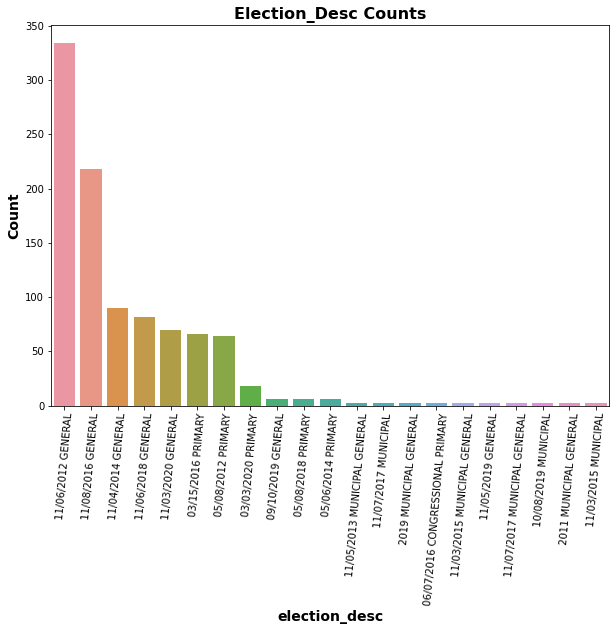

In [23]:
plot_count('election_desc', dup_ncid_elecs, rotation=85);

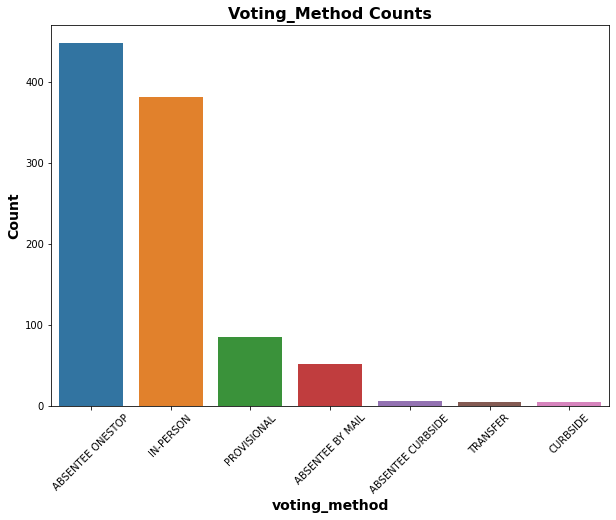

In [24]:
plot_count('voting_method', dup_ncid_elecs, rotation=45);

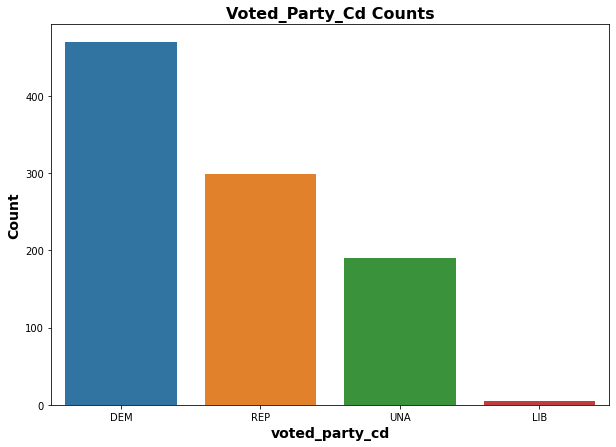

In [26]:
plot_count('voted_party_cd', dup_ncid_elecs);

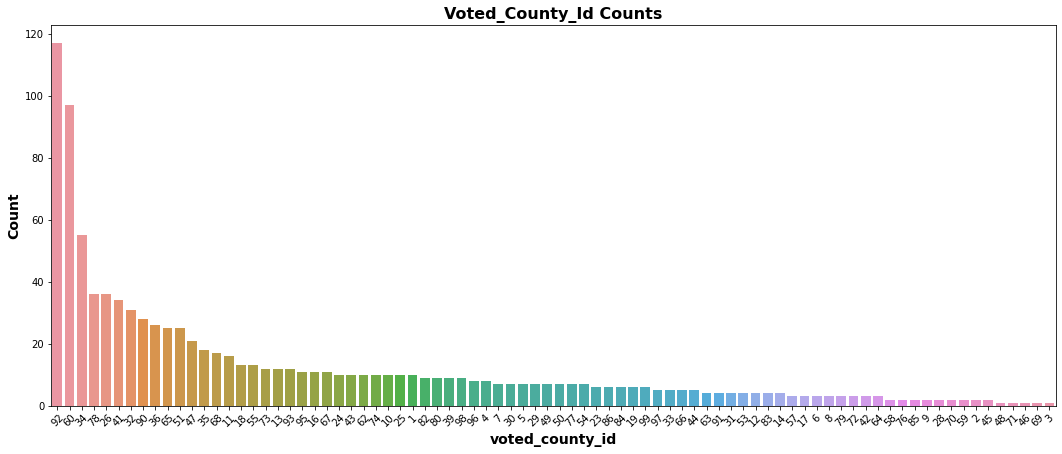

In [30]:
plot_count('voted_county_id', dup_ncid_elecs, figsize=(18,7), rotation=45);

## Explore Voter Registration Records

In [8]:
## Check number of unique individuals represented in voter reg records
nc_vreg['ncid'].nunique()

8309352

In [9]:
## Check voter status information -- Should any categories be removed??
nc_vreg['voter_status_desc'].value_counts()

ACTIVE       6667206
REMOVED       754889
INACTIVE      738674
DENIED        138925
TEMPORARY       9658
Name: voter_status_desc, dtype: int64

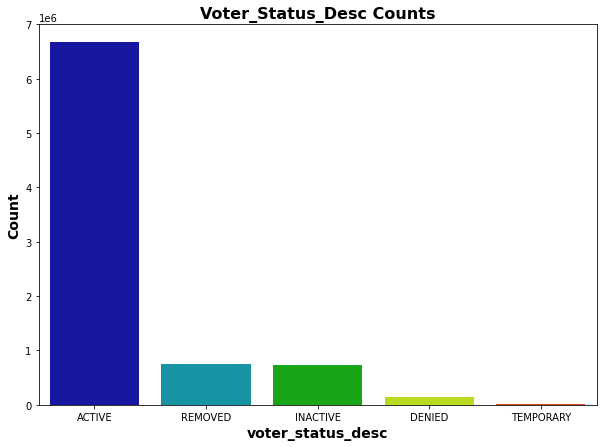

In [10]:
plot_count('voter_status_desc', nc_vreg);

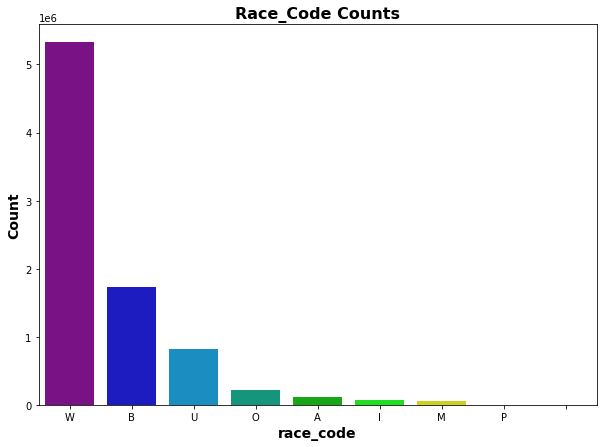

In [11]:
plot_count('race_code', nc_vreg);

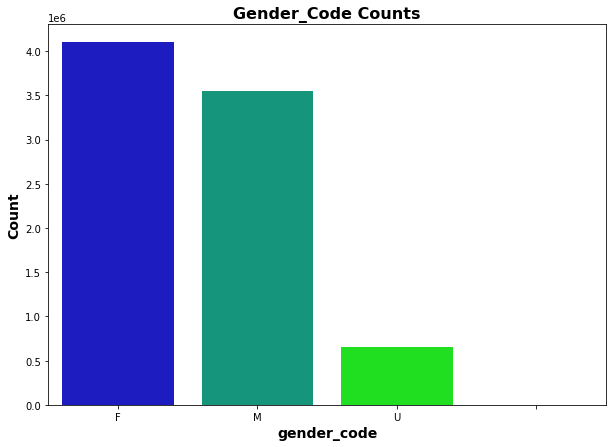

In [12]:
plot_count('gender_code', nc_vreg);

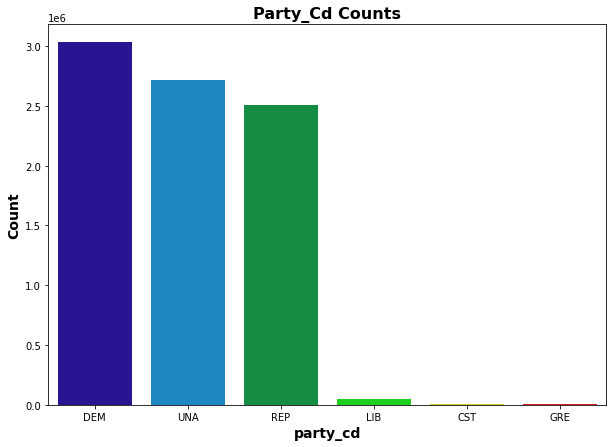

In [13]:
plot_count('party_cd', nc_vreg); # registered party

In [38]:
nc_vreg['birth_year'].min()

1753

In [45]:
nc_vreg['birth_year'].nsmallest(30)

1701638    1753
4242158    1753
6589173    1753
4900708    1765
4890112    1772
1952809    1776
4419417    1779
5674295    1796
5201124    1801
1561970    1853
5550045    1853
6449327    1868
5587351    1870
3126729    1882
5815404    1882
2293056    1884
3086414    1884
4434632    1884
6325575    1884
2868126    1885
6462127    1885
3885849    1893
328240     1897
8203917    1897
6316820    1899
6330060    1899
8055795    1899
34093      1900
84638      1900
126130     1900
Name: birth_year, dtype: int64

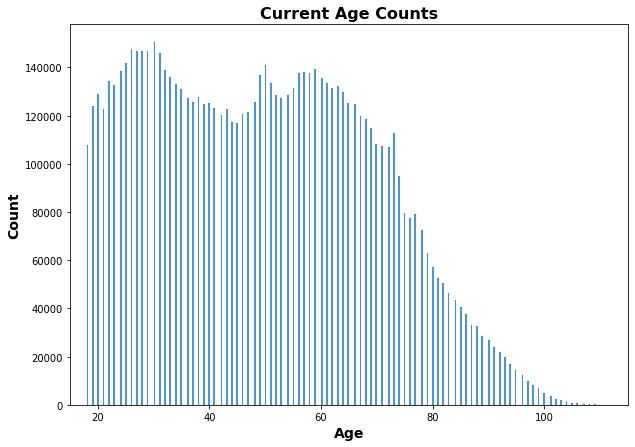

In [65]:
## Plot distribution of current age as of EOY 2020 
plt.figure(figsize=(10,7))
ax = sns.histplot(nc_vreg['birth_age'])
ax.set_title('Current Age Counts', fontsize=16, weight='bold')
ax.set_xlabel('Age', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')
# There is one voter listed as having been born in 1753 that throws off x axis
ax.set_xlim(15,115);

### Active Voters

In [9]:
active_voters = nc_vreg.groupby('voter_status_desc').get_group('ACTIVE')
print(len(active_voters))
active_voters.head()

6667206


,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,ncid,vtd_abbrv
0,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,AA56273,08N
1,ACTIVE,VERIFIED,AARDEN,JONI,AUTUMN,117 W CLAY ST,MEBANE,NC,27302.0,W,UN,UNA,F,42,DC,Y,02/23/2018,10N,13.0,15A,15A,24.0,63.0,NaN,17.0,N,1978,AA201627,10N
2,ACTIVE,VERIFICATION PENDING,AARMSTRONG,TIMOTHY,DUANE,3670 COVINGTON TRL,MEBANE,NC,27302.0,W,UN,REP,M,54,AL,N,10/31/2020,103,13.0,15A,15A,24.0,63.0,NaN,17.0,N,1966,AA216996,103
3,ACTIVE,VERIFIED,AARON,CHRISTINA,CASTAGNA,421 WHITT AVE,BURLINGTON,NC,27215.0,W,UN,UNA,F,44,NC,Y,03/26/1996,03S,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1976,AA98377,03S
4,ACTIVE,VERIFIED,AARON,CLAUDIA,HAYDEN,1013 EDITH ST,BURLINGTON,NC,27215.0,W,NL,UNA,F,75,VA,Y,08/15/1989,124,13.0,15A,15A,24.0,63.0,NaN,17.0,N,1945,AA69747,124


In [10]:
active_voters['voter_status_reason_desc'].value_counts()

VERIFIED                               6416896
VERIFICATION PENDING                    116526
LEGACY DATA                              44892
UNVERIFIED                               40825
UNVERIFIED NEW                           25253
CONFIRMATION PENDING                     19291
CONFIRMATION NOT RETURNED                 1834
CONFIRMATION RETURNED UNDELIVERABLE       1594
ARMED FORCES                                93
ADMINISTRATIVE                               1
Name: voter_status_reason_desc, dtype: int64

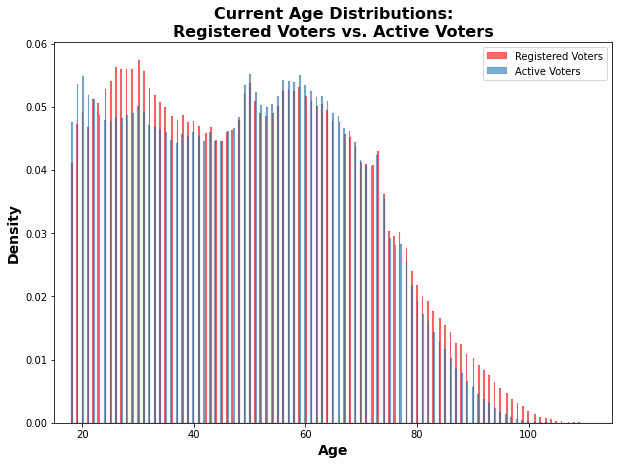

In [11]:
compare_age_distr(nc_vreg, 'Registered Voters', 
                  active_voters, 'Active Voters');

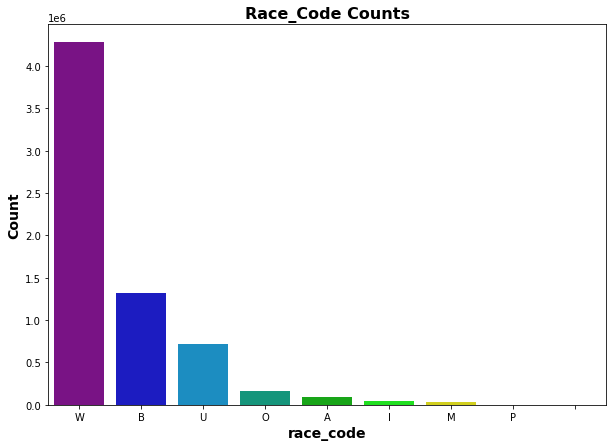

In [12]:
plot_count('race_code', active_voters);

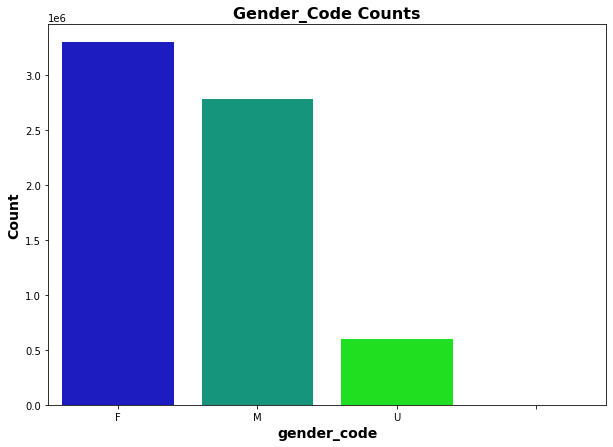

In [13]:
plot_count('gender_code', active_voters);

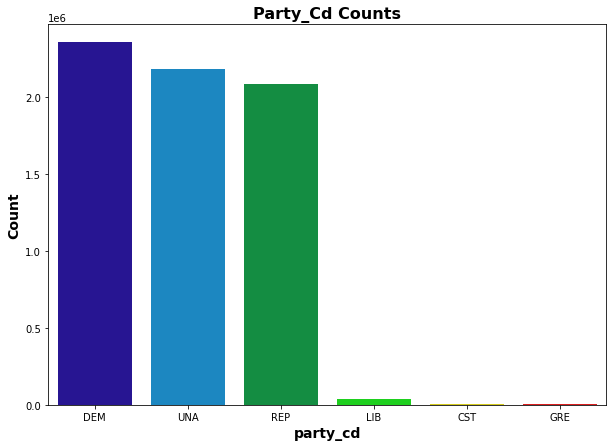

In [14]:
plot_count('party_cd', active_voters);

### Denied Voters

In [12]:
denied_voters = nc_vreg.groupby('voter_status_desc').get_group('DENIED')
print(len(denied_voters))
denied_voters.head()

138925


,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,ncid,vtd_abbrv
32,DENIED,VERIFICATION RETURNED UNDELIVERABLE,ABBOTT,ASHLEY,LAUREN,700 E HAGGARD AVE #J,ELON,NC,27244.0,W,NL,UNA,F,24,NJ,N,09/30/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1996,AA183324,NaN
55,DENIED,VERIFICATION RETURNED UNDELIVERABLE,ABBOTT,TERI,LEE,334 ROLLINGWOOD DR,BURLINGTON,NC,27217.0,U,UN,UNA,U,55,NaN,Y,10/08/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1965,AA215561,NaN
192,DENIED,VERIFICATION RETURNED UNDELIVERABLE,ACORD,REXANNA,NaN,302 GRAHAM RD,GRAHAM,NC,27253.0,W,NL,REP,F,68,WV,Y,01/18/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1952,AA148645,NaN
359,DENIED,UNAVAILABLE ESSENTIAL INFORMATION,ADAMS,PAUL,WENDELL,1426 CLOVERDALE ST,BURLINGTON,NC,27217.0,W,NL,REP,M,62,SC,N,12/13/1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1958,AA105378,NaN
443,DENIED,VERIFICATION RETURNED UNDELIVERABLE,ADEYO,ADENIKE,CELINA,1301 E DOGWOOD DR,MEBANE,NC,27302.0,B,NL,DEM,F,39,OC,Y,07/19/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1981,AA196431,NaN


In [13]:
denied_voters['voter_status_reason_desc'].value_counts()

VERIFICATION RETURNED UNDELIVERABLE    132786
UNAVAILABLE ESSENTIAL INFORMATION        6100
MOVED FROM COUNTY                          14
CONFIRMATION NOT RETURNED                  10
FELONY CONVICTION                           8
MOVED FROM STATE                            4
DUPLICATE                                   1
DECEASED                                    1
UNVERIFIED                                  1
Name: voter_status_reason_desc, dtype: int64

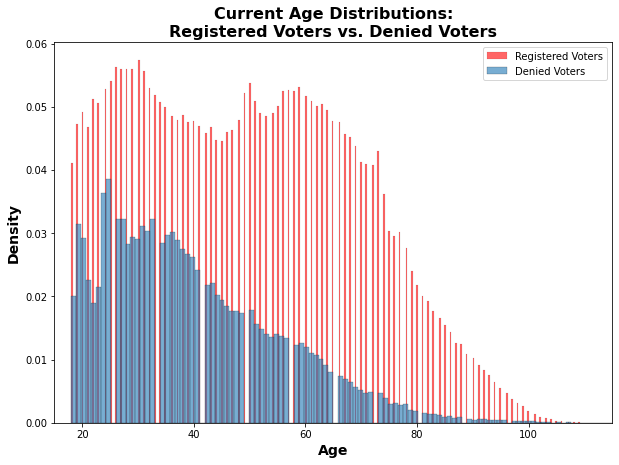

In [14]:
compare_age_distr(nc_vreg, 'Registered Voters', 
                  denied_voters, 'Denied Voters');

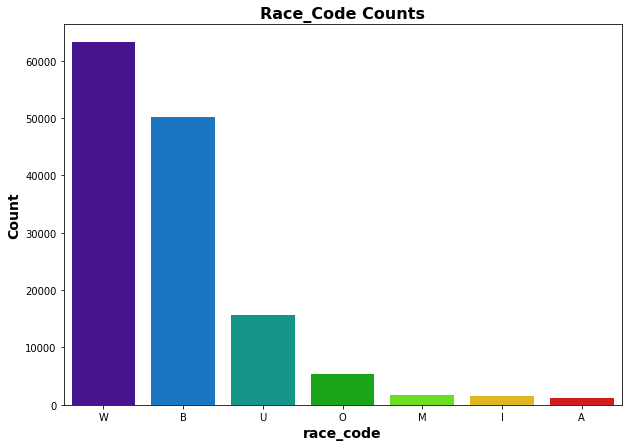

In [18]:
plot_count('race_code', denied_voters);

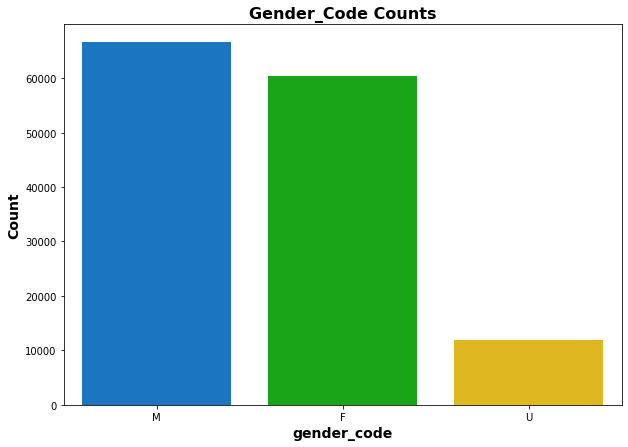

In [19]:
plot_count('gender_code', denied_voters);

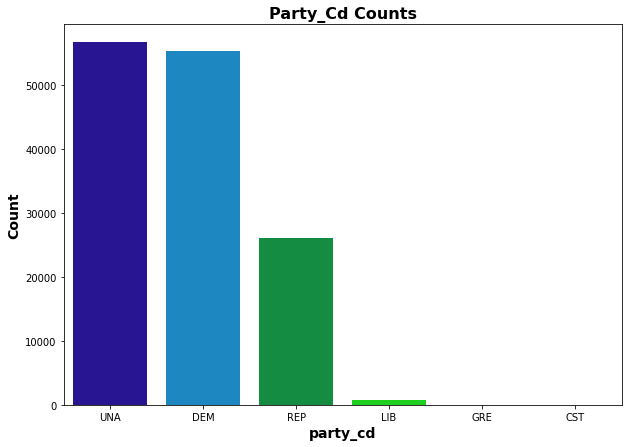

In [20]:
plot_count('party_cd', denied_voters);

### Inactive Voters

In [15]:
inactive_voters = nc_vreg.groupby('voter_status_desc').get_group('INACTIVE')
print(len(inactive_voters))
inactive_voters.head()

738674


,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,ncid,vtd_abbrv
18,INACTIVE,CONFIRMATION NOT RETURNED,ABADILLA,STEVE,ARCEO,105 N SIXTH ST,MEBANE,NC,27302.0,O,NL,UNA,M,31,OC,Y,07/03/2014,10N,13.0,15A,15A,24.0,63.0,NaN,17.0,N,1989,DE236758,10N
47,INACTIVE,CONFIRMATION NOT RETURNED,ABBOTT,MARIA,LYNETTE,614 TUCKER ST,BURLINGTON,NC,27215.0,B,NL,DEM,F,35,NC,Y,05/02/2008,128,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1985,BY382231,128
61,INACTIVE,CONFIRMATION NOT RETURNED,ABDEL-MAGID,LISA,ANN,1841 DUNBAR PL,BURLINGTON,NC,27215.0,W,NL,UNA,F,60,DC,Y,11/10/2011,03S,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1960,AA169698,03S
79,INACTIVE,CONFIRMATION NOT RETURNED,ABELE,KYLIE,JO,336 SLATE DR,GIBSONVILLE,NC,27249.0,W,NL,REP,F,33,WV,N,03/22/2012,03W,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1987,AA171060,03W
101,INACTIVE,CONFIRMATION NOT RETURNED,ABERNATHY,JEFFERSON,REID,27 HOLMESWAY,ELON,NC,27244.0,W,UN,REP,M,101,WV,Y,04/06/1969,035,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1919,AA2056,035


In [16]:
inactive_voters['voter_status_reason_desc'].value_counts()

CONFIRMATION NOT RETURNED              430273
CONFIRMATION RETURNED UNDELIVERABLE    308250
ADMINISTRATIVE                            150
UNVERIFIED                                  1
Name: voter_status_reason_desc, dtype: int64

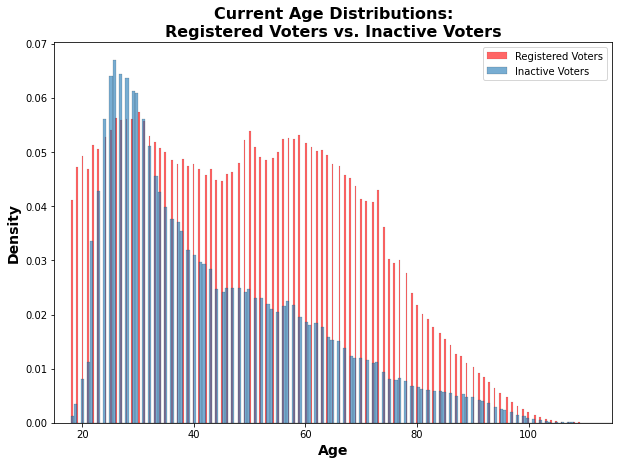

In [17]:
compare_age_distr(nc_vreg, 'Registered Voters', 
                  inactive_voters, 'Inactive Voters');

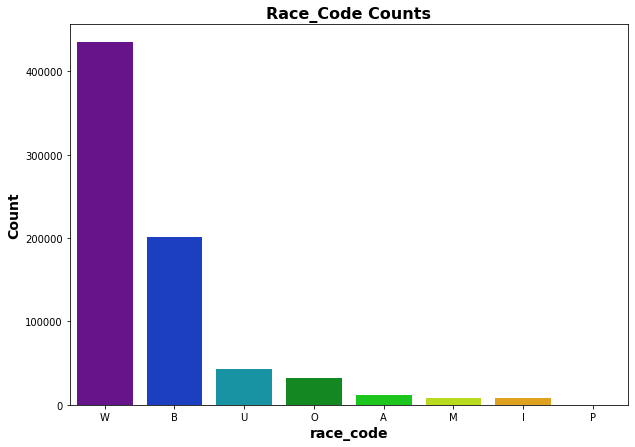

In [24]:
plot_count('race_code', inactive_voters);

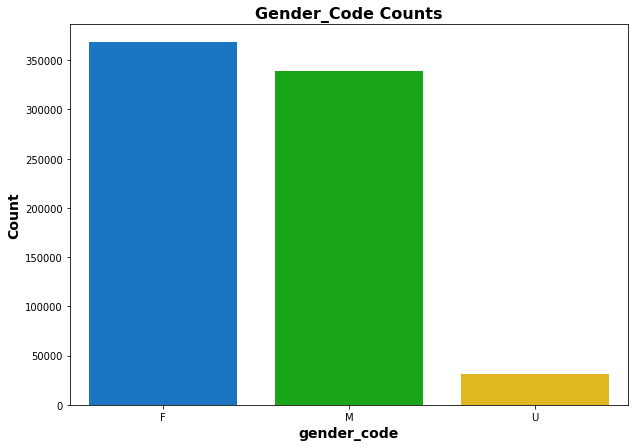

In [25]:
plot_count('gender_code', inactive_voters);

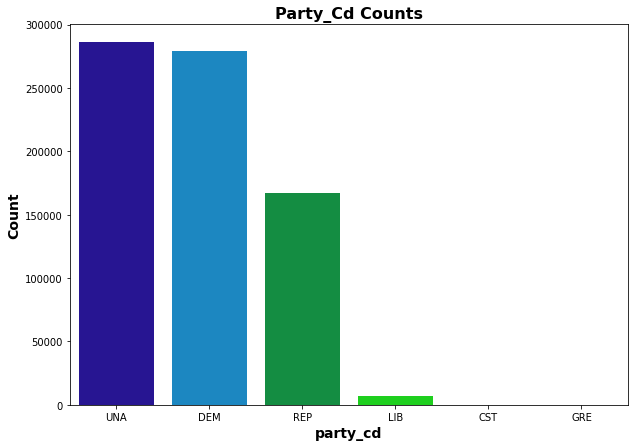

In [26]:
plot_count('party_cd', inactive_voters);

### Removed Voters

In [18]:
removed_voters = nc_vreg.groupby('voter_status_desc').get_group('REMOVED')
print(len(removed_voters))
removed_voters.head()

754889


,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,ncid,vtd_abbrv
36,REMOVED,MOVED FROM COUNTY,ABBOTT,DEREK,ANDREW,REMOVED,NaN,NaN,NaN,W,NL,UNA,M,52,OH,Y,02/20/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1968,BY552572,NaN
40,REMOVED,DECEASED,ABBOTT,GLADYS,MARIE MILES,REMOVED,NaN,NaN,NaN,B,NL,DEM,F,68,NC,Y,11/05/2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1952,AA128440,NaN
44,REMOVED,MOVED FROM STATE,ABBOTT,JOYCE,HODGES,REMOVED,NaN,NaN,NaN,W,NL,DEM,F,73,VA,Y,09/24/1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1947,AA73791,NaN
78,REMOVED,REMOVED AFTER 2 FED GENERAL ELECTIONS IN INACT...,ABELE,KLAY,MATTHEW,REMOVED,NaN,NaN,NaN,W,NL,UNA,M,33,OH,Y,03/26/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1986,AA171094,NaN
89,REMOVED,DECEASED,ABERCROMBIE,JACQUELINE,LINVILLE,REMOVED,NaN,NaN,NaN,W,NL,DEM,F,80,NC,Y,05/02/1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1939,AA2049,NaN


In [19]:
removed_voters['voter_status_reason_desc'].value_counts()

DECEASED                                                    389685
MOVED FROM STATE                                            133502
REMOVED AFTER 2 FED GENERAL ELECTIONS IN INACTIVE STATUS     98576
MOVED FROM COUNTY                                            85768
FELONY CONVICTION                                            13621
MOVED WITHIN STATE                                           10530
REQUEST FROM VOTER                                            6813
FELONY SENTENCE COMPLETED                                     5523
TEMPORARY REGISTRANT                                          5260
DUPLICATE                                                     3741
ADMINISTRATIVE                                                1165
REMOVED DUE TO SUSTAINED CHALLENGE                             700
REMOVED UNDER OLD PURGE LAW                                      3
UNVERIFIED                                                       2
Name: voter_status_reason_desc, dtype: int64

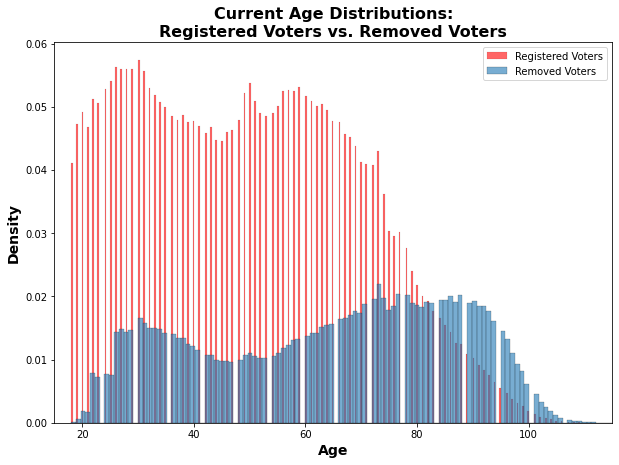

In [20]:
compare_age_distr(nc_vreg, 'Registered Voters', 
                  removed_voters, 'Removed Voters');

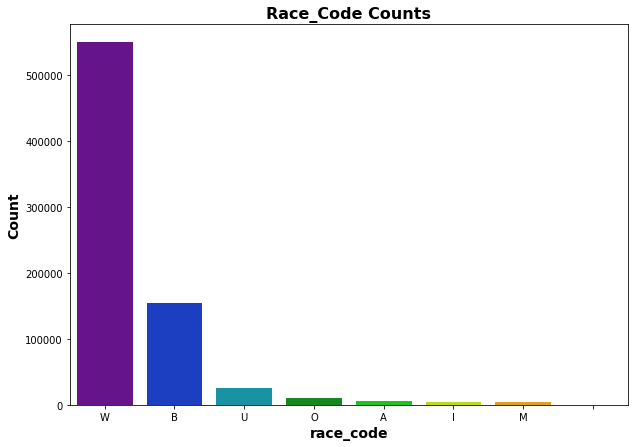

In [30]:
plot_count('race_code', removed_voters);

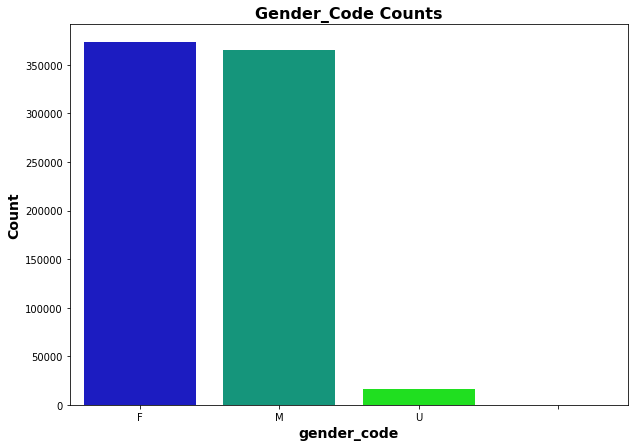

In [31]:
plot_count('gender_code', removed_voters);

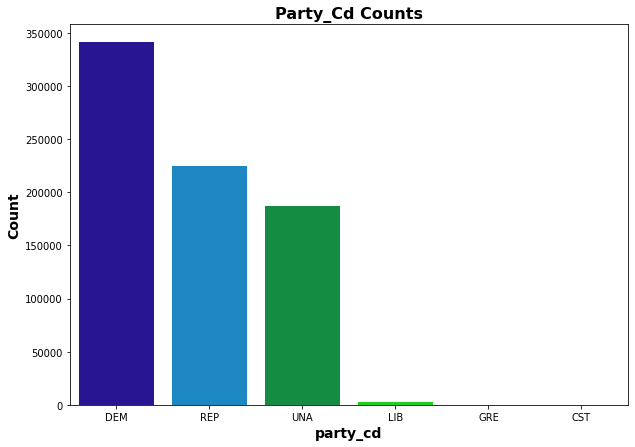

In [32]:
plot_count('party_cd', removed_voters);

## Merge Voter Registration Data with Voter History Data

In [72]:
## Merge voter registration information onto records of voter history based 
  ## on unique ncid
    
## Use right join so we're only including ncid's for which their is
  ## registration and demographic information, including for those 
    ## people who are registered, but have never voted
all_nc_voters = nc_vhis.merge(nc_vreg, how='right', on='ncid')
# inspect new dataframe
display(all_nc_voters.head())
all_nc_voters.tail()

,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,vtd_abbrv
0,1.0,9005990.0,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
1,1.0,9005990.0,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
2,1.0,9005990.0,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
3,1.0,9005990.0,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
4,1.0,9005990.0,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,vtd_abbrv
35870783,100.0,26014.0,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,08 CRA,ES26341,100.0,08-CRA,ACTIVE,VERIFIED,ZULICK,DAWN,ELISABETH,250 LAUREL ACRES RD,BURNSVILLE,NC,28714.0,W,NL,REP,F,57,CO,Y,11/30/2015,08 CRA,11.0,24,24,47.0,118.0,NaN,35.0,N,1963,08-CRA
35870784,100.0,26014.0,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,08 CRA,ES26341,100.0,08-CRA,ACTIVE,VERIFIED,ZULICK,DAWN,ELISABETH,250 LAUREL ACRES RD,BURNSVILLE,NC,28714.0,W,NL,REP,F,57,CO,Y,11/30/2015,08 CRA,11.0,24,24,47.0,118.0,NaN,35.0,N,1963,08-CRA
35870785,100.0,26085.0,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,01 BUR,ES26380,100.0,01-BUR,ACTIVE,VERIFIED,ZULLINGER,PAMELA,YOUNG,91 W BURNSVILLE CHURCH RD,BURNSVILLE,NC,28714.0,W,NL,UNA,F,65,NC,Y,12/18/2015,01 BUR,11.0,24,24,47.0,118.0,NaN,35.0,N,1955,01-BUR
35870786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ES28936,NaN,NaN,ACTIVE,VERIFIED,ZURAWSKI,ELAINE,MICHELLE,225 GARLAND LN,GREEN MOUNTAIN,NC,28740.0,U,UN,UNA,U,35,NaN,Y,06/09/2020,05 GRE,11.0,24,24,47.0,118.0,NaN,35.0,N,1984,05-GRE
35870787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ES27200,NaN,NaN,INACTIVE,CONFIRMATION NOT RETURNED,ZYNDA,PAULA,MARGARET,115 STONEY FALLS LOOP #D3,BURNSVILLE,NC,28714.0,W,NL,REP,F,56,IN,Y,12/29/2016,11 PRI,11.0,24,24,47.0,118.0,NaN,35.0,N,1964,11-PRI


In [73]:
## Check number of unique individuals represented in all records
print(all_nc_voters['ncid'].nunique())
len(all_nc_voters)

8309352


35870788

## Drop 'Removed' and 'Denied' Voters - Further Exploration

In [74]:
## Drop voters who have been removed or had their registration denied
nc_voters = all_nc_voters.loc[all_nc_voters['voter_status_desc'] != 'REMOVED']
nc_voters = nc_voters.loc[nc_voters['voter_status_desc'] != 'DENIED']
nc_voters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33538405 entries, 0 to 35870787
Data columns (total 38 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   county_id                 float64
 1   voter_reg_num             float64
 2   election_lbl              object 
 3   election_desc             object 
 4   voting_method             object 
 5   voted_party_cd            object 
 6   pct_label                 object 
 7   ncid                      object 
 8   voted_county_id           float64
 9   vtd_label                 object 
 10  voter_status_desc         object 
 11  voter_status_reason_desc  object 
 12  last_name                 object 
 13  first_name                object 
 14  middle_name               object 
 15  res_street_address        object 
 16  res_city_desc             object 
 17  state_cd                  object 
 18  zip_code                  float64
 19  race_code                 object 
 20  ethnic_code           

In [75]:
## Check remaining number of unique individuals represented in the data
nc_voters['ncid'].nunique()

7415538

In [76]:
## Check the number of records corresponding to the top 15 elections
elec_counts_df = nc_voters['election_desc'].value_counts().to_frame()
elec_counts_df.iloc[:15]

,election_desc
11/03/2020 GENERAL,5353370
11/08/2016 GENERAL,4488337
11/06/2012 GENERAL,3927827
11/06/2018 GENERAL,3655825
11/04/2014 GENERAL,2668840
03/15/2016 PRIMARY,2179956
03/03/2020 PRIMARY,2150401
05/08/2012 PRIMARY,1877251
05/08/2018 PRIMARY,928285
05/06/2014 PRIMARY,919808


In [ ]:
# nc_voters.to_csv('Data/NC_voters.zip', index=False)

## Engineer Features for Grouping/ Database Manipulation

In [4]:
# nc_voters = pd.read_csv('Data/NC_voters.zip',
#                         dtype={'precinct_abbrv': str, 
#                               'super_court_abbrv': str, 
#                               'judic_dist_abbrv': str,
#                               'school_dist_abbrv': str,
#                               'vtd_abbrv': str
#                              })

In [5]:
nc_voters.head()

,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,vtd_abbrv
0,1.0,9005990.0,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
1,1.0,9005990.0,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
2,1.0,9005990.0,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
3,1.0,9005990.0,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
4,1.0,9005990.0,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N


In [ ]:
## Create a new column specifying the election category based on the
  ## election description col
nc_voters.insert(loc=4, column='election_cat', 
                 value=nc_voters['election_desc'].str.split(n=1,
                                                            expand=True)[1])
# If the category was general or primary, leave as is, otherwise 'other'
nc_voters['election_cat'] = np.where(nc_voters['election_cat'].isin(
                                                    ['GENERAL', 'PRIMARY']),
                                     nc_voters['election_cat'], 'other')

In [ ]:
## Recast election_lbl as datetime and create a new col for just the year
nc_voters['election_lbl'] = pd.to_datetime(nc_voters['election_lbl'])
nc_voters.insert(loc=4, column='election_yr',
                 value=nc_voters['election_lbl'].dt.year)

In [ ]:
## Create a new binary variable indicating if it was a major election
nc_voters.insert(loc=6, column='major_elec',
                 value=np.where(((nc_voters['election_yr']%2 == 0) & 
                                 (nc_voters['election_cat'].isin(
                                     ['GENERAL', 'PRIMARY']))),
                                1,0))

# Exclude 2020 primary runoff from major elections
nc_voters.loc[nc_voters['election_desc']=='06/23/2020 PRIMARY',
              ['major_elec']]=0

In [ ]:
## Group original vote methods into more general categories in a new variable
# Map the original categoriess to new ones
vote_method_map = {'ABSENTEE ONESTOP': 'Early',
                   'IN-PERSON': 'Election Day',
                   'ABSENTEE BY MAIL': 'Early',
                   'ABSENTEE CURBSIDE': 'Early',
                   'TRANSFER': 'Other',
                   'PROVISIONAL': 'Other',
                   'CURBSIDE': 'Election Day'}

# Apply the map to create new vote_method_cat column
nc_voters.insert(loc=8, column='vote_method_cat',
                 value=nc_voters['voting_method'].map(vote_method_map))

In [ ]:
## Null values in the election_desc col indicate individuals that are 
  ## registered to vote, but have not voted in a recent major election.
    ## Thus, election_cat, major_elec, and presid_elec 
    ## are irrelevant for these records
# Fill irrelevant fields with null values
nc_voters.loc[nc_voters['election_desc'].isna(),
              ['election_cat', 'major_elec']] = np.nan

# Fill with NaN with 'None' in election_desc col to preserve info for
  # registered voters without a voting history when merging df's based on 
    # ncid and election_desc below
nc_voters['election_desc'].fillna('None', inplace=True)

# Inspect updated dataframe
nc_voters.head()

In [11]:
nc_voters.to_csv('Data/NC_voters.zip', index=False)

In [43]:
## Check number of unique individuals represented by the data
nc_voters['ncid'].nunique()

7415538

In [44]:
## Store index of non-major and non-null election types
other_elec_idx = nc_voters.loc[nc_voters['election_cat']=='other'].index

## Create a df containing only major and null elections
major_elec_df = nc_voters.drop(index=other_elec_idx)

# Check number of unique individuals that voted in a recent major election, 
  # plus those with no voting history
print(major_elec_df['ncid'].nunique())

# 7588 registered voters voted in a non-major election,
  # but no major elections
nc_voters['ncid'].nunique() - major_elec_df['ncid'].nunique()

7407950


7588

## Merge DataFrames - Focus on Recent Major Elections

In [9]:
# nc_voters = pd.read_csv('Data/NC_voters.zip',
#                         dtype={'precinct_abbrv': str, 
#                               'super_court_abbrv': str, 
#                               'judic_dist_abbrv': str,
#                               'school_dist_abbrv': str,
#                               'vtd_abbrv': str
#                              })

In [ ]:
## Get list of unique ncids
nc_ncid_list = list(nc_voters['ncid'].unique())

## Add 'None' to the list to capture individuals that have not voted in any 
  ## recent major election when merging dataframes on ncid and election_desc
elec_desc_list = ['11/03/2020 GENERAL',
                  '11/06/2018 GENERAL',
                  '11/08/2016 GENERAL',
                  '11/04/2014 GENERAL',
                  '11/06/2012 GENERAL',
                  'None']

In [15]:
## Create multiindex that lists every election for every registered voter
mltidx = pd.MultiIndex.from_tuples(
    [(ncid, elec) for ncid in nc_ncid_list for elec in elec_desc_list],
    names=['ncid', 'election_desc'])

## Use multiindex to create new dataframe
elecs_by_voter = pd.DataFrame(index=mltidx)

In [16]:
## Check length and inspect structure of new dataframe
print(len(elecs_by_voter))
elecs_by_voter.head(15)

44493228


Empty DataFrame
Columns: []
Index: [(AA56273, 11/03/2020 GENERAL), (AA56273, 11/06/2018 GENERAL), (AA56273, 11/08/2016 GENERAL), (AA56273, 11/04/2014 GENERAL), (AA56273, 11/06/2012 GENERAL), (AA56273, None), (AA201627, 11/03/2020 GENERAL), (AA201627, 11/06/2018 GENERAL), (AA201627, 11/08/2016 GENERAL), (AA201627, 11/04/2014 GENERAL), (AA201627, 11/06/2012 GENERAL), (AA201627, None), (AA216996, 11/03/2020 GENERAL), (AA216996, 11/06/2018 GENERAL), (AA216996, 11/08/2016 GENERAL)]

In [17]:
## Merge voter histories using the created multiindex as the keys to join
  ## each ncid onto every election and 'None'
voter_elecs = elecs_by_voter.merge(nc_vhis, how='left',
                                   on=['ncid', 'election_desc'])
# Inspect new df
print(len(voter_elecs))
display(voter_elecs.head())
voter_elecs.tail()

44493612


,ncid,election_desc,county_id,voter_reg_num,election_lbl,voting_method,voted_party_cd,pct_label,voted_county_id,vtd_label
0,AA56273,11/03/2020 GENERAL,1.0,9005990.0,11/03/2020,ABSENTEE BY MAIL,UNA,08N,1.0,08N
1,AA56273,11/06/2018 GENERAL,1.0,9005990.0,11/06/2018,IN-PERSON,UNA,08N,1.0,08N
2,AA56273,11/08/2016 GENERAL,1.0,9005990.0,11/08/2016,IN-PERSON,UNA,08N,1.0,08N
3,AA56273,11/04/2014 GENERAL,1.0,9005990.0,11/04/2014,IN-PERSON,UNA,08N,1.0,08N
4,AA56273,11/06/2012 GENERAL,1.0,9005990.0,11/06/2012,IN-PERSON,UNA,08N,1.0,08N


,ncid,election_desc,county_id,voter_reg_num,election_lbl,voting_method,voted_party_cd,pct_label,voted_county_id,vtd_label
44493607,ES27200,11/06/2018 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44493608,ES27200,11/08/2016 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44493609,ES27200,11/04/2014 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44493610,ES27200,11/06/2012 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44493611,ES27200,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
## Check for duplicate rows
# voter_elecs.duplicated().sum()

0

In [18]:
# voter_elecs.to_csv('Data/NC_full_voter_elecs.zip', index=False)

In [31]:
nc_vreg.head()

,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,school_dist_desc,dist_1_abbrv,dist_1_desc,confidential_ind,birth_year,ncid,vtd_abbrv,vtd_desc
0,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,NORTH NEWLIN,13.0,15A,15A,24.0,64.0,NaN,NaN,17.0,17TH PROSECUTORIAL,N,1935,AA56273,08N,08N
1,ACTIVE,VERIFIED,AARDEN,JONI,AUTUMN,117 W CLAY ST,MEBANE,NC,27302.0,W,UN,UNA,F,42,DC,Y,02/23/2018,10N,NORTH MELVILLE,13.0,15A,15A,24.0,63.0,NaN,NaN,17.0,17TH PROSECUTORIAL,N,1978,AA201627,10N,10N
2,ACTIVE,VERIFICATION PENDING,AARMSTRONG,TIMOTHY,DUANE,3670 COVINGTON TRL,MEBANE,NC,27302.0,W,UN,REP,M,54,AL,N,10/31/2020,103,MELVILLE 3,13.0,15A,15A,24.0,63.0,NaN,NaN,17.0,17TH PROSECUTORIAL,N,1966,AA216996,103,103
3,ACTIVE,VERIFIED,AARON,CHRISTINA,CASTAGNA,421 WHITT AVE,BURLINGTON,NC,27215.0,W,UN,UNA,F,44,NC,Y,03/26/1996,03S,SOUTH BOONE,13.0,15A,15A,24.0,64.0,NaN,NaN,17.0,17TH PROSECUTORIAL,N,1976,AA98377,03S,03S
4,ACTIVE,VERIFIED,AARON,CLAUDIA,HAYDEN,1013 EDITH ST,BURLINGTON,NC,27215.0,W,NL,UNA,F,75,VA,Y,08/15/1989,124,BURLINGTON 4,13.0,15A,15A,24.0,63.0,NaN,NaN,17.0,17TH PROSECUTORIAL,N,1945,AA69747,124,124


In [33]:
nc_vreg.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8309352 entries, 0 to 8309351
Data columns (total 33 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   voter_status_desc         8309352 non-null  object 
 1   voter_status_reason_desc  8309351 non-null  object 
 2   last_name                 8309163 non-null  object 
 3   first_name                8309199 non-null  object 
 4   middle_name               7712276 non-null  object 
 5   res_street_address        8309352 non-null  object 
 6   res_city_desc             7553949 non-null  object 
 7   state_cd                  7554189 non-null  object 
 8   zip_code                  7553848 non-null  float64
 9   race_code                 8309352 non-null  object 
 10  ethnic_code               8309352 non-null  object 
 11  party_cd                  8309352 non-null  object 
 12  gender_code               8309352 non-null  object 
 13  birth_age                 8

In [8]:
# voter_elecs = pd.read_csv('Data/NC_full_voter_elecs.zip')
# voter_elecs.head()

,ncid,election_desc,county_id,voter_reg_num,election_lbl,voting_method,voted_party_cd,pct_label,voted_county_id,vtd_label
0,AA56273,11/03/2020 GENERAL,1.0,9005990.0,11/03/2020,ABSENTEE BY MAIL,UNA,08N,1.0,08N
1,AA56273,11/04/2014 GENERAL,1.0,9005990.0,11/04/2014,IN-PERSON,UNA,08N,1.0,08N
2,AA56273,11/06/2012 GENERAL,1.0,9005990.0,11/06/2012,IN-PERSON,UNA,08N,1.0,08N
3,AA56273,11/08/2016 GENERAL,1.0,9005990.0,11/08/2016,IN-PERSON,UNA,08N,1.0,08N
4,AA56273,03/15/2016 PRIMARY,1.0,9005990.0,03/15/2016,IN-PERSON,DEM,08N,1.0,08N


In [19]:
## Merge voter registration information onto the new df based on ncid
voter_elecs = voter_elecs.merge(nc_vreg, how='left', on='ncid')
# Inspect resulting df
voter_elecs.head()

,ncid,election_desc,county_id,voter_reg_num,election_lbl,voting_method,voted_party_cd,pct_label,voted_county_id,vtd_label,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,vtd_abbrv
0,AA56273,11/03/2020 GENERAL,1.0,9005990.0,11/03/2020,ABSENTEE BY MAIL,UNA,08N,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
1,AA56273,11/06/2018 GENERAL,1.0,9005990.0,11/06/2018,IN-PERSON,UNA,08N,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
2,AA56273,11/08/2016 GENERAL,1.0,9005990.0,11/08/2016,IN-PERSON,UNA,08N,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
3,AA56273,11/04/2014 GENERAL,1.0,9005990.0,11/04/2014,IN-PERSON,UNA,08N,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
4,AA56273,11/06/2012 GENERAL,1.0,9005990.0,11/06/2012,IN-PERSON,UNA,08N,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N


In [20]:
voter_elecs.to_csv('Data/NC_full_voter_elecs.zip', index=False)

In [21]:
voter_elecs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44493612 entries, 0 to 44493611
Data columns (total 38 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ncid                      object 
 1   election_desc             object 
 2   county_id                 float64
 3   voter_reg_num             float64
 4   election_lbl              object 
 5   voting_method             object 
 6   voted_party_cd            object 
 7   pct_label                 object 
 8   voted_county_id           float64
 9   vtd_label                 object 
 10  voter_status_desc         object 
 11  voter_status_reason_desc  object 
 12  last_name                 object 
 13  first_name                object 
 14  middle_name               object 
 15  res_street_address        object 
 16  res_city_desc             object 
 17  state_cd                  object 
 18  zip_code                  float64
 19  race_code                 object 
 20  ethnic_code           